<a href="https://colab.research.google.com/github/ella00100/Kaggle_competition/blob/main/Costa_Rican_Household_Poverty_Level_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#A Complete Introduction and Walkthrough

#Costa Rican Household Poverty Level Prediction
- 코스타리카 가구 빈곤 수준 예측 대회의 목적은 개인과 가구 특성을 모두 사용하여 가구의 빈곤 수준을 예측할 수 있는 기계 학습 모델을 개발하는 것입니다.

- 이 노트북에서 우리는 완벽한 기계 학습 솔루션을 살펴볼 것입니다. 
  - 먼저, 문제를 소개한 다음, 데이터 세트에 대한 철저한 탐색적 데이터 분석을 수행하고, 기능 엔지니어링 작업을 수행하고, 여러 기계 학습 모델을 테스트하고, 모델을 선택하고, 모델을 최적화하는 작업을 수행한 다음, 마지막으로, 모델의 출력을 검사하고 결론을 도출합니다. 

- 이 작업에 대한 후속 작업을 원한다면 이 문제에 대한 자동 기능 엔지니어링과 피처 도구 사용에 대한 커널을 포함한 추가 작업이 있습니다.

## Problem and Data Explanation

- 이 대회의 데이터는 train.csv와 test.csv라는 두 개의 파일로 제공됩니다. 교육 세트에는 9557개의 행과 143개의 열이 있고 테스트 세트에는 23856개의 행과 142개의 열이 있습니다. 각 행은 한 명의 개인을 나타내며 각 열은 개인 또는 개인의 가구에 고유한 형상입니다. 교육 세트에는 1-4 척도의 빈곤 수준을 나타내는 목표 열이 하나 더 있습니다. 이 열은 대회의 레이블입니다. 값이 1이면 가장 극심한 빈곤입니다.

- 이것은 감독된 다중 클래스 분류 기계 학습 문제입니다:
  - Supervised: 교육 데이터의 레이블과 함께 제공됩니다
  - Multi-class Classification: 레이블은 클래스가 4개인 이산 값입니다

###Objective
- 목표는 가구 수준에서 빈곤을 예측하는 것입니다. 우리는 개인 수준에 대한 데이터를 제공하며, 각 개인은 고유한 특징을 가지고 있을 뿐만 아니라 가구에 대한 정보도 가지고 있습니다. 

- 작업을 위한 데이터 세트를 생성하려면 각 가정의 개별 데이터를 몇 가지 집계해야 합니다. 게다가, 우리는 시험 세트의 모든 개인에 대해 예측을 해야 하지만, "가장만 점수를 매기는 데 사용된다"는 것은 우리가 가구 단위로 빈곤을 예측하기를 원한다는 것을 의미합니다.

- Important note: 교육 데이터에는 한 가구의 모든 구성원이 동일한 레이블을 가져야 하지만 동일한 가구의 개인이 서로 다른 레이블을 갖는 오류가 있습니다. 이러한 경우 각 가구의 가장에 대한 레이블을 사용하라는 지시를 받는데, 이 레이블은 parentesco1 == 1.0 행으로 식별할 수 있습니다. 이 문제를 해결하는 방법에 대해서는 노트북에서 설명합니다(자세한 내용은 경기의 주요 토론 내용을 참조하십시오).

- 목표 값은 다음과 같이 빈곤 수준을 나타냅니다:
  - 1 = 극심한 빈곤
  - 2 = 적당한 빈곤
  - 3 = 취약 가구
  - 4 = 비취약가구

- 모든 143개 열에 대한 설명은 경기 문서에서 찾을 수 있지만, 몇 가지 주의해야 할 사항은 아래와 같습니다.
  - ID: 각 개인의 고유 식별자로, 사용하는 기능이 아니어야 합니다!
  - idhogar: 각 가구의 고유 식별자. 이 변수는 피쳐가 아니지만 가구의 모든 개인이 동일한 식별자를 가지기 때문에 가구별로 개인을 그룹화하는 데 사용됩니다.
  - parentesco1: 이 사람이 가장인지 여부를 나타냅니다.
  - Target: 라벨. 한 가구의 모든 구성원이 같아야 합니다

- 우리가 모델을 만들 때, 우리는 각 가구의 라벨로 가장의 빈곤 수준을 가정 단위로 훈련시킬 것입니다. 원시 데이터에는 가구 및 개별 특성이 혼합되어 있으며 개별 데이터의 경우 각 가구에 대해 이를 집계하는 방법을 찾아야 합니다. 개인 중 일부는 가장이 없는 가구에 속합니다. 이것은 불행하게도 우리가 이 데이터를 훈련에 사용할 수 없다는 것을 의미합니다. 데이터와 관련된 이러한 문제는 실제 데이터의 일반적인 문제이므로 데이터 과학 작업에서 발생할 데이터 세트에 대한 훌륭한 준비가 됩니다!

### Metric

- 궁극적으로 우리는 가구의 정수 빈곤 수준을 예측할 수 있는 기계 학습 모델을 구축하고자 합니다. 우리의 예측은 매크로 F1 점수에 의해 평가될 것입니다. 정밀도와 호출의 조화 평균인 이항 분류 문제에 대한 표준 F1 점수에 익숙할 수 있습니다:

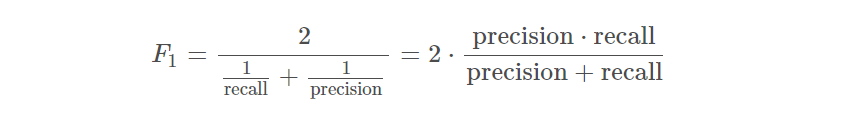

- 멀티 클래스 문제의 경우, 우리는 각 클래스의 F1 점수를 평균해야 합니다. 매크로 F1 점수는 레이블 불균형을 고려하지 않고 각 클래스의 F1 점수를 평균합니다.

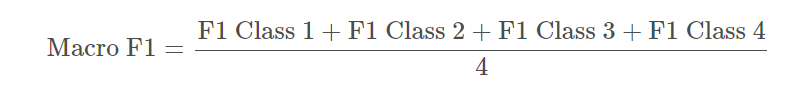

- 즉, 각 레이블의 발생 횟수는 매크로를 사용할 때 계산에 반영되지 않습니다("가중치" 점수를 사용할 때 계산). 차이점에 대한 자세한 내용은 Scikit-Learn Documentation for F1 Score 또는 이 Stack Exchange 질문과 답변을 참조하십시오. 성능을 평가하려면 다음 코드를 사용할 수 있습니다:
  - from sklearn.metrics import f1_score
  - f1_score(y_true, y_predicted, average= 'macro')

- 이 문제의 경우 레이블이 불균형적이므로 평가 메트릭에 매크로 평균을 사용하는 것이 약간 이상하지만, 이는 주최자의 결정이지 변경할 수 없습니다! 자신의 작업에서 레이블 불균형을 인지하고 그에 따라 메트릭을 선택하려고 합니다.

##Roadmap
- 최종 목표는 가구의 빈곤 수준을 예측할 수 있는 기계 학습 모델입니다. 하지만 모델링에 열중하기 전에 문제와 데이터를 이해하는 것이 중요합니다. 또한 "최고" 모델을 선택하기 전에 여러 모델을 평가하고 모델을 구축한 후 예측을 조사하려고 합니다. 따라서 우리의 로드맵은 다음과 같습니다:

  1. 문제를 이해합니다(이미 거의 도착했습니다)
  2. 탐색적 데이터 분석
  3. 기계 학습을 위한 데이터 세트를 만드는 기능 엔지니어링
  4. 여러 기본 기계 학습 모델 비교
  5. 더 복잡한 기계 학습 모델 시도
  6. 선택한 모델 최적화
  7. 문제의 맥락에서 모형 예측 조사
  8. 결론을 도출하고 다음 단계를 제시합니다

- 위에 제시된 단계는 반복적인 의미로, 한 번에 하나씩 검토하겠지만 이전 단계로 돌아가서 결정 사항 중 일부를 다시 검토할 수도 있습니다. 일반적으로, 데이터 과학은 우리가 과거의 결정을 지속적으로 평가하고 개선하는 비선형적 관행입니다. 특히, 기능 엔지니어링, 모델링 및 최적화는 처음에 제대로 맞추었는지 알 수 없기 때문에 종종 반복되는 단계입니다!


#Getting Started

- 우리는 문제를 꽤 잘 파악하고 있기 때문에 탐색적 데이터 분석(EDA)과 기능 엔지니어링으로 이동할 것입니다. EDA의 경우 피쳐 엔지니어링 및 모델링에 사용할 수 있는 흥미로운 이상 징후, 추세, 상관 관계 또는 패턴을 조사합니다. 데이터를 양적으로(통계를 통해) 시각적으로(그림을 통해) 조사할 것입니다.

- 데이터와 잠재적으로 유용한 관계를 잘 파악하면 기능 엔지니어링(기계 학습 파이프라인의 가장 중요한 부분)을 수행하고 기준 모델을 설정할 수 있습니다. 이를 통해 리더보드의 정상에 오를 수는 없지만, 강력한 기반을 구축할 수 있습니다!

- 모든 정보를 염두에 두고 시작해 보겠습니다(자세한 내용을 모두 알지 못하더라도 걱정하지 마십시오)!

##Import
Pandas, numpy, matplotlib, seaborn, and eventually sklearn for modeling.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 18
plt.rcParams['patch.edgecolor'] = 'k'


## Read in Data and Look at Summary Information

In [3]:
from google.colab import files
files.upload()

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json 
!kaggle competitions download -c costa-rican-household-poverty-prediction
!ls


Saving kaggle.json to kaggle.json
 86% 2.00M/2.33M [00:00<00:00, 2.94MB/s]
100% 2.33M/2.33M [00:00<00:00, 2.89MB/s]
costa-rican-household-poverty-prediction.zip  kaggle.json  sample_data


In [4]:
!unzip costa-rican-household-poverty-prediction.zip

Archive:  costa-rican-household-poverty-prediction.zip
  inflating: codebook.csv            
  inflating: codebook.xlsx           
  inflating: sample_submission.csv   
  inflating: sample_submission.csv.zip  
  inflating: test.csv                
  inflating: test.csv.zip            
  inflating: train.csv               
  inflating: train.csv.zip           


In [5]:

pd.options.display.max_columns = 150

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head()

Id      v2a1  hacdor  rooms  hacapo  v14a  refrig  v18q  v18q1  \
0  ID_279628684  190000.0       0      3       0     1       1     0    NaN   
1  ID_f29eb3ddd  135000.0       0      4       0     1       1     1    1.0   
2  ID_68de51c94       NaN       0      8       0     1       1     0    NaN   
3  ID_d671db89c  180000.0       0      5       0     1       1     1    1.0   
4  ID_d56d6f5f5  180000.0       0      5       0     1       1     1    1.0   

   r4h1  r4h2  r4h3  r4m1  r4m2  r4m3  r4t1  r4t2  r4t3  tamhog  tamviv  \
0     0     1     1     0     0     0     0     1     1       1       1   
1     0     1     1     0     0     0     0     1     1       1       1   
2     0     0     0     0     1     1     0     1     1       1       1   
3     0     2     2     1     1     2     1     3     4       4       4   
4     0     2     2     1     1     2     1     3     4       4       4   

   escolari  rez_esc  hhsize  paredblolad  paredzocalo  paredpreb  pareddes  \
0        10      NaN       1            1            0          0         0   
1        12      NaN       1            0            0          0         0   
2        11      NaN       1            0            0          0         0   
3         9      1.0       4            1            0          0         0   
4        11      NaN       4            1            0          0         0   

   paredmad  paredzinc  paredfibras  paredother  pisomoscer  pisocemento  \
0         0          0            0           0           1            0   
1         1          0            0           0           0            0   
2         1          0            0           0           1            0   
3         0          0            0           0           1            0   
4         0          0            0           0           1            0   

   pisoother  pisonatur  pisonotiene  pisomadera  techozinc  techoentrepiso  \
0          0          0            0           0          0               1   
1          0          0            0           1          1               0   
2          0          0            0           0          1               0   
3          0          0            0           0          1               0   
4          0          0            0           0          1               0   

   techocane  techootro  cielorazo  abastaguadentro  abastaguafuera  \
0          0          0          1                1               0   
1          0          0          1                1               0   
2          0          0          1                1               0   
3          0          0          1                1               0   
4          0          0          1                1               0   

   abastaguano  public  planpri  noelec  coopele  sanitario1  sanitario2  \
0            0       1        0       0        0           0           1   
1            0       1        0       0        0           0           1   
2            0       1        0       0        0           0           1   
3            0       1        0       0        0           0           1   
4            0       1        0       0        0           0           1   

   sanitario3  sanitario5  sanitario6  energcocinar1  energcocinar2  \
0           0           0           0              0              0   
1           0           0           0              0              1   
2           0           0           0              0              1   
3           0           0           0              0              1   
4           0           0           0              0              1   

   energcocinar3  energcocinar4  elimbasu1  elimbasu2  elimbasu3  elimbasu4  \
0              1              0          1          0          0          0   
1              0              0          1          0          0          0   
2              0              0          1          0          0          0   
3              0              0          1          0

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 143 entries, Id to Target
dtypes: float64(8), int64(130), object(5)
memory usage: 10.4+ MB


- 130개의 정수 열, 8개의 folat(숫자)열 및 5개의 개체 열이 있습니다. 정수 열은 0 또는 1을 사용하는 부울 변수 또는 순서형 변수를 나타낼 수 있습니다. 개체 열은 기계 학습 모델에 직접 공급될 수 없기 때문에 문제가 발생할 수 있습니다.

- train보다 행(개인)이 더 많은 검정 데이터를 살펴보겠습니다. 대상이 없기 때문에 열이 하나 더 적습니다!

In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23856 entries, 0 to 23855
Columns: 142 entries, Id to agesq
dtypes: float64(8), int64(129), object(5)
memory usage: 25.8+ MB


##Integer Columns
- 정수 열의 고유 값 분포를 살펴보겠습니다. 각 열에 대해 고유한 값의 수를 세고 그 결과를 막대 그래프로 표시합니다.


Text(0.5, 1.0, 'Count of Unique Values in Integer Columns')

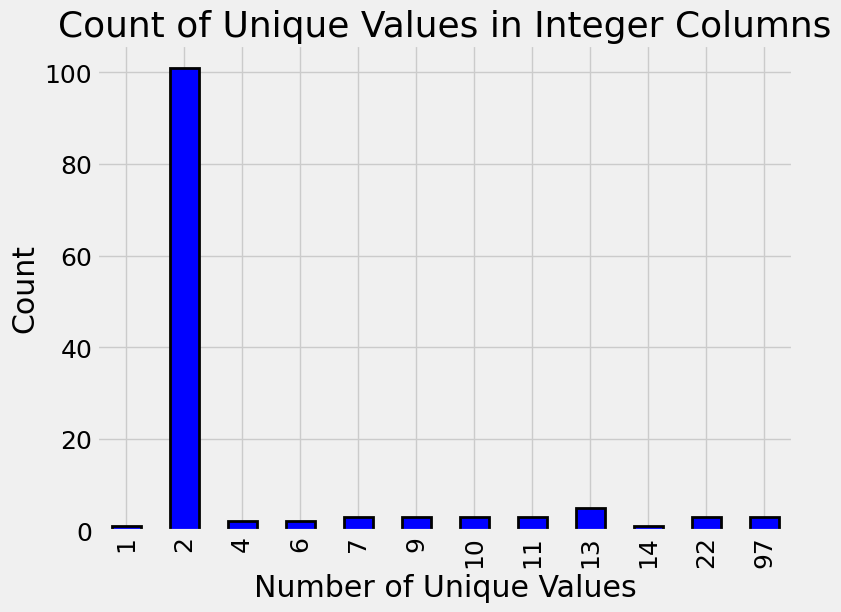

In [8]:

train.select_dtypes(np.int64).nunique().value_counts().sort_index().plot.bar(
    color = 'blue', figsize = (8,6), edgecolor = 'k', linewidth = 2);
  
plt.xlabel('Number of Unique Values')
plt.ylabel('Count')
plt.title('Count of Unique Values in Integer Columns')


- 고유한 값이 2개만 있는 열은 boolean(0 또는 1)을 나타냅니다. 

- 대부분의 경우 이 부울 정보는 이미 가구 수준에 있습니다. 예를 들어, 냉장고 열에는 가정에 냉장고가 있는지 여부가 표시됩니다. 가구 수준에 있는 부울 열에서 피쳐를 작성할 때는 이를 집계할 필요가 없습니다. 그러나 개별 수준에 있는 부울 열은 집계해야 합니다.

##Float Columns

- 또 다른 열 유형은 연속형 변수를 나타내는 플로트입니다. 빠른 분포도를 만들어 모든 부동 열의 분포를 표시할 수 있습니다. 우리는 OrderedDict를 사용하여 빈곤 수준을 색상에 매핑할 것입니다. 이것은 키와 값을 지정한 순서와 동일하게 유지하기 때문입니다(일반적인 Python 사전과 다릅니다).

- 다음 그래프는 목표값에 따라 색상이 지정된 부동 열의 분포를 보여줍니다. 이러한 그래프를 통해 가구빈곤 수준에 따라 변동 분포에 유의한 차이가 있는지 확인할 수 있습니다.


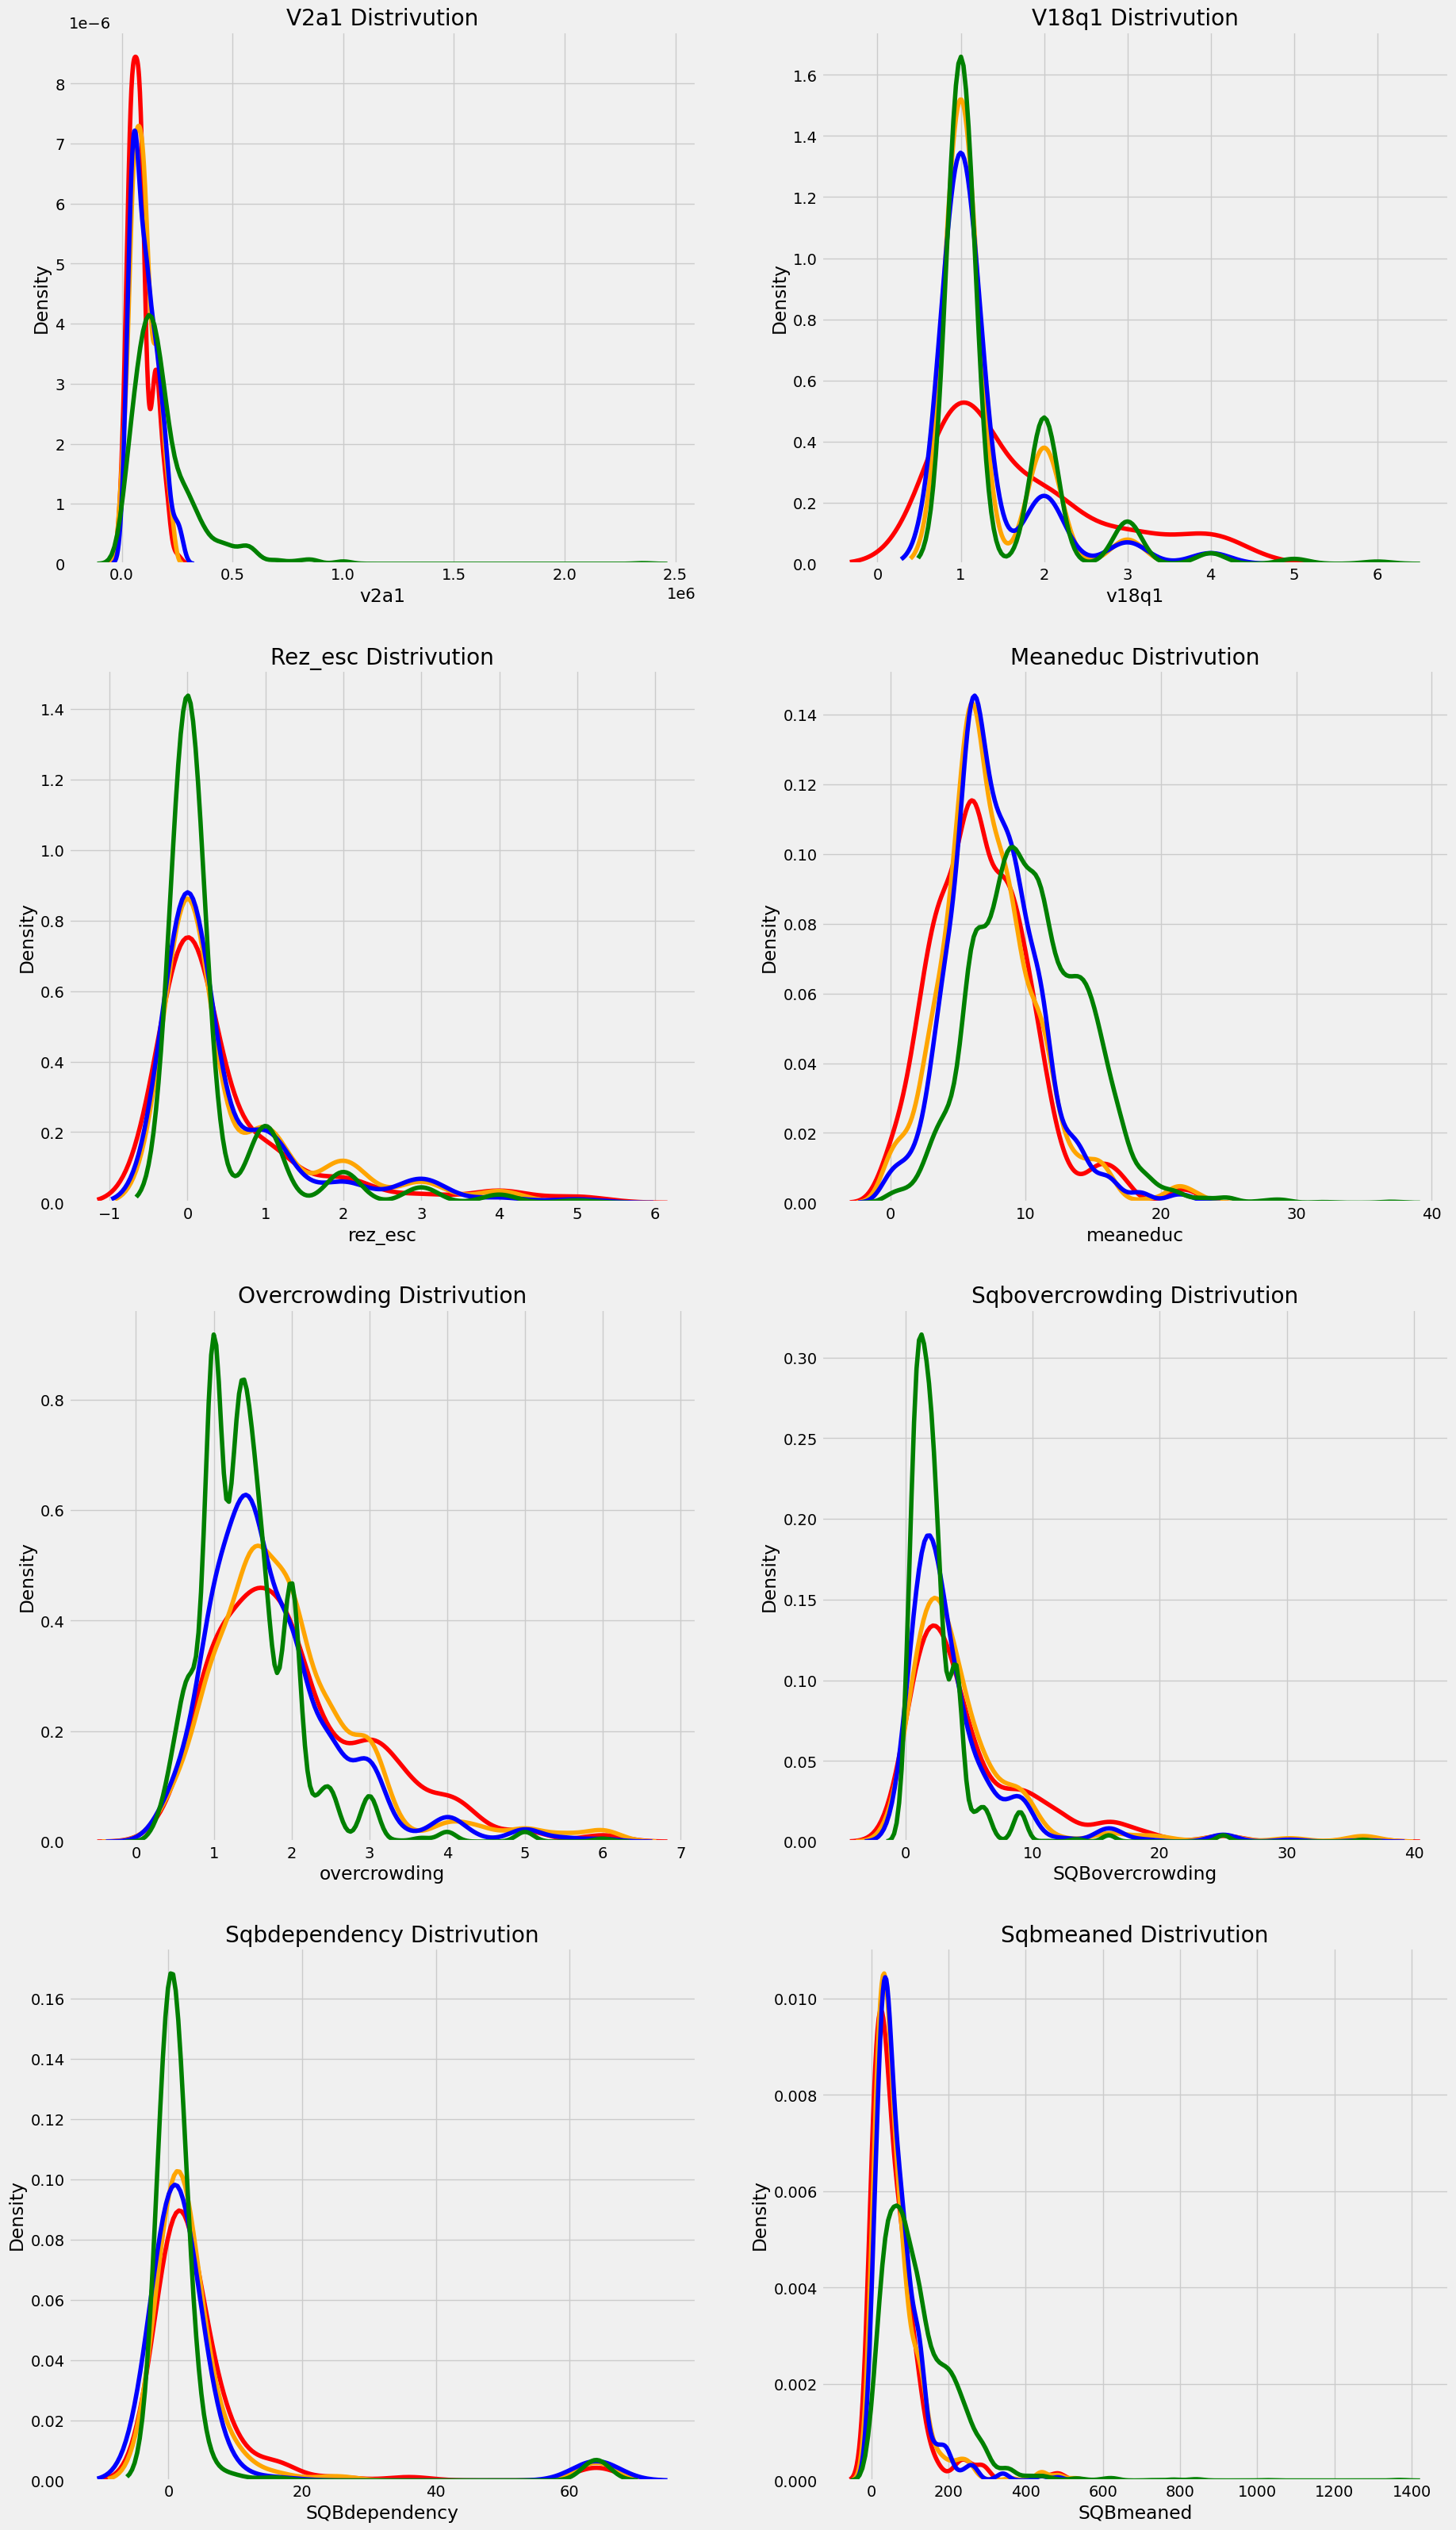

In [9]:
from collections import OrderedDict

plt.figure(figsize = (20,16))
plt.style.use('fivethirtyeight')

colors = OrderedDict({1: 'red', 2:'orange', 3: 'blue', 4: 'green'})
poverty_mapping = OrderedDict({1: 'extreme', 2: 'moderate', 3:'vulnerable', 4: 'non vulnerable'})

for i, col in enumerate(train.select_dtypes('float')):
  ax = plt.subplot(4,2,i+1)
  for poverty_level, color in colors.items():
    sns.kdeplot(train.loc[train['Target'] == poverty_level, col].dropna(), 
                    ax = ax, color = color, label = poverty_mapping[poverty_level])
    plt.title(f'{col.capitalize()} Distrivution')
    plt.xlabel(f'{col}')
    plt.ylabel('Density')

plt.subplots_adjust(top=2)

- 나중에 변수와 목표값 간의 상관 관계를 계산하여 형상 사이의 관계를 측정하겠지만, 이러한 그림은 이미 어떤 변수가 모형과 가장 "관련이 있을" 수 있는지 파악할 수 있습니다. 

- 예를 들어, 가구 내 성인의 평균 교육을 나타내는 평균 교육은 빈곤 수준과 관련이 있는 것으로 보입니다. 평균 성인 교육이 높을수록 빈곤 수준이 낮은 목표치의 가치가 높아집니다. 교육의 중요성에 대한 주제는 우리가 이 노트북에서 계속해서 다시 찾을 것이라는 것입니다!

## Obect Columns


In [10]:
train.select_dtypes('object').head()

Id    idhogar dependency edjefe edjefa
0  ID_279628684  21eb7fcc1         no     10     no
1  ID_f29eb3ddd  0e5d7a658          8     12     no
2  ID_68de51c94  2c7317ea8          8     no     11
3  ID_d671db89c  2b58d945f        yes     11     no
4  ID_d56d6f5f5  2b58d945f        yes     11     no

- Id 및 idhogar 개체 유형은 변수를 식별하기 때문에 의미가 있습니다. 그러나 다른 열은 문자열과 숫자가 혼합된 것으로 보이며, 기계 학습을 수행하기 전에 이를 해결해야 합니다. 다음 열에 대한 설명서에 따르면:

  - dependency: 종속률, 계산된 =(19세 미만 또는 64세 이상 가구원 수)/(19세 이상 64세 미만 가구원 수)
  - edjeefe: 남성 가장의 수년간 교육, 에스코라리(교육연수), 가장과 성별의 상호작용을 기반으로 yes=1 및 no=0
  - edjefa: 여성 가장의 수년간 교육, 에스코라리(교육연수), 가장과 성별의 상호작용을 기반으로 yes=1 및 no=0

- 이러한 설명을 통해 문제가 해결됩니다. 이 세 변수 "예" = 1 및 "아니오" = 0의 경우 매핑을 사용하여 변수를 수정하고 부동 소수점으로 변환할 수 있습니다.

In [11]:
mapping = {'yes':1, 'no':0}

for df in [train, test]:
  df['dependency'] = df['dependency'].replace(mapping).astype(np.float64)
  df['edjefa'] = df['edjefa'].replace(mapping).astype(np.float64)
  df['edjefe'] = df['edjefe'].replace(mapping).astype(np.float64)

train[['dependency', 'edjefa', 'edjefe']].describe()

dependency       edjefa       edjefe
count  9557.000000  9557.000000  9557.000000
mean      1.149550     2.896830     5.096788
std       1.605993     4.612056     5.246513
min       0.000000     0.000000     0.000000
25%       0.333333     0.000000     0.000000
50%       0.666667     0.000000     6.000000
75%       1.333333     6.000000     9.000000
max       8.000000    21.000000    21.000000

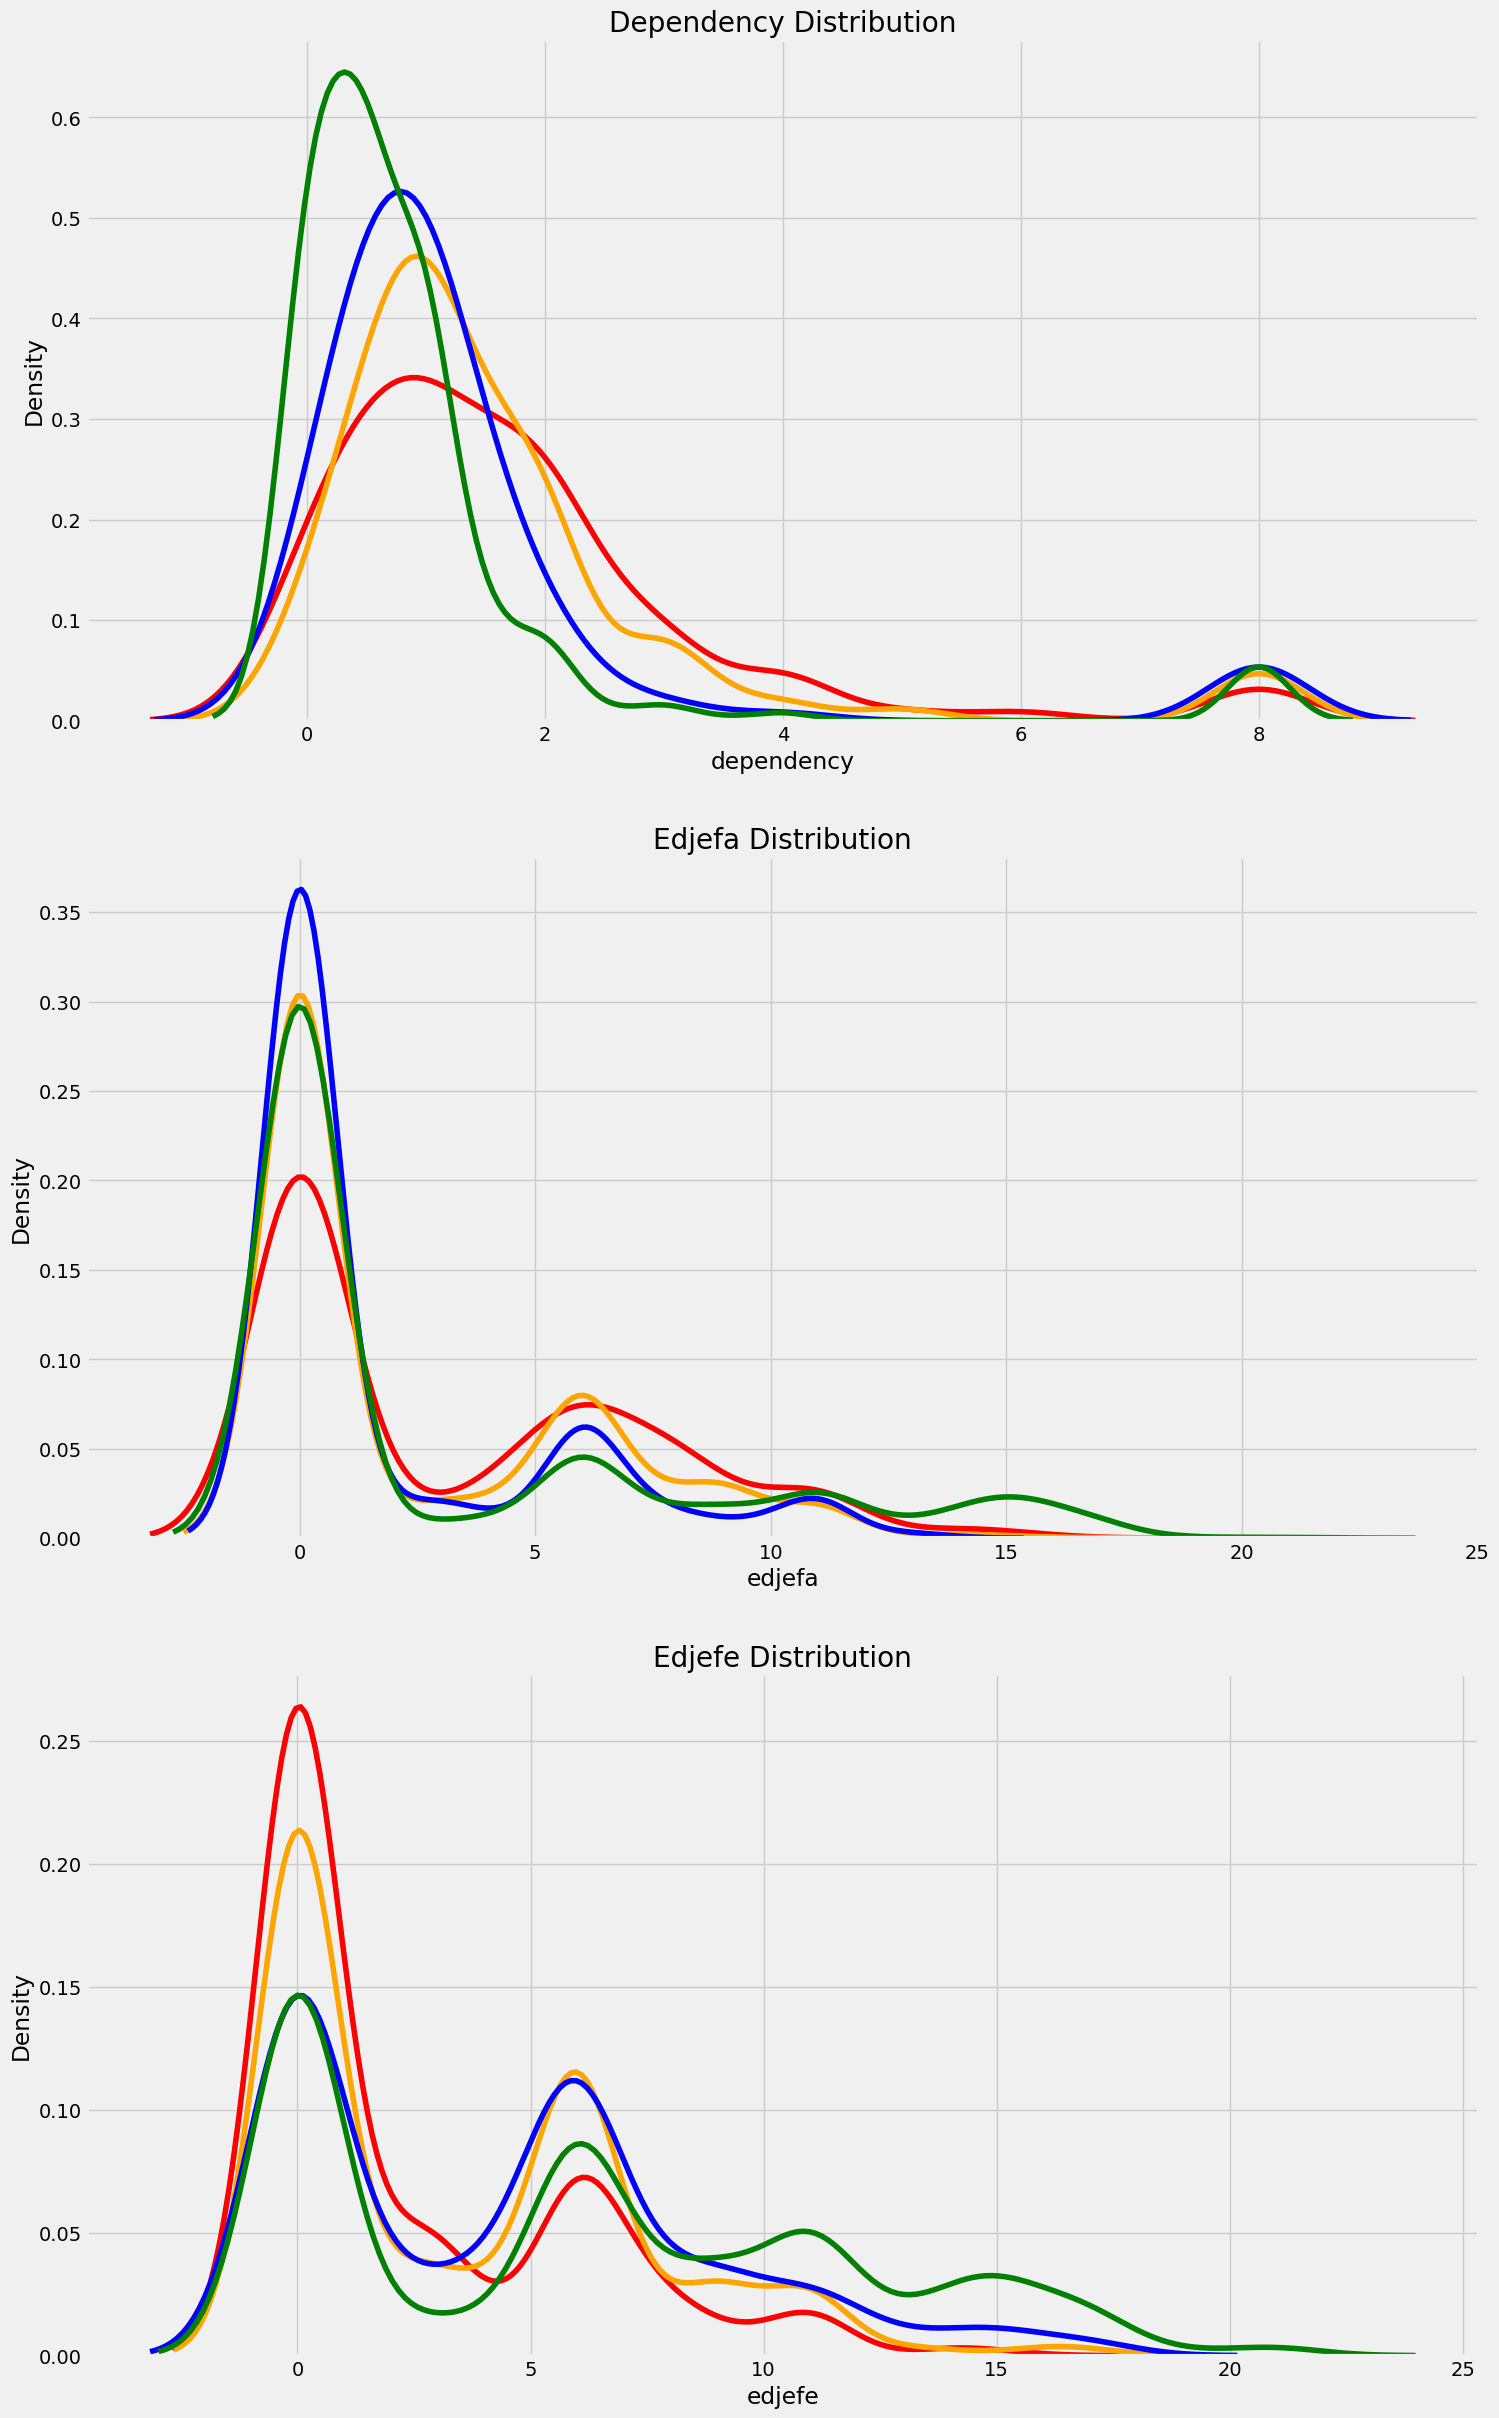

In [12]:
plt.figure(figsize = (16,12))

for i, col in enumerate(['dependency', 'edjefa', 'edjefe']):
  ax = plt.subplot(3, 1, i+1)
  for poverty_level, color in colors.items():
    sns.kdeplot(train.loc[train['Target']==poverty_level, col].dropna(),
                ax = ax, color = color, label= poverty_mapping[poverty_level])
    plt.title(f'{col.capitalize()} Distribution')
    plt.xlabel(f'{col}')
    plt.ylabel('Density')

plt.subplots_adjust(top=2)

- 이러한 변수는 이제 숫자로 올바르게 표현되며 기계 학습 모델에 입력될 수 있습니다.

- 위와 같은 작업을 조금 더 쉽게 수행하기 위해 교육 및 테스트 데이터 프레임을 함께 사용할 것입니다. 기능 엔지니어링을 시작하면 두 데이터 프레임에 동일한 작업을 적용하여 동일한 기능을 사용하게 되므로 이 작업이 중요합니다. 나중에 대상을 기준으로 세트를 분리할 수 있습니다.


In [13]:
test['Target'] = np.nan
data = train.append(test, ignore_index = True)

<ipython-input-13-02105010bbbe>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = train.append(test, ignore_index = True)


# Exploring Label Distribution

- 다음으로 레이블의 분포를 보면 문제가 얼마나 불균형적인지 알 수 있습니다. 네 가지 가능한 정수 수준이 있으며, 빈곤의 네 가지 수준을 나타냅니다. 올바른 레이블을 보려면 parentesco1 == 1인 열에만 부분 집합을 지정합니다. 이 열은 각 가구에 대한 올바른 레이블인 가장이기 때문입니다.

- 아래 막대 그림은 검정 레이블이 없기 때문에 교육 레이블의 분포를 보여줍니다.

1.0     222
2.0     442
3.0     355
4.0    1954
Name: Target, dtype: int64

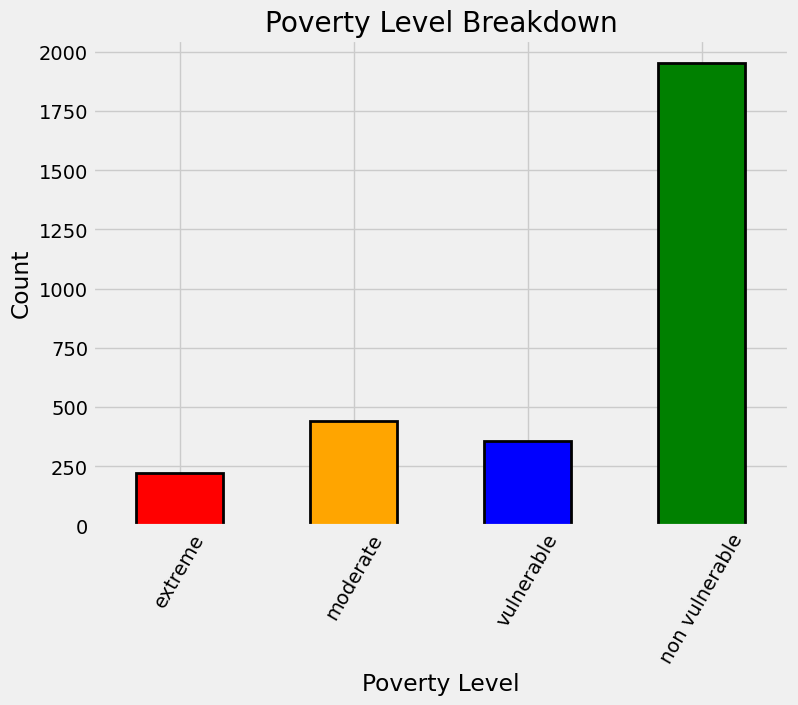

In [14]:
heads = data.loc[data['parentesco1'] == 1].copy()

train_labels = data.loc[(data['Target'].notnull()) & (data['parentesco1']==1), ['Target', 'idhogar']]

label_counts = train_labels['Target'].value_counts().sort_index()

label_counts.plot.bar(figsize = (8,6), color = colors.values(), edgecolor = 'k', linewidth = 2)

plt.xlabel('Poverty Level')
plt.ylabel('Count')
plt.xticks([x-1 for x in poverty_mapping.keys()],
            list(poverty_mapping.values()), rotation = 60)
plt.title('Poverty Level Breakdown')
label_counts

- 우리는 불균형적인 클래스 문제를 다루고 있습니다(왜 대회 주최자가 가중 F1! 대신 매크로 F1 점수를 메트릭으로 선택하는지 흥미를 유발합니다). 비취약계층으로 분류되는 가구가 다른 어떤 범주보다 훨씬 많습니다. 극빈층은 가장 작습니다 (이것이 우리를 낙관적으로 만들어야 한다고 생각합니다!).

- 불균형 분류 문제의 한 가지 문제는 기계 학습 모델이 훨씬 적은 예제를 보기 때문에 소수 클래스를 예측하는 데 어려움을 겪을 수 있다는 것입니다. 이것을 인간의 관점에서 생각해 보세요: 만약 우리가 빈곤을 분류하고 있고, 우리가 극심한 빈곤보다 빈곤이 없는 경우를 훨씬 더 많이 본다면, 노출이 적기 때문에 우리가 높은 빈곤 가구를 식별하는 것을 더 어렵게 만들 것입니다. 클래스 불균형을 해결할 수 있는 한 가지 잠재적인 방법은 오버샘플링(고급 노트북에서 다룹니다)입니다.

##Addressing Wrong Labels
- 현실적인 데이터 세트와 마찬가지로 코스타리카 빈곤 데이터에도 몇 가지 문제가 있습니다. 일반적으로 데이터 과학 프로젝트의 80%는 데이터를 정리하고 이상 징후/오류를 수정하는 데 사용됩니다. 이는 사람의 입력 오류, 측정 오류 또는 정확하지만 눈에 띄는 극단값일 수 있습니다. 이 문제의 경우 동일한 가구의 개인별 빈곤 수준이 다르기 때문에 일부 레이블이 올바르지 않습니다. 우리는 왜 이것이 사실인지 듣지 못했지만, 우리는 가장을 진정한 라벨로 사용하라는 말을 들었습니다.

- 그 정보는 우리의 일을 훨씬 더 쉽게 만들지만, 실제 문제에서는 레이블이 잘못된 이유와 문제를 해결하는 방법을 스스로 파악해야 합니다. 이 섹션에서는 라벨에 대한 문제를 엄격하게 해결할 필요는 없지만, 이 문제를 해결하는 방법을 보여주기 위해 노트북에 보관했습니다.

###Identify Errors
- 먼저 오류를 찾아야 수정할 수 있습니다. 가족 구성원의 레이블이 다른 가구를 찾기 위해 가구별로 데이터를 그룹화한 다음 대상의 고유 값이 하나만 있는지 확인할 수 있습니다


In [15]:
all_equal = train.groupby('idhogar')['Target'].apply(lambda x: x.nunique() == 1)
not_equal = all_equal[all_equal != True]
print('There are {} households where the family members do not all have the same target.'.format(len(not_equal)))


There are 85 households where the family members do not all have the same target.


In [16]:


train[train['idhogar'] == not_equal.index[0]][['idhogar', 'parentesco1', 'Target']]

idhogar  parentesco1  Target
7651  0172ab1d9            0       3
7652  0172ab1d9            0       2
7653  0172ab1d9            0       3
7654  0172ab1d9            1       3
7655  0172ab1d9            0       2

- 주최자들은 우리에게 올바른 라벨은 가장에 대한 라벨이며, 여기서 parentesco1 == 1입니다. 이 가구의 경우 올바른 라벨은 모든 구성원에 대해 3입니다. 우리는 이 가구의 모든 개인에게 올바른 빈곤 수준을 재할당함으로써 (나중에 보여진 것처럼) 이것을 바로잡을 수 있습니다. 실제 환경에서는 스스로(또는 팀의 도움을 받아) 문제를 해결하는 방법에 대한 어려운 결정을 내려야 할 수도 있습니다.

### Familes without Heads of Household

- 동일 가구에 속한 개인에게 가장의 라벨을 지정하여 모든 라벨 불일치를 수정할 수 있습니다. 하지만 잠시만요, 여러분은 "만약 가장이 없는 가구가 있다면 어떨까요?"라고 물을 수도 있습니다? 그리고 만약 그 가구원들이 라벨에 대한 가치관이 다르다면 어떨까요?"

In [17]:
households_leader = train.groupby('idhogar')['parentesco1'].sum()
households_no_head = train.loc[train['idhogar'].isin(households_leader[households_leader == 0].index), :]

print('There are {} households without a head.'.format(households_no_head['idhogar'].nunique()))


There are 15 households without a head.


In [18]:
households_no_head_equal = households_no_head.groupby('idhogar')['Target'].apply(lambda x: x.nunique() == 1)

print(f'{sum(households_no_head_equal == False)} Households with  no haed have different labels.')

0 Households with  no haed have different labels.


- 다행이네요! 이것은 우리가 head가 없고 구성원들이 라벨의 가치가 다른 가정에 대해 걱정할 필요가 없다는 것을 의미합니다! 

- 이 문제의 경우, 주최자에 따르면, 가구에 head가 없으면, 진정한 라벨이 없습니다. 따라서, 우리는 실제로 교육을 위해 머리가 없는 가구를 사용하지 않을 것입니다. 그럼에도 불구하고, 데이터를 조사하는 이 과정을 거치는 것은 여전히 좋은 연습입니다!

###Correct Errors 

이제 우리는 head가 있는 가구와 구성원들의 빈곤 수준이 다른 가구의 라벨을 수정을 할 수 있습니다.


In [19]:
for household in not_equal.index:
    true_target = int(train[(train['idhogar'] == household) & (train['parentesco1'] == 1.0)]['Target'])
    
    train.loc[train['idhogar'] == household, 'Target'] = true_target
    
all_equal = train.groupby('idhogar')['Target'].apply(lambda x: x.nunique() == 1)

not_equal = all_equal[all_equal != True]
print('There are {} households where the family members do not all have the same target.'.format(len(not_equal)))

There are 0 households where the family members do not all have the same target.


- 라벨에는 세대주만 사용하기 때문에 이 단계가 완전히 필요한 것은 아니지만 실제 상황에서 발생할 수 있는 데이터 오류를 수정하기 위한 워크플로우를 보여줍니다. 그것을 추가적인 일로 생각하지 말고, 당신의 경력을 위해 연습하세요!

##Missing Variables
- 탐색적 데이터 분석의 가장 중요한 단계 중 하나는 데이터에서 결측값을 찾고 처리 방법을 결정하는 것입니다. 누락된 값은 기계 학습 모델을 사용하기 전에 입력해야 하며 기능에 따라 입력하는 최선의 전략을 생각해야 합니다. 여기서 데이터 정의를 탐구해야 합니다.

- 먼저 각 열의 결측값 백분율을 확인할 수 있습니다.


In [20]:
missing = pd.DataFrame(data.isnull().sum()).rename(columns = {0:'total'})

missing['percent'] = missing['total'] / len(data)

missing.sort_values('percent', ascending = False).head(10).drop('Target')

total   percent
rez_esc       27581  0.825457
v18q1         25468  0.762218
v2a1          24263  0.726154
SQBmeaned        36  0.001077
meaneduc         36  0.001077
hogar_adul        0  0.000000
parentesco10      0  0.000000
parentesco11      0  0.000000
parentesco12      0  0.000000

- 우리는 테스트 데이터를 위한 NaN을 만들었기 때문에 Target에 대해 걱정할 필요가 없습니다. 그러나 결측값의 비율이 높은 나머지 세 개의 열을 처리해야 합니다.

- v18q1: 태블릿 수

- 가족이 소유한 태블릿의 수를 나타내는 v18q1부터 시작하겠습니다. 이 변수의 값 수를 확인할 수 있습니다. 이것은 가계 변수이기 때문에 가계 차원에서만 보는 것이 타당하기 때문에 가장에 대해서만 행을 선택하도록 하겠습니다.

- 값 카운트를 표시하는 함수
서로 다른 열에 대한 값 카운트를 표시할 수 있으므로 이를 수행할 수 있는 간단한 함수를 작성할 수 있습니다!

In [21]:
def plot_value_counts(df, col, heads_only = False):
  if heads_only:
    df = df.loc[df['parentesco1']==1].copy()
  plt.figure(figsize = (8,6))
  df[col].value_counts().sort_index().plot.bar(color= 'blue', edgecolor = 'k',linewidth = 2)
  plt.xlabel(f'{col}')
  plt.title(f'{col} Value Counts')
  plt.ylabel('Count')
  plt.show()

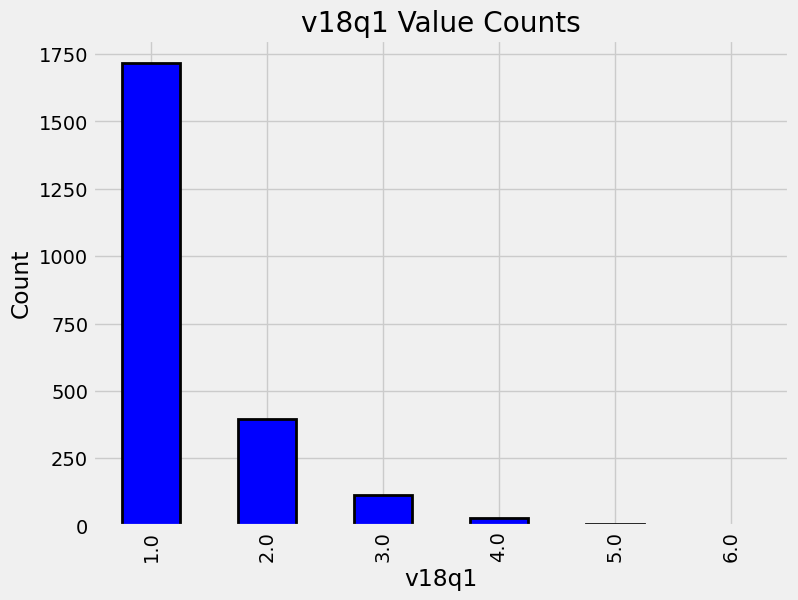

In [22]:
plot_value_counts(heads, 'v18q1')

- 현재 데이터로만 계산하면 가장 일반적으로 소유할 수 있는 태블릿의 수는 1인 것 같습니다. 하지만, 우리는 누락된 데이터에 대해서도 생각할 필요가 있습니다. 이 경우, 이 범주에 난이 있는 가족은 태블릿을 소유하지 않을 수 있습니다! 데이터 정의를 살펴보면 v18q는 가족이 태블릿을 소유하고 있는지 여부를 나타냅니다. 우리는 이 열을 태블릿의 수와 결합하여 조사하여 우리의 가설이 유지되는지 확인해야 합니다.

- v18q 값을 기준으로 그룹화한 다음 v18q1에 대한 null 값의 수를 계산할 수 있습니다. 이렇게 하면 null 값이 가족이 태블릿을 소유하지 않음을 나타내는 것인지 알 수 있습니다.

In [23]:
heads.groupby('v18q')['v18q1'].apply(lambda x: x.isnull().sum())

v18q
0    8044
1       0
Name: v18q1, dtype: int64

그러면 문제가 해결됩니다! v18q1용 Nan을 보유한 모든 가족은 태블릿을 소유하지 않습니다. 따라서 이 결측값을 0으로 채울 수 있습니다.

In [24]:
data['v18q1'] = data['v18q1'].fillna(0)

- v2a1: 월세 지불

- 다음 누락된 열은 월세 지불을 나타내는 v2a1입니다.

- 월세 미지급액의 누락된 값을 살펴보는 것 외에도 주택의 소유/임대 상태를 보여주는 열인 tipovivi_의 분포도 살펴볼 수 있어 흥미로울 것입니다. 이 그림의 경우 월세 지불에 대한 난이 있는 주택의 소유 상태를 보여줍니다.

Text(0.5, 1.0, 'Home Ownership Status for Households Missing Rent Payments')

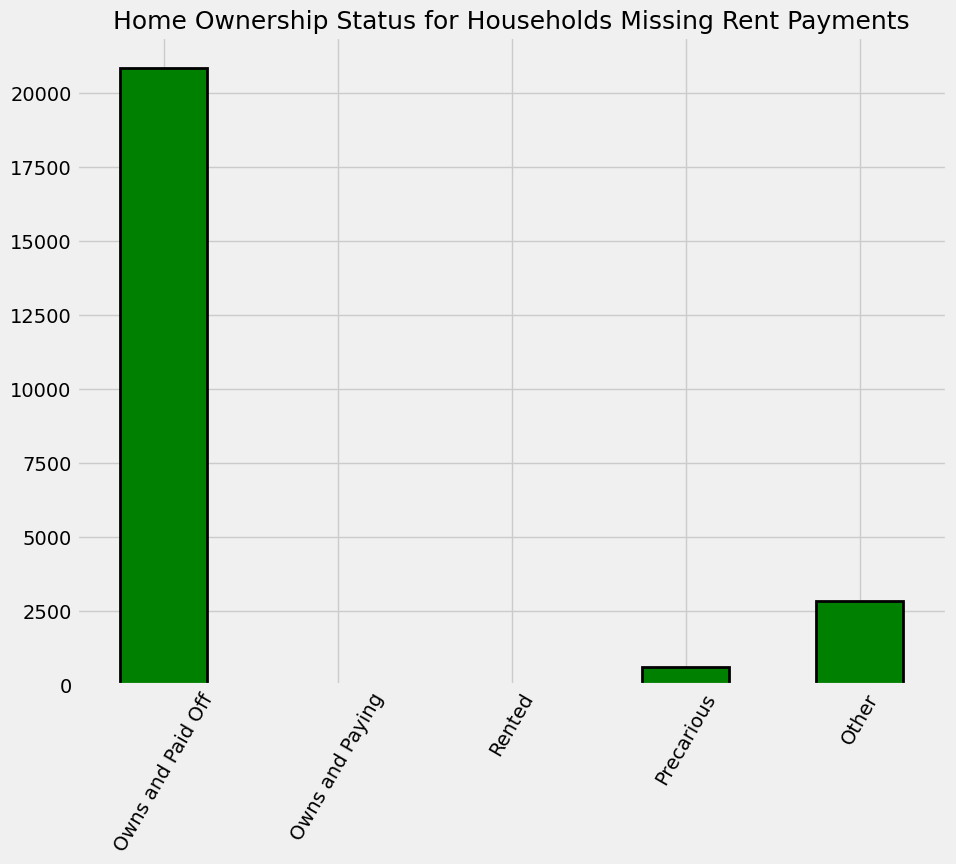

In [25]:
own_variables = [x for x in data if x.startswith('tipo')]

data.loc[data['v2a1'].isnull(), own_variables].sum().plot.bar(
    figsize = (10, 8),color = 'green', edgecolor = 'k', linewidth = 2);

plt.xticks([0,1,2,3,4],
           ['Owns and Paid Off', 'Owns and Paying', 'Rented', 'Precarious', 'Other'],rotation = 60)
plt.title('Home Ownership Status for Households Missing Rent Payments', size = 18)

- 주택 소유 변수의 의미는 다음과 같습니다:

tipovivi1, =1개의 소유 및 전액 지불 주택
tipovivi2, "=1 소유, 분할 지불"
tipovivi3, = 1대 대여
tipovivi4, =1 불안정함
tipovivi5, "=기타 1개(대여, 대여)"

- 문제를 해결했습니다! 글쎄요, 대부분: 월세를 내지 않는 가구들은 일반적으로 자신의 집을 소유하고 있습니다. 일부 다른 상황에서는 정보가 누락된 이유를 알 수 없습니다.

- 소유하고 있고 월세가 누락된 주택의 경우 임대료 지급액을 0으로 설정할 수 있습니다. 다른 주택의 경우 결측값을 귀속시킬 수 있지만 이러한 가구에 결측값이 있음을 나타내는 플래그(부울) 열을 추가합니다.


In [26]:
data.loc[(data['tipovivi1'] == 1), 'v2a1'] = 0
data['v2a1-missing'] = data['v2a1'].isnull()

data['v2a1-missing'].value_counts()

False    29994
True      3419
Name: v2a1-missing, dtype: int64

- rez_esc: 학교에서 몇 년 뒤처짐

- 결측값의 비율이 높은 마지막 열은 rez_esc로 학교에서 몇 년 뒤처져 있음을 나타냅니다. null 값을 가진 가정의 경우 현재 학교에 자녀가 없을 수 있습니다. 이 열에 결측값이 있는 사람의 나이와 결측값이 없는 사람의 나이를 찾아 이를 테스트해 보겠습니다.

In [27]:
data.loc[data['rez_esc'].notnull()]['age'].describe()

count    5832.000000
mean       12.185700
std         3.198618
min         7.000000
25%         9.000000
50%        12.000000
75%        15.000000
max        17.000000
Name: age, dtype: float64

- 이것이 말해주는 것은 값이 빠진 가장 나이가 많은 나이가 17세라는 것입니다. 이것보다 나이가 많은 사람이라면, 우리는 그들이 단순히 학교에 없다고 가정할 수도 있습니다. 가치가 없는 사람들의 나이를 살펴보도록 하겠습니다.

In [28]:
data.loc[data['rez_esc'].isnull()]['age'].describe()

count    27581.000000
mean        39.110656
std         20.983114
min          0.000000
25%         24.000000
50%         38.000000
75%         54.000000
max         97.000000
Name: age, dtype: float64

- 이 대회에 대한 논의를 몇 가지 읽어보면 이 변수는 7세에서 19세 사이의 개인에게만 정의된다는 것을 알게 됩니다. 이 범위보다 나이가 어린 사람이나 나이가 많은 사람은 아마도 연이 없기 때문에 값을 0으로 설정해야 합니다. 이 변수의 경우 개체가 19세 이상이고 결측값이 있거나 7세 미만이고 결측값이 있으면 0으로 설정할 수 있습니다. 다른 사용자의 경우 값을 입력한 상태로 두고 부울 플래그를 추가합니다.

In [29]:
data.loc[((data['age'] > 19) | (data['age'] < 7)) & (data['rez_esc'].isnull()), 'rez_esc'] = 0

data['rez_esc-missing'] = data['rez_esc'].isnull()

- 또한 rez_esc 열에 특이치가 하나 있습니다. 다시, 경쟁업체의 논의를 통해 이 변수의 최대값은 5임을 알 수 있습니다. 따라서 5보다 큰 값은 5로 설정해야 합니다.

In [30]:
data.loc[data['rez_esc'] > 5, 'rez_esc'] = 5

#Plot Two Categorical Variables

- 두 범주형 변수가 서로 상호 작용하는 방식을 보여주기 위해 산점도, 면봉도, 상자도 등 여러 가지 표시 옵션이 있습니다. 저는 이러한 선택에 만족하지 못했기 때문에 아래에 함수를 썼습니다. 기본적으로 점의 크기가 각 x 값으로 표시되는 주어진 y 값의 백분율을 나타내는 두 범주의 산점도입니다

In [31]:
def plot_categoricals(x, y, data, annotate = True):
    """Plot counts of two categoricals.
    Size is raw count for each grouping.
    Percentages are for a given value of y."""
    
    raw_counts = pd.DataFrame(data.groupby(y)[x].value_counts(normalize = False))
    raw_counts = raw_counts.rename(columns = {x: 'raw_count'})
    
    counts = pd.DataFrame(data.groupby(y)[x].value_counts(normalize = True))
    
    counts = counts.rename(columns = {x: 'normalized_count'}).reset_index()
    counts['percent'] = 100 * counts['normalized_count']
    
    counts['raw_count'] = list(raw_counts['raw_count'])
    
    plt.figure(figsize = (14, 10))
    plt.scatter(counts[x], counts[y], edgecolor = 'k', color = 'lightgreen',
                s = 100 * np.sqrt(counts['raw_count']), marker = 'o',
                alpha = 0.6, linewidth = 1.5)
    
    if annotate:
        for i, row in counts.iterrows():
            plt.annotate(xy = (row[x] - (1 / counts[x].nunique()), 
                               row[y] - (0.15 / counts[y].nunique())),
                         color = 'navy',
                         text = f"{round(row['percent'], 1)}%")
        
    plt.yticks(counts[y].unique())
    plt.xticks(counts[x].unique())
    
    sqr_min = int(np.sqrt(raw_counts['raw_count'].min()))
    sqr_max = int(np.sqrt(raw_counts['raw_count'].max()))
    
    msizes = list(range(sqr_min, sqr_max,
                        int(( sqr_max - sqr_min) / 5)))
    markers = []
    
    for size in msizes:
        markers.append(plt.scatter([], [], s = 100 * size, 
                                   label = f'{int(round(np.square(size) / 100) * 100)}', 
                                   color = 'lightgreen',
                                   alpha = 0.6, edgecolor = 'k', linewidth = 1.5))
        
    plt.legend(handles = markers, title = 'Counts',
               labelspacing = 3, handletextpad = 2,
               fontsize = 16,
               loc = (1.10, 0.19))
    
    plt.annotate(f'* Size represents raw count while % is for a given y value.',
                 xy = (0, 1), xycoords = 'figure points', size = 10)
    
    plt.xlim((counts[x].min() - (6 / counts[x].nunique()), 
              counts[x].max() + (6 / counts[x].nunique())))
    plt.ylim((counts[y].min() - (4 / counts[y].nunique()), 
              counts[y].max() + (4 / counts[y].nunique())))
    plt.grid(None)
    plt.xlabel(f"{x}"); plt.ylabel(f"{y}"); plt.title(f"{y} vs {x}");


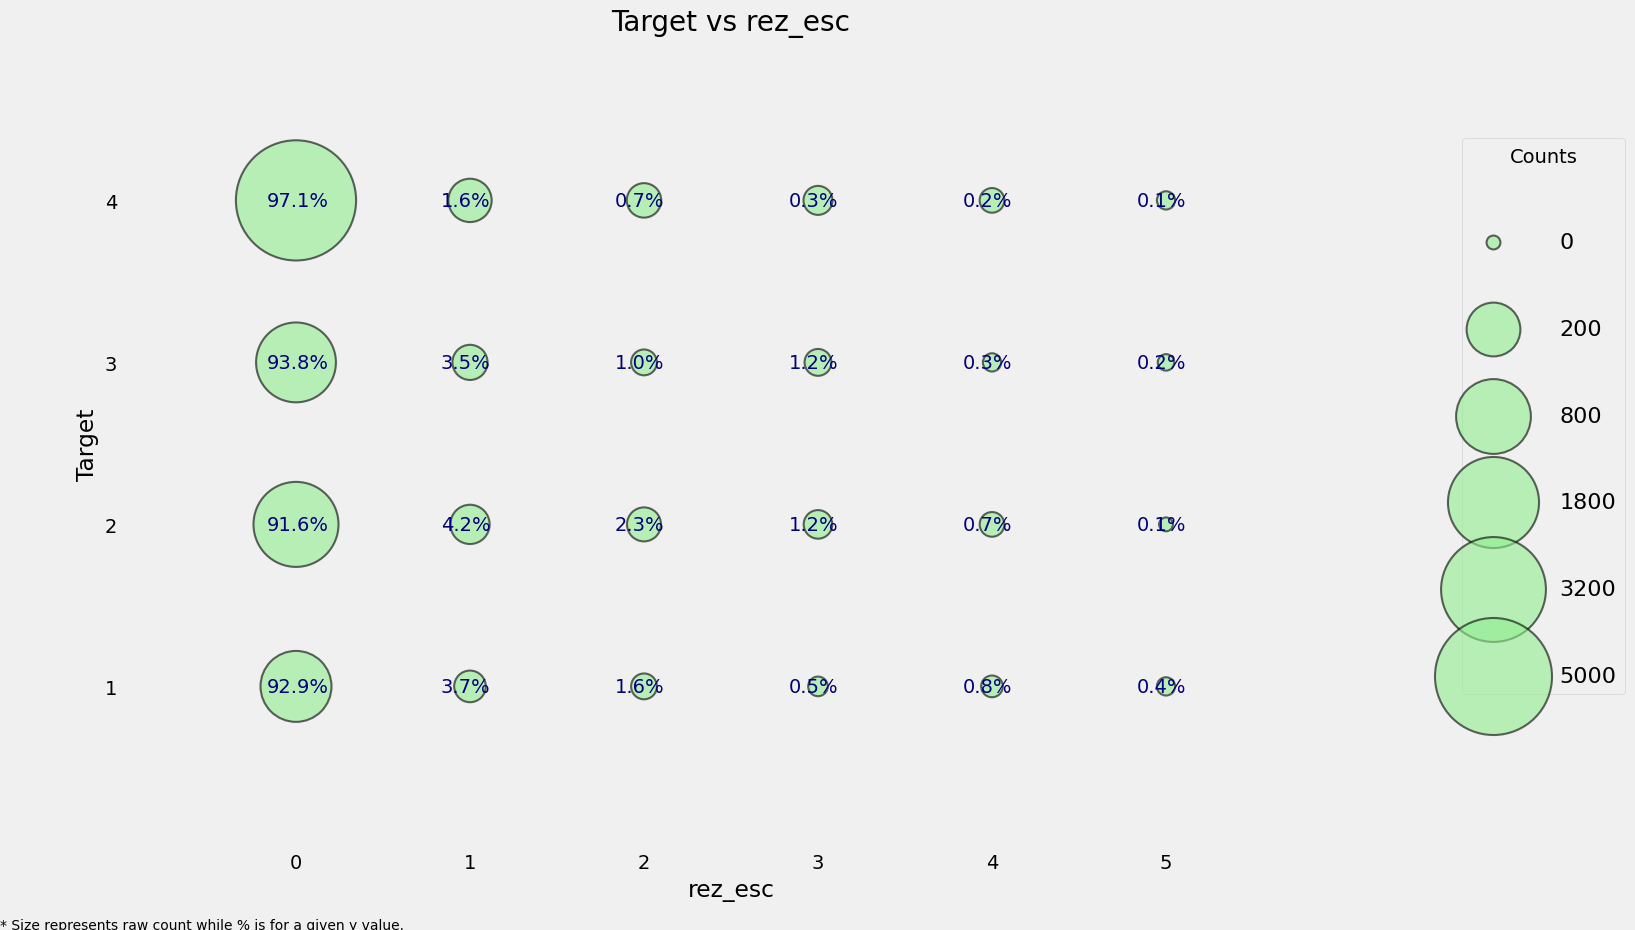

In [32]:
plot_categoricals('rez_esc', 'Target', data)

- 마커의 크기는 원시 카운트를 나타냅니다. 그림을 읽으려면 지정된 y 값을 선택한 다음 행 전체를 읽습니다. 예를 들어, 빈곤 수준이 1인 경우, 93%의 개인이 1년 이상 뒤처지지 않고 총 800명 정도의 개인이 있으며, 약 0.4%의 개인이 5년 뒤쳐져 있으며, 이 범주에 속하는 총 50명 정도의 개인이 있습니다. 이 그림은 전체 카운트와 범주 내 비율을 모두 표시하려고 합니다. 완벽하지는 않지만 시도해 보았습니다!

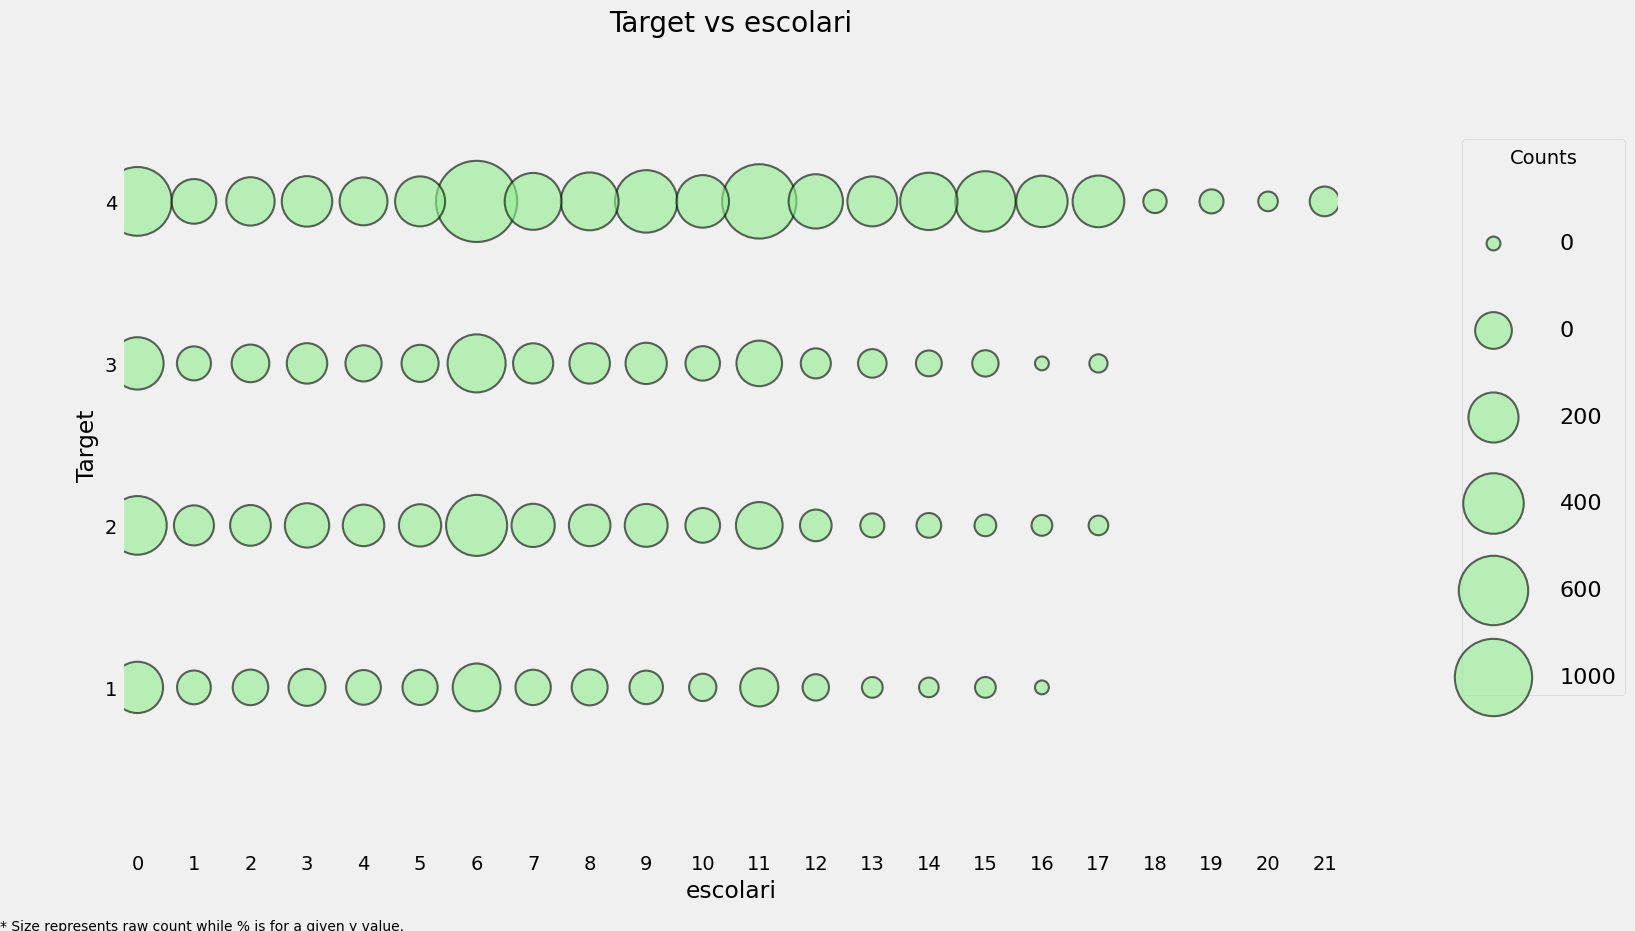

In [33]:
plot_categoricals('escolari', 'Target', data, annotate = False)

- 각 열의 나머지 결측값은 귀책이라고 하는 공정에 입력됩니다. 일반적으로 사용되는 귀책법에는 여러 가지 유형이 있으며 가장 간단하고 효과적인 방법 중 하나는 결측값을 열의 중위수로 채우는 것입니다.

- 결측값을 사용하는 마지막 단계로, 이러한 값 중 하나가 결측값인 경우의 목표값 분포를 표시할 수 있습니다

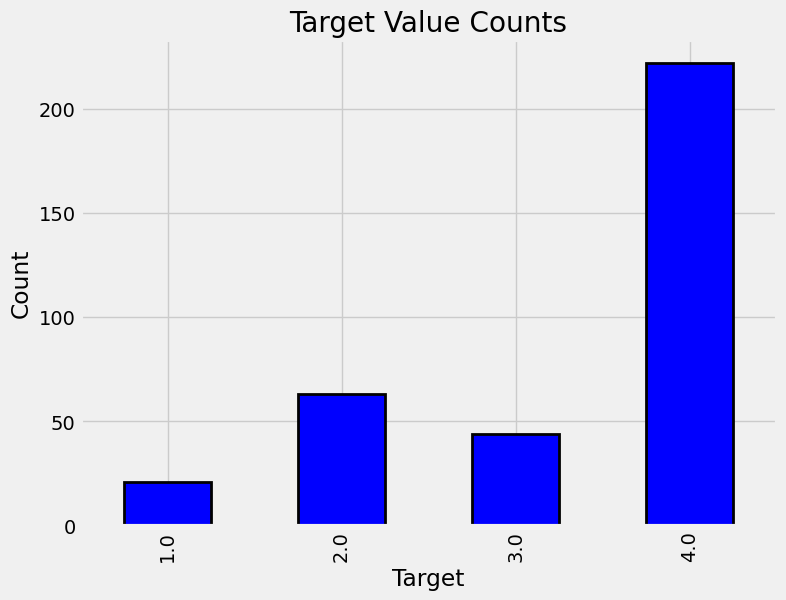

In [34]:
plot_value_counts(data[(data['rez_esc-missing'] == 1)], 'Target')

- 이 분포는 전체 데이터에 대한 분포와 일치하는 것으로 보입니다.

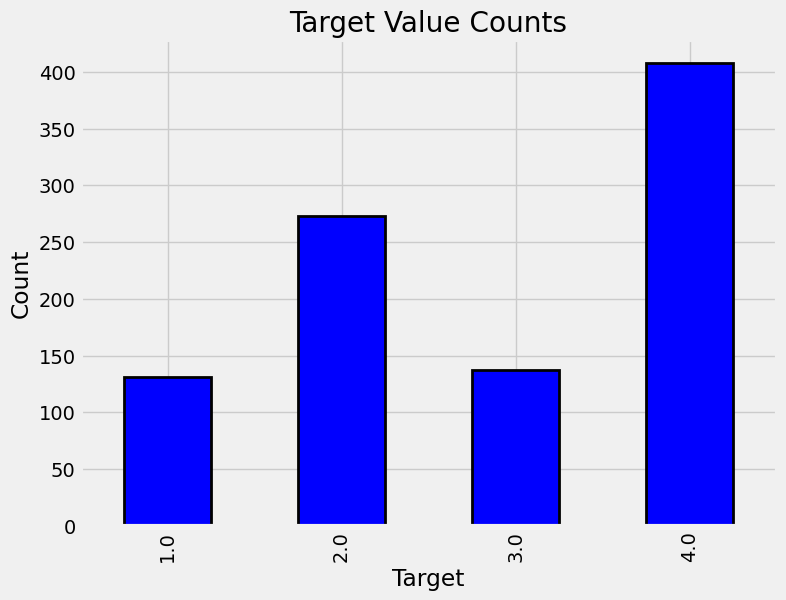

In [35]:
plot_value_counts(data[(data['v2a1-missing'] == 1)],'Target')

- 이것은 2의 높은 유병률을 고려할 때 더 많은 빈곤의 지표가 될 수 있을 것으로 보입니다: 중간 정도의 빈곤.

- 이것은 중요한 점을 나타냅니다. 때로는 누락된 정보가 제공된 정보만큼 중요합니다.


#Feature Engineering

- 우리가 할 수 있는 더 많은 탐색적인 데이터 분석이 있지만, 우선 우리는 가구 수준에서 데이터를 통합하는 작업을 해야 합니다. 우리는 이미 각 가정에 대한 일부 정보를 가지고 있지만, 교육을 위해서는 각 가정에 대한 요약된 모든 정보가 필요할 것입니다. 즉, 집에 있는 개인을 그룹화(그룹별)하고 개별 변수의 집계(agg)를 수행합니다.

- 다른 노트북에서는 자동 기능 엔지니어링을 사용하여 이를 수행하는 방법을 보여주며, 자동 기능 엔지니어링이 머신 러닝 워크플로우의 표준 부분이 되어야 합니다. 지금은 수작업으로 이 작업을 수행할 예정이지만 기능 도구의 자동화된 기능 엔지니어링에 대해서는 확실히 살펴보겠습니다.

## Column Definitions

- 때때로 데이터 과학에서 우리는 데이터를 파헤치거나 시간이 많이 걸리는 지루한 작업을 해야 합니다. 이것이 분석의 일부입니다. 우리는 데이터 설명을 사용하여 개별 수준과 가구 수준에 있는 열을 정의해야 합니다. 데이터 설명에서 변수 자체를 검토하는 것 외에 가구 수준에서 변수를 식별하는 방법은 없습니다. 제가 이미 해드렸으니 복사해서 붙여넣기만 하면 됩니다!

- 일부 변수는 다른 방식으로 처리해야 하기 때문에 다른 변수를 정의합니다. 각 수준에서 정의된 변수를 사용하면 필요에 따라 변수를 집계할 수 있습니다.

- 그 과정은 다음과 같습니다

  1. 변수를 가구 수준과 개별 수준으로 나눕니다
  2. 개별 수준 데이터에 적합한 집계 찾기
   - 순서형 변수는 통계적 집계를 사용할 수 있습니다
    - 부울 변수도 집계할 수 있지만 통계 수는 적습니다
  3. 개별 집계를 가구 수준 데이터에 결합합니다

###Define Variable Categories
- 변수에는 여러 가지 범주가 있습니다:

1. 개별 변수: 가구가 아닌 각 개인의 특성입니다
  - 부울: 예 또는 아니오(0 또는 1)
  - 순서가 지정된 이산: 순서가 있는 정수
2. 가구변수
  - 부울: 예 또는 아니오
  - 순서가 지정된 이산: 순서가 있는 정수
  - 연속 숫자
3. 변수 제곱: 데이터의 변수 제곱에서 파생됩니다
4. ID 변수: 데이터를 식별하며 피쳐로 사용해서는 안 됩니다

- 아래에서는 각 범주의 변수를 수동으로 정의합니다. 이것은 약간 지루하지만 필요하기도 합니다.

In [36]:
id_ = ['Id', 'idhogar', 'Target']

In [37]:
ind_bool = ['v18q', 'dis', 'male', 'female', 'estadocivil1', 'estadocivil2', 'estadocivil3', 
            'estadocivil4', 'estadocivil5', 'estadocivil6', 'estadocivil7', 
            'parentesco1', 'parentesco2',  'parentesco3', 'parentesco4', 'parentesco5', 
            'parentesco6', 'parentesco7', 'parentesco8',  'parentesco9', 'parentesco10', 
            'parentesco11', 'parentesco12', 'instlevel1', 'instlevel2', 'instlevel3', 
            'instlevel4', 'instlevel5', 'instlevel6', 'instlevel7', 'instlevel8', 
            'instlevel9', 'mobilephone', 'rez_esc-missing']

ind_ordered = ['rez_esc', 'escolari', 'age']

In [38]:
hh_bool = ['hacdor', 'hacapo', 'v14a', 'refrig', 'paredblolad', 'paredzocalo', 
           'paredpreb','pisocemento', 'pareddes', 'paredmad',
           'paredzinc', 'paredfibras', 'paredother', 'pisomoscer', 'pisoother', 
           'pisonatur', 'pisonotiene', 'pisomadera',
           'techozinc', 'techoentrepiso', 'techocane', 'techootro', 'cielorazo', 
           'abastaguadentro', 'abastaguafuera', 'abastaguano',
            'public', 'planpri', 'noelec', 'coopele', 'sanitario1', 
           'sanitario2', 'sanitario3', 'sanitario5',   'sanitario6',
           'energcocinar1', 'energcocinar2', 'energcocinar3', 'energcocinar4', 
           'elimbasu1', 'elimbasu2', 'elimbasu3', 'elimbasu4', 
           'elimbasu5', 'elimbasu6', 'epared1', 'epared2', 'epared3',
           'etecho1', 'etecho2', 'etecho3', 'eviv1', 'eviv2', 'eviv3', 
           'tipovivi1', 'tipovivi2', 'tipovivi3', 'tipovivi4', 'tipovivi5', 
           'computer', 'television', 'lugar1', 'lugar2', 'lugar3',
           'lugar4', 'lugar5', 'lugar6', 'area1', 'area2', 'v2a1-missing']

hh_ordered = [ 'rooms', 'r4h1', 'r4h2', 'r4h3', 'r4m1','r4m2','r4m3', 'r4t1',  'r4t2', 
              'r4t3', 'v18q1', 'tamhog','tamviv','hhsize','hogar_nin',
              'hogar_adul','hogar_mayor','hogar_total',  'bedrooms', 'qmobilephone']

hh_cont = ['v2a1', 'dependency', 'edjefe', 'edjefa', 'meaneduc', 'overcrowding']

In [39]:
sqr_ = ['SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe', 
        'SQBhogar_nin', 'SQBovercrowding', 'SQBdependency', 'SQBmeaned', 'agesq']

- 우리가 모든 변수를 다루고 어떤 변수도 반복하지 않았는지 확인합니다.

In [40]:
x = ind_bool + ind_ordered + id_ + hh_bool + hh_ordered + hh_cont + sqr_

from collections import Counter

print('There are no repeats: ', np.all(np.array(list(Counter(x).values())) == 1))
print('We covered every variable: ', len(x) == data.shape[1])

There are no repeats:  True
We covered every variable:  True


### Squared Variables

- 첫 번째, 가장 쉬운 단계는 모든 제곱 변수를 제거하는 것입니다. 선형 모형이 비선형 관계를 학습하는 데 도움이 될 수 있기 때문에 변수가 피쳐 엔지니어링의 일부로 제곱되거나 변환되는 경우가 있습니다. 그러나 더 복잡한 모델을 사용할 것이기 때문에 이러한 제곱 기능은 중복됩니다. 그것들은 제곱되지 않은 버전과 높은 상관관계가 있기 때문에 관련 없는 정보를 추가하고 훈련을 느리게 함으로써 실제로 우리 모델에 타격을 줄 수 있습니다.

- 예를 들어, SQBage 대 연령을 살펴보겠습니다.

Text(0.5, 1.0, 'Squared Age versus Age')

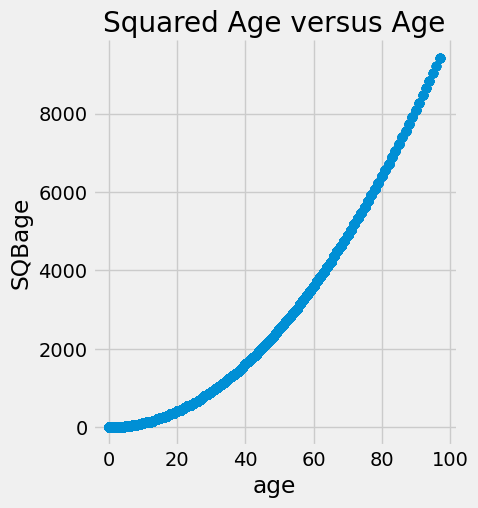

In [41]:
sns.lmplot(x='age', y='SQBage', data=data, fit_reg=False)
plt.title('Squared Age versus Age')

- 이 변수들은 상관관계가 매우 높기 때문에 데이터에 둘 다 저장할 필요가 없습니다.

In [42]:
data = data.drop(columns = sqr_)
data.shape

(33413, 136)

###Id Variables
- 이것들은 매우 간단합니다. 우리가 신원 확인을 위해 필요하기 때문에 데이터에 그대로 보관될 것입니다.

###Household Level Variables
- 먼저 가구주에 대한 부분 집합을 만든 다음 가구 수준 변수에 대한 부분 집합을 작성합니다

In [43]:
heads = data.loc[data['parentesco1'] == 1, :]
heads = heads[id_ + hh_bool + hh_cont + hh_ordered]
heads.shape

(10307, 99)

- 대부분의 가구 수준 변수의 경우 단순히 그대로 유지할 수 있습니다. 각 가구에 대해 예측을 수행하기 때문에 이러한 변수를 특징으로 사용합니다. 그러나 일부 중복 변수를 제거하고 기존 데이터에서 파생된 기능을 추가할 수도 있습니다.

#### Redundant Household Vaiables
- 모든 가구 변수 간의 상관관계를 살펴보겠습니다. 상관 관계가 너무 높은 변수가 있으면 상관 관계가 높은 변수 쌍 중 하나를 제거할 수 있습니다.

- 다음 코드는 절대 크기 상관 관계가 0.95보다 큰 변수를 식별합니다.

In [44]:
corr_matrix = heads.corr()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

to_drop = [column for column in upper.columns if any(abs(upper[column]) > 0.95)]

to_drop

<ipython-input-44-94f4eabe3765>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = heads.corr()
<ipython-input-44-94f4eabe3765>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


['coopele', 'area2', 'tamhog', 'hhsize', 'hogar_total']

- 이것들은 상관 변수의 각 쌍 중 하나를 보여줍니다. 다른 쌍을 찾기 위해 corr_matrix의 부분 집합을 찾을 수 있습니다.

In [45]:
corr_matrix.loc[corr_matrix['tamhog'].abs() > 0.9, corr_matrix['tamhog'].abs() > 0.9]

r4t3    tamhog    tamviv    hhsize  hogar_total
r4t3         1.000000  0.998287  0.910457  0.998287     0.998287
tamhog       0.998287  1.000000  0.909155  1.000000     1.000000
tamviv       0.910457  0.909155  1.000000  0.909155     0.909155
hhsize       0.998287  1.000000  0.909155  1.000000     1.000000
hogar_total  0.998287  1.000000  0.909155  1.000000     1.000000

<Axes: >

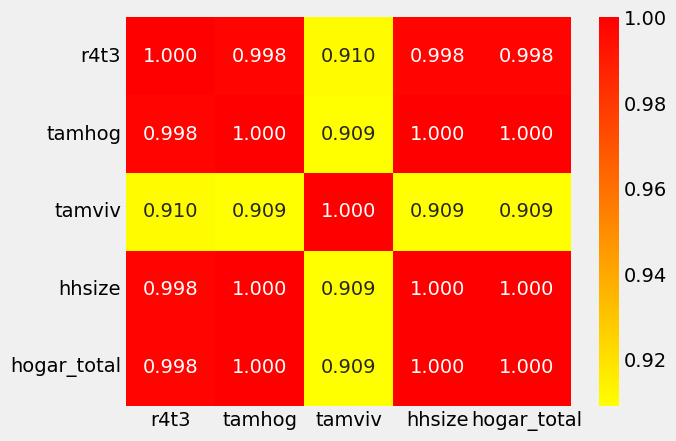

In [46]:
sns.heatmap(corr_matrix.loc[corr_matrix['tamhog'].abs() > 0.9, corr_matrix['tamhog'].abs() > 0.9],
            annot = True, cmap = plt.cm.autumn_r, fmt = '.3f')

- 여기에는 집의 크기와 관련된 몇 가지 변수가 있습니다:

  - r4t3, 가구 내 총 인원
  - tamhog, 가구 크기
  - tamviv, 가구에 사는 사람들의 수
  - hhsize, 가구 크기
  - hogar_total, 가구 내 총 개인 수


- 이 변수들은 모두 서로 높은 상관 관계가 있습니다. 사실, hhsize는 tamhog 및 hogar_total과 완벽한 상관관계가 있습니다. 정보가 중복되므로 이 두 변수를 제거합니다. 또한 r4t3는 hh 크기와 거의 완벽한 상관관계를 가지고 있기 때문에 제거할 수 있습니다.

- 가정에 살지 않는 가족 구성원이 있을 수 있기 때문에 tamviv가 반드시 hh 사이즈와 같지는 않습니다. 산점도에서 이 차이를 시각화해 보겠습니다.

In [47]:
heads = heads.drop(columns = ['tamhog', 'hogar_total', 'r4t3'])

Text(0.5, 1.0, 'Household size vs number of persons living in the household')

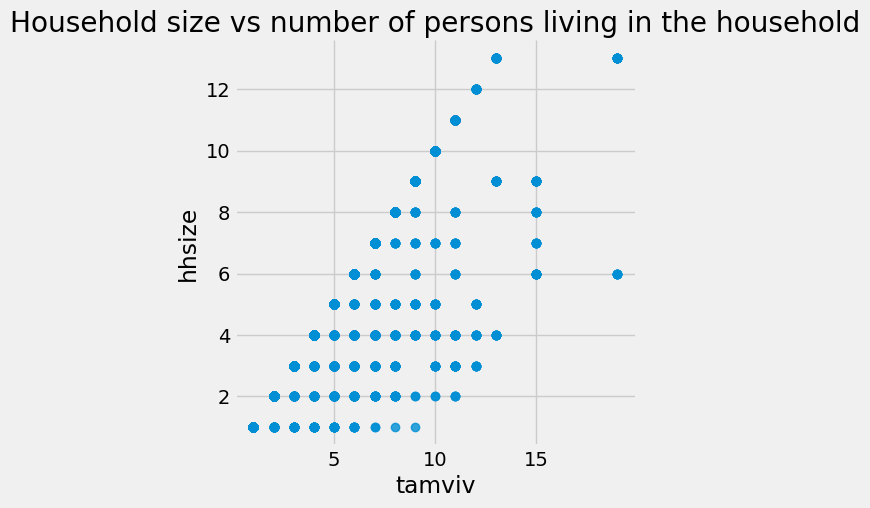

In [48]:
sns.lmplot(x='tamviv', y='hhsize', data=data, fit_reg=False)
plt.title('Household size vs number of persons living in the household')

- 우리는 많은 경우를 볼 수 있습니다. 가족보다 가구에 더 많은 사람들이 살고 있습니다. 이것은 우리에게 새로운 특징에 대한 좋은 아이디어를 줍니다: 이 두 측정 사이의 차이!

- 이 새로운 기능을 만들어 보겠습니다.

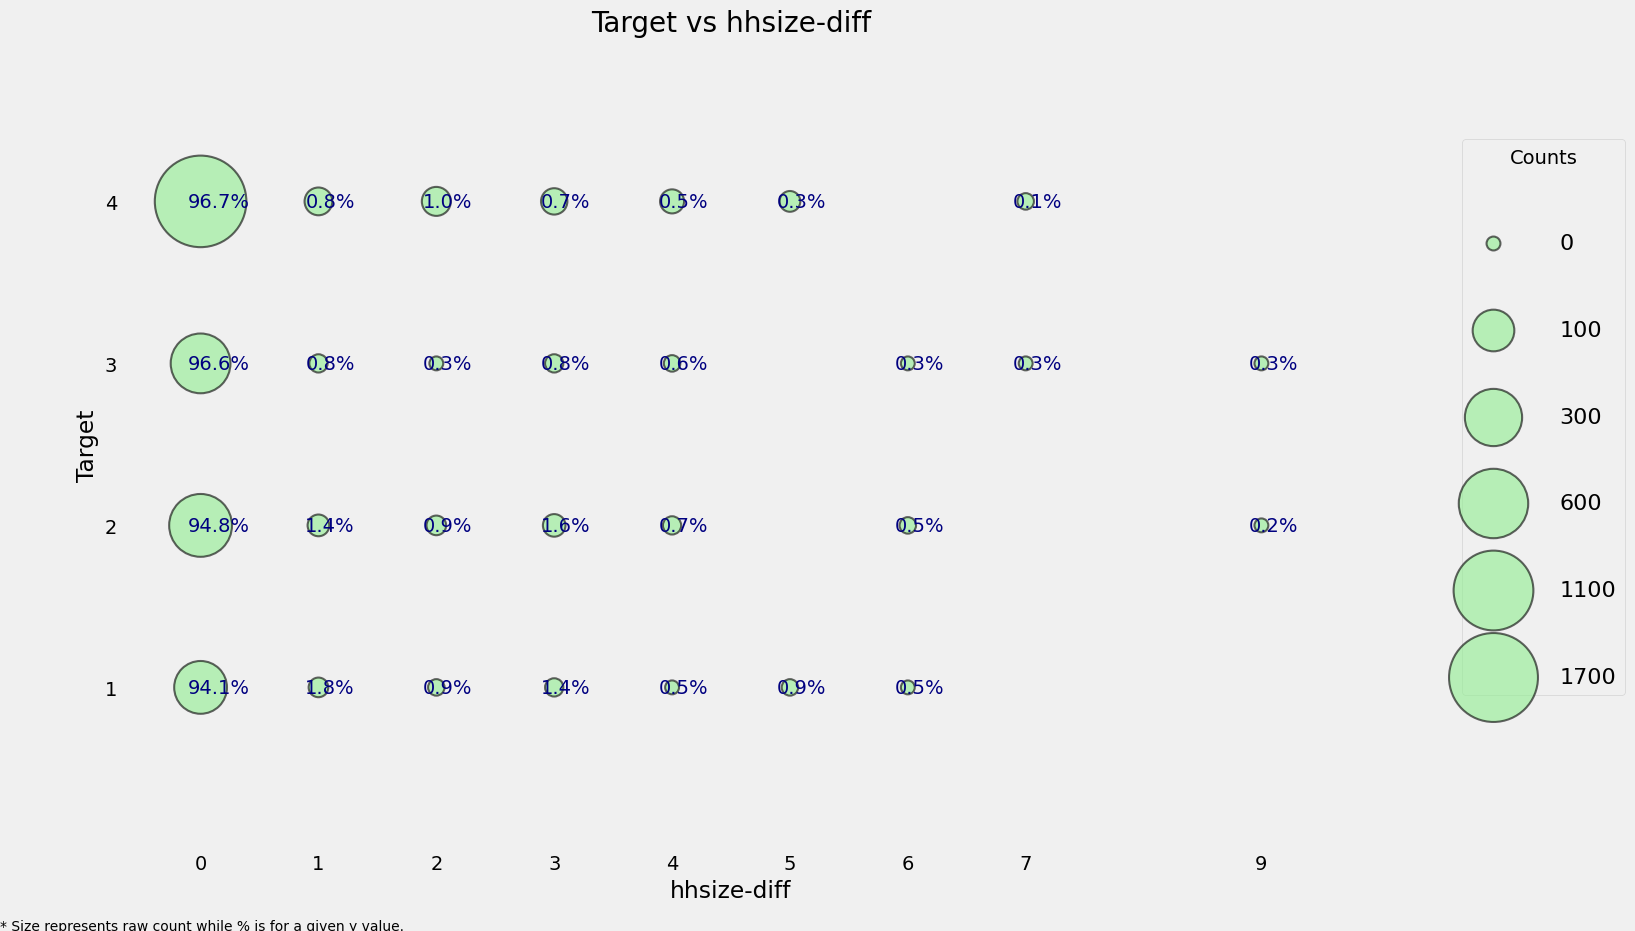

In [49]:
heads['hhsize-diff'] = heads['tamviv'] - heads['hhsize']
plot_categoricals('hhsize-diff', 'Target', heads)

- 대부분의 가구는 차이가 없지만 가구원보다 가구원이 더 많은 가구가 있습니다.

- 다른 중복 변수로 넘어가 보겠습니다. 먼저 우리는 쿠플을 볼 수 있습니다

In [50]:
corr_matrix.loc[corr_matrix['coopele'].abs() > 0.9, corr_matrix['coopele'].abs() > 0.9]

public   coopele
public   1.000000 -0.967759
coopele -0.967759  1.000000

- 이 변수들은 가정의 전기가 어디에서 오는지를 나타냅니다. 네 가지 옵션이 있는데, 이 두 가지 옵션 중 하나가 없는 가정은 전기가 없거나(전기 없음) 개인 발전소에서 공급받습니다(플랜프리).

#### Creating Ordinal Variable

- 저는 이 네 가지 변수를 순서형 변수를 만들어서 하나로 압축하려고 합니다. 데이터 설명을 기반으로 매핑을 직접 선택합니다:

  - 0: 전기 없음
  - 1: 협동조합의 전기
  - 2: CNFL, ICA, ESPH/JASEC에서 공급되는 전기
  - 3: 개인 발전소의 전기

- 정렬된 변수에는 고유한 순서가 있으며, 이를 위해 도메인 지식을 기반으로 자체를 선택합니다. 이 새 주문 변수를 만든 후에 나머지 4개를 삭제할 수 있습니다. 여기에는 변수가 없는 가구가 여러 개 있으므로 난(귀속 중에 입력됨)을 사용하고 이 변수에 대한 측정값이 없음을 나타내는 부울 열을 추가합니다.

In [51]:
elec = []

for i, row in heads.iterrows():
  if row['noelec'] == 1:
    elec.append(0)
  elif row['coopele'] == 1:
    elec.append(1)
  elif row['public'] == 1:
    elec.append(2)
  elif row['planpri'] == 1:
    elec.append(3)
  else:
    elec.append(np.nan)

heads['elec'] = elec
heads['elec-missing'] = heads['elec'].isnull()

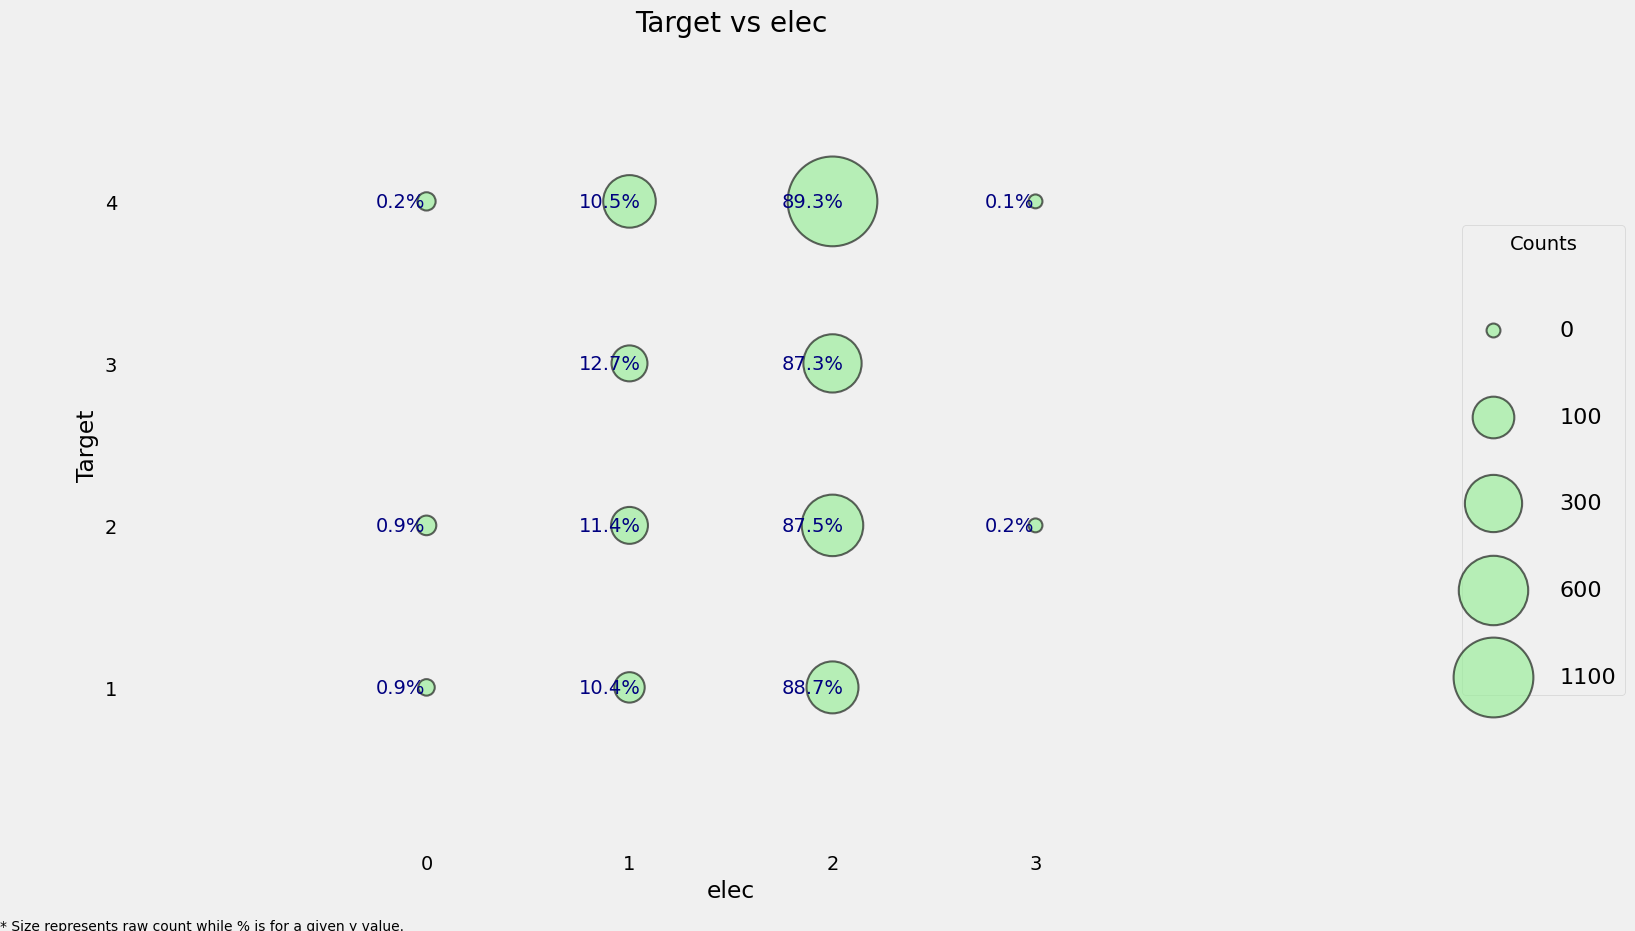

In [52]:
plot_categoricals('elec', 'Target', heads)

- 목표값의 모든 값에 대해 가장 일반적인 전기 공급원이 나열된 공급업체 중 하나임을 알 수 있습니다.

- 최종 중복 열은 영역 2입니다. 이것은 그 집이 시골 지역에 있다는 것을 의미하지만, 우리는 그 집이 도시 지역에 있는지를 나타내는 열이 있기 때문에 중복됩니다. 따라서 이 열을 삭제할 수 있습니다.

In [53]:
heads = heads.drop(columns = 'area2')
heads.groupby('area1')['Target'].value_counts(normalize = True)

area1  Target
0      4.0       0.582249
       2.0       0.176331
       3.0       0.147929
       1.0       0.093491
1      4.0       0.687030
       2.0       0.137688
       3.0       0.108083
       1.0       0.067199
Name: Target, dtype: float64

- 도시 지역의 가구(값 1)는 농촌 지역의 가구(값 0)보다 빈곤 수준이 낮을 가능성이 더 높은 것으로 보입니다.

####Creating Ordinal Variables

- 집의 벽, 지붕, 바닥에는 각각 세 개의 기둥이 있습니다: 첫 번째 기둥은 '나쁘다', 두 번째 기둥은 '정규', 세 번째 기둥은 '좋다'입니다. 우리는 변수들을 부울로 남길 수 있지만, 저에게는 그것들을 순서형 변수로 바꾸는 것이 더 이치에 맞습니다: 나쁜 < 규칙적인 < 선이 있기 때문입니다. 이를 위해 np.argmax를 사용하여 각 가구에 대해 0이 아닌 열을 쉽게 찾을 수 있습니다.

- 순서형 변수를 만든 후에는 원래 변수를 삭제할 수 있습니다.

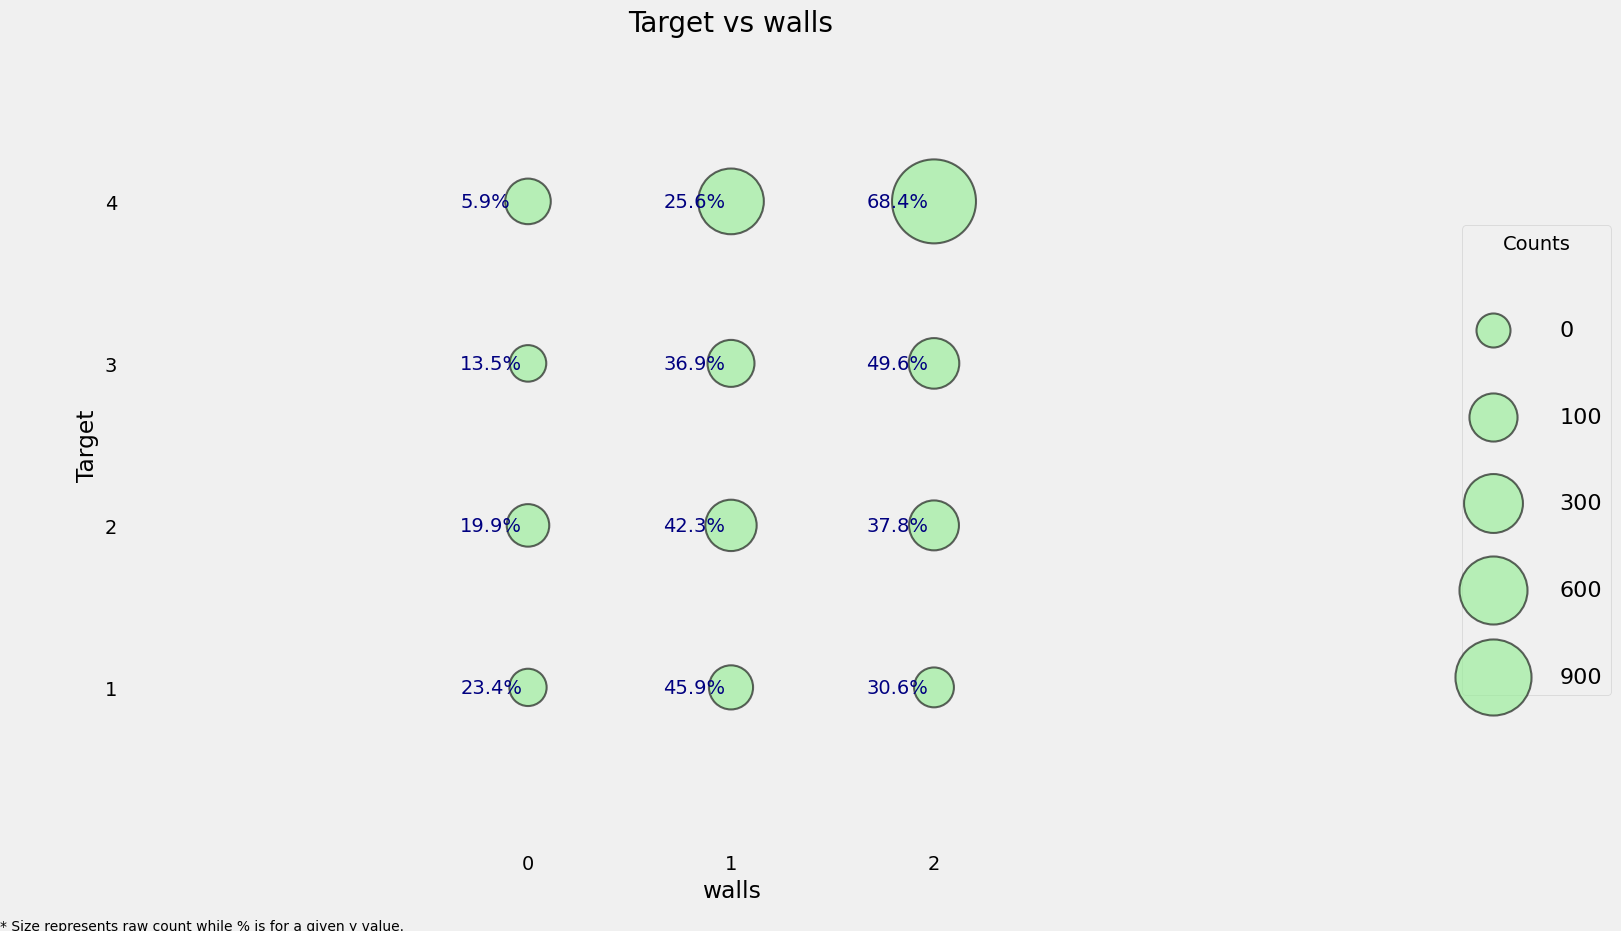

In [54]:
heads['walls'] = np.argmax(np.array(heads[['epared1','epared2','epared3']]), axis=1)
plot_categoricals('walls', 'Target', heads)

In [55]:
heads['roof'] = np.argmax(np.array(heads[['etecho1', 'etecho2', 'etecho3']]),axis = 1)

heads = heads.drop(columns = ['etecho1', 'etecho2','etecho3'])
heads['floor'] = np.argmax(np.array(heads[['eviv1', 'eviv2', 'eviv3']]), axis=1)

#Feature Construction
 
 - 변수를 순서형 피쳐에 매핑하는 것 외에도 피쳐 구성이라고 하는 기존 데이터에서 완전히 새로운 피쳐를 생성할 수도 있습니다. 예를 들어, 방금 작성한 이전의 세 가지 특징을 합산하여 집 구조의 전반적인 품질을 측정할 수 있습니다.

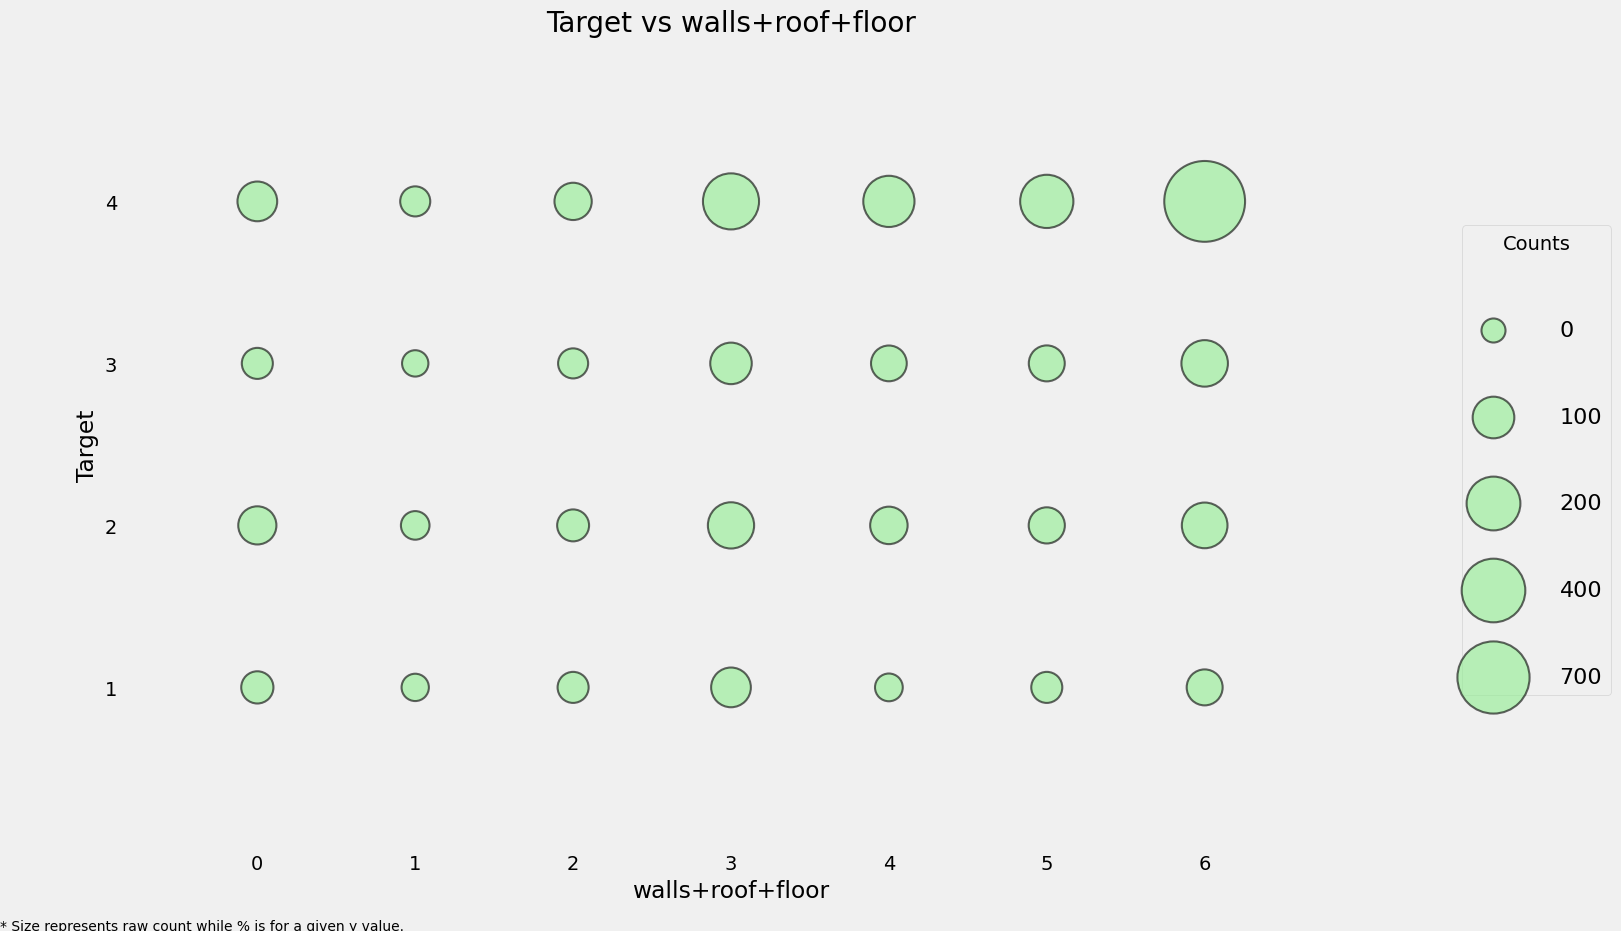

In [56]:
heads['walls+roof+floor'] = heads['walls'] + heads['roof'] + heads['floor']

plot_categoricals('walls+roof+floor', 'Target', heads, annotate = False)

- 이 새로운 기능은 목표값 4(최저 빈곤 수준)가 '집의 질' 변수의 값이 더 높은 경향이 있는 것처럼 보이기 때문에 유용할 수 있습니다. 우리는 또한 이것을 표에서 자세히 볼 수 있습니다.

In [57]:
counts = pd.DataFrame(heads.groupby(
    ['walls+roof+floor'])['Target'].value_counts(normalize = True)
    ).rename(columns = {'Target': 'Normalized Count'}).reset_index()
counts.head()

walls+roof+floor  Target  Normalized Count
0                 0     4.0          0.376404
1                 0     2.0          0.320225
2                 0     1.0          0.162921
3                 0     3.0          0.140449
4                 1     4.0          0.323529

- 다음 변수는 집의 질에 대한 경고입니다. 화장실, 전기, 바닥, 수도, 천장이 없는 경우 각각 -1점의 마이너스 값이 될 것입니다.

In [58]:
heads['warning'] = 1*(heads['sanitario1']+ (heads['elec'] == 0)+
                      heads['pisonotiene']+ heads['abastaguano']+ (heads['cielorazo']==0))

- 우리는 이러한 관계를 시각화하기 위해 우리의 plot_categoricals 함수를 계속 사용할 수 있지만, Seaborn에는 범주형과 함께 작동할 수 있는 많은 플롯 옵션도 있습니다. 하나는 y축의 변수 분포와 각 그래프의 너비를 보여주는 바이올린 플롯으로 해당 범주의 관측치 수를 나타냅니다.

Text(0.5, 1.0, 'Target vs Warning Variable')

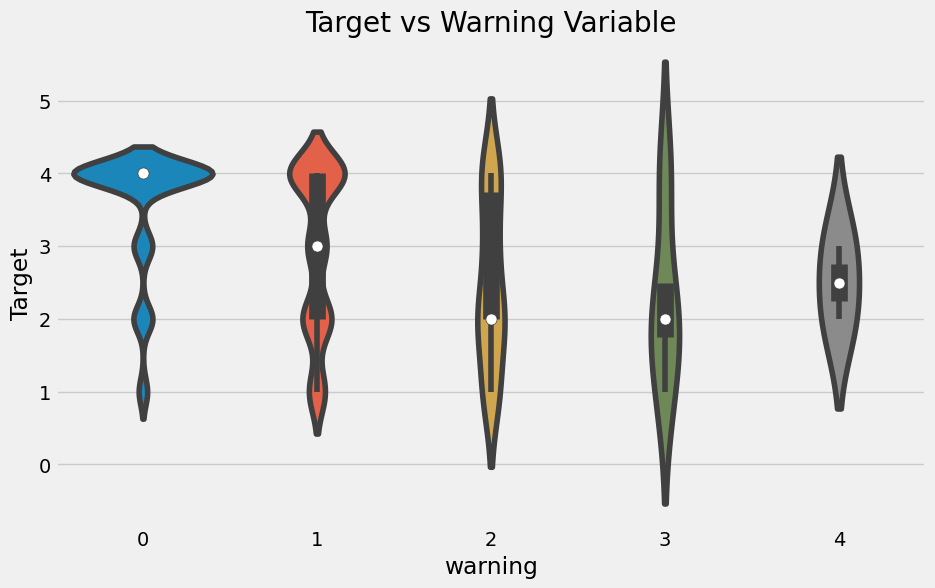

In [59]:
plt.figure(figsize = (10,6))
sns.violinplot(x = 'warning', y = 'Target', data = heads)
plt.title('Target vs Warning Variable')

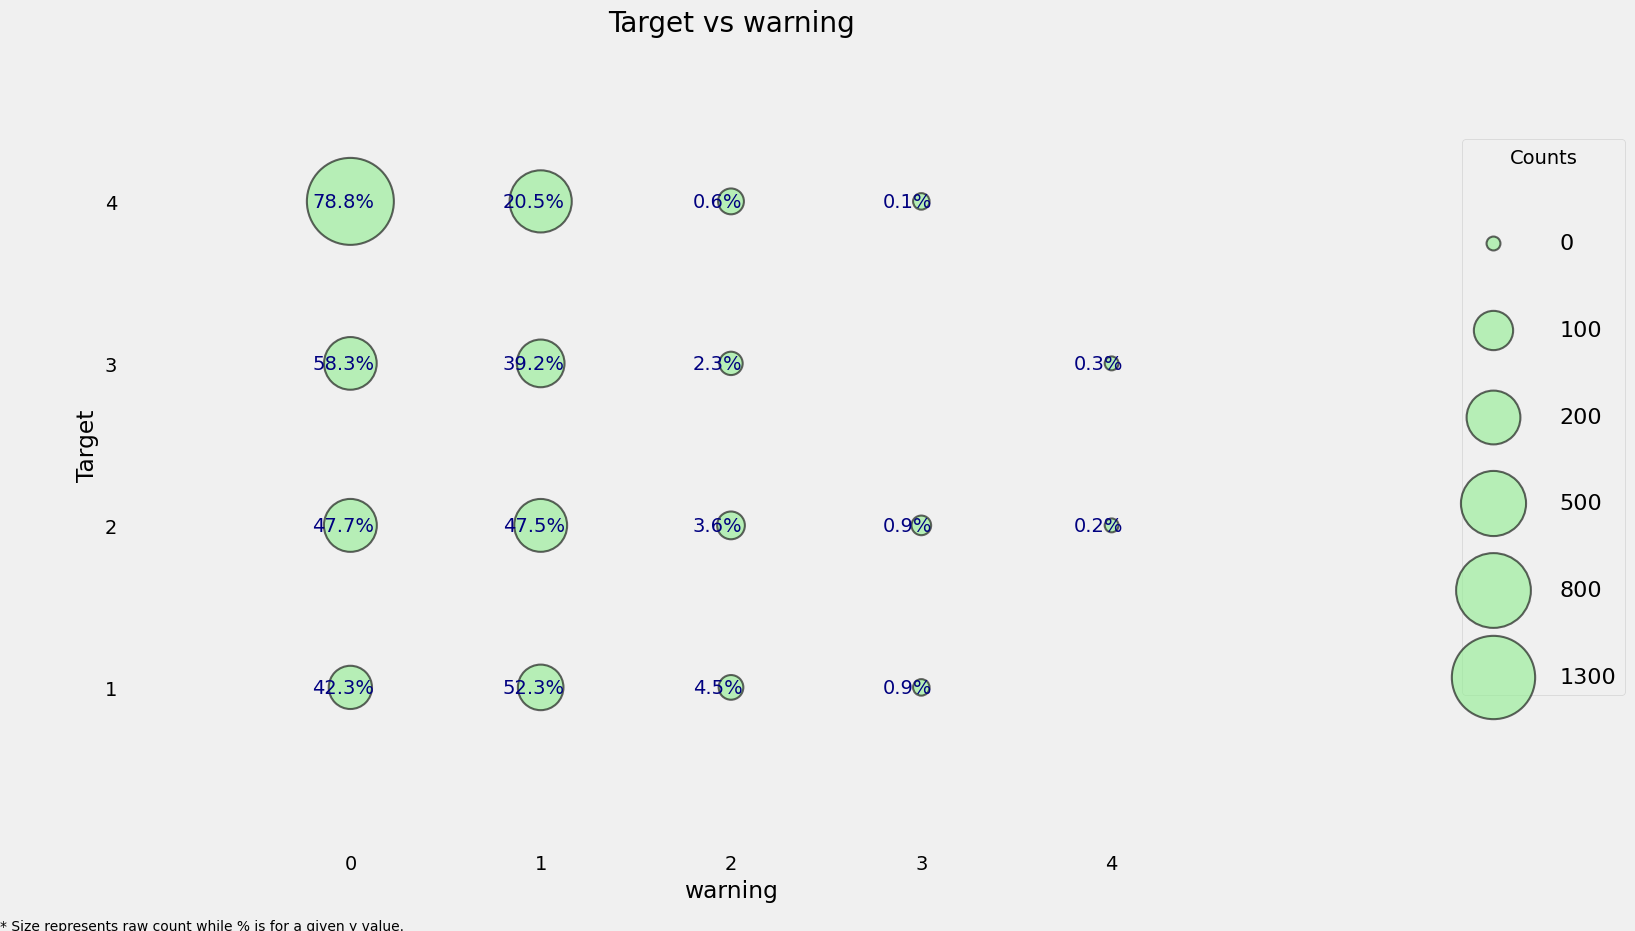

In [60]:
plot_categoricals('warning', 'Target', data = heads)

- 바이올린 플롯은 대상이 실제보다 더 작고 더 큰 값을 가질 수 있는 것처럼 보이는 효과로 범주형 변수를 매끄럽게 하기 때문에 여기서는 훌륭하지 않습니다. 그럼에도 불구하고, 우리는 경고 신호가 없고 빈곤 수준이 가장 낮은 가구들의 높은 집중을 볼 수 있습니다. 이것이 유용한 기능인 것처럼 보이지만, 우리가 모델링에 도달하기 전까지는 확실하게 알 수 없습니다!

- 현재 우리가 만들 수 있는 마지막 가정용 기능은 냉장고, 컴퓨터, 태블릿 또는 텔레비전을 가진 가족에게 점수를 주는 보너스입니다.

Text(0.5, 1.0, 'Target vs Bonus Variable')

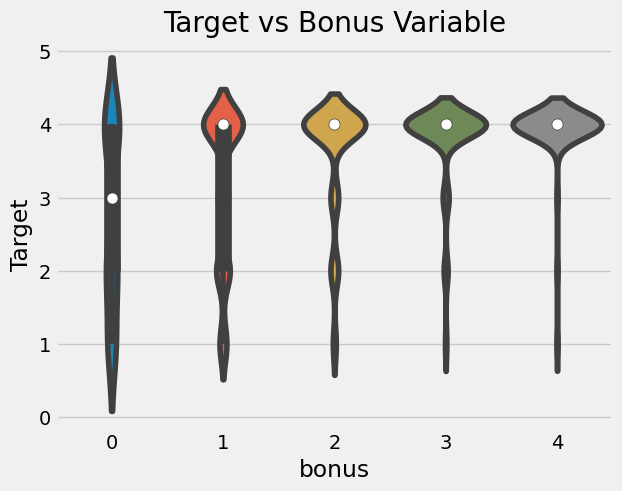

In [61]:
heads['bonus'] = 1*(heads['refrig'] + heads['computer'] +
                    (heads['v18q1'] > 0) + heads['television'])
sns.violinplot(x='bonus', y='Target', data=heads, figsize = (10, 6))
plt.title('Target vs Bonus Variable')

##Per Capita Features
- 추가 기능을 통해 가구원별로 특정 측정값의 수를 계산할 수 있습니다.

In [62]:
heads['phones-per-capita'] = heads['qmobilephone'] / heads['tamviv']
heads['tablets-per-capita'] = heads['v18q1'] / heads['tamviv']
heads['rooms-per-capita'] = heads['rooms'] / heads['tamviv']
heads['rent-per-capita'] = heads['v2a1'] / heads['tamviv']

##Exploring Household Variables
- 기능을 정리하는 데 많은 어려움을 겪은 후 이제 대상과 관련하여 기능을 살펴볼 수 있습니다. 우리는 이미 이것을 조금 했지만, 이제 우리는 관계를 정량화하려고 시도할 수 있습니다.


### Measuring Relationships

- 두 변수 사이의 관계를 측정하는 데는 여러 가지 방법이 있습니다. 여기서는 이 중 두 가지를 살펴보겠습니다:

  - Pearson 상관: -1부터 1까지 두 변수 사이의 선형 관계 측정
  - Spearman 상관 관계: -1에서 1까지 두 변수 사이의 단조로운 관계를 측정합니다

- Spearman 상관 관계는 한 변수가 증가함에 따라 관계가 선형적이지 않더라도 다른 변수도 증가하는 경우 1입니다. 반면에 Pearson 상관 관계는 증가가 정확하게 선형인 경우에만 하나가 될 수 있습니다. 이것들은 예를 들어 가장 잘 설명되어 있습니다.

In [63]:
from scipy.stats import spearmanr

In [64]:
def plot_corrs(x,y):
  spr = spearmanr(x,y).correlation
  pcr = np.corrcoef(x,y)[0,1]
  data = pd.DataFrame({'x': x, 'y':y})
  plt.figure(figsize = (6,4))
  sns.regplot(x='x', y='y', data= data, fit_reg = False)
  plt.title(f'Spearman: {round(spr, 2)}; Pearson: {round(pcr, 2)}')


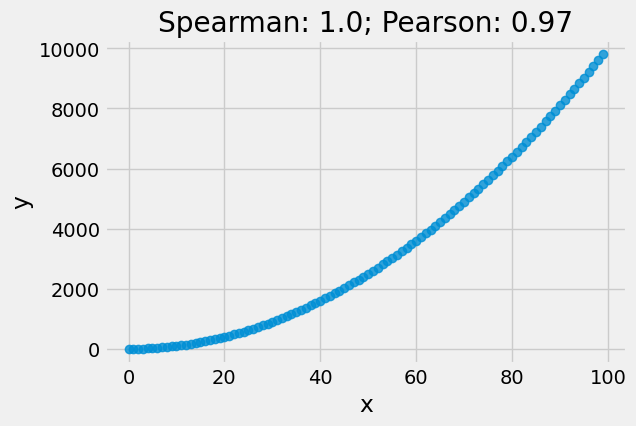

In [65]:
x = np.array(range(100))
y = x**2
plot_corrs(x,y)

- Spearman 상관 관계는 종종 대상 또는 교육 연도와 같은 순서형 변수에 대해 더 나은 것으로 간주됩니다. 실제 환경에서 대부분의 관계는 선형적이지 않으며 Pearson 상관 관계는 두 변수가 얼마나 관련되어 있는지에 대한 근사치일 수 있지만, 이는 정확하지 않고 가장 좋은 비교 방법이 아닙니다.

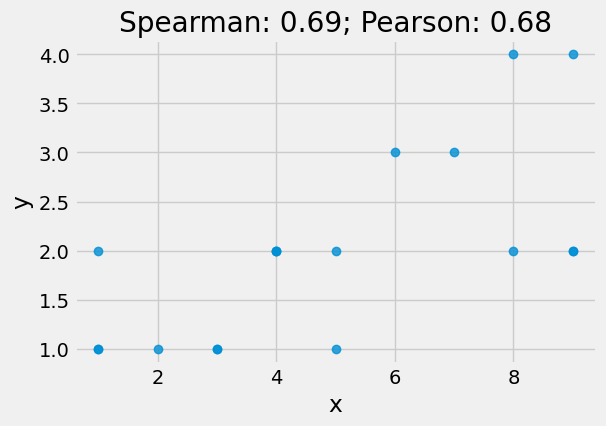

In [66]:
x = np.array([1, 1, 1, 2, 3, 3, 4, 4, 4, 5, 5, 6, 7, 8, 8, 9, 9, 9])
y = np.array([1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 3, 3, 2, 4, 2, 2, 4])

plot_corrs(x, y)

- 대부분의 경우 값이 매우 유사합니다.

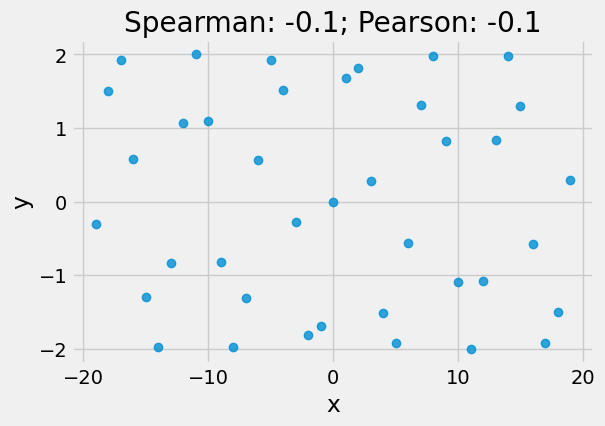

In [67]:
x = np.array(range(-19, 20))
y = 2*np.sin(x)

plot_corrs(x,y)

- 먼저 모든 변수와 대상의 Pearson 상관 관계를 계산합니다.

In [68]:
train_heads = heads.loc[heads['Target'].notnull(), :].copy()

pcorrs = pd.DataFrame(train_heads.corr()['Target'].sort_values()).rename(
    columns = {'Target': 'pcorr'}).reset_index()

pcorrs = pcorrs.rename(columns = {'index': 'feature'})

print('Most negatively correlated variables:')
print(pcorrs.head())

print('\nMost positively correlated variables:')
print(pcorrs.dropna().tail())

Most negatively correlated variables:
        feature     pcorr
0       warning -0.301791
1     hogar_nin -0.266309
2          r4t1 -0.260917
3  overcrowding -0.234954
4         eviv1 -0.217908

Most positively correlated variables:
               feature     pcorr
97   phones-per-capita  0.299026
98               floor  0.307605
99    walls+roof+floor  0.332446
100           meaneduc  0.333652
101             Target  1.000000


<ipython-input-68-63e9710c5fbc>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  pcorrs = pd.DataFrame(train_heads.corr()['Target'].sort_values()).rename(


- 음의 상관 관계의 경우 변수를 늘리면 목표값이 감소하여 빈곤 심각도가 증가함을 나타냅니다. 따라서, 경고가 증가함에 따라, 빈곤 수준도 증가하는데, 이것은 집에 대한 잠재적인 나쁜 징후를 보여주기 위한 것이었기 때문에 이치에 맞습니다. hogar_nin은 가족 내 0~19명의 아이들의 수이며, 더 어린 아이들은 더 높은 수준의 빈곤으로 이어지는 가족에게 스트레스의 재정적인 원인이 될 수 있습니다. 아니면, 사회 경제적 지위가 낮은 가정들은 그들 중 한 명이 성공할 수 있기를 바라는 마음으로 더 많은 아이들을 낳습니다. 설명이 어떻든 간에, 가족의 크기와 가난 사이에는 진정한 연관성이 있습니다

- 반면, 양의 상관관계의 경우, 값이 높을수록 빈곤 심각도가 감소함을 나타내는 목표값이 높다는 것을 의미합니다. 가장 연관성이 높은 가구 수준 변수는 가구 내 성인의 평균 교육 수준인 평균 교육입니다. 교육과 빈곤 사이의 이러한 관계는 직관적으로 의미가 있습니다. 교육 수준이 높을수록 일반적으로 빈곤 수준이 낮은 것과 관련이 있습니다. 우리는 어떤 것이 어떤 원인인지 반드시 알 수는 없지만, 이것들이 같은 방향으로 움직이는 경향이 있다는 것은 알고 있습니다.

- 상관 관계 값에 대한 일반적인 지침은 다음과 같습니다. 그러나 이러한 지침은 사용자가 질문하는 대상(해당 출처)에 따라 달라집니다:

  - .00-.19 "매우 약함"
  - .20-.39 "약함"
  - .40-.59 "표준"
  - .60-.79 "강력"
  - .80-1.0 "매우 강한"

- 이러한 상관 관계를 통해 알 수 있는 것은 모델이 기능에서 대상으로의 매핑을 학습하는 데 사용할 수 있는 약한 관계가 있다는 것입니다.

- 이제 Spearman 상관관계로 넘어가겠습니다.

In [69]:
import warnings
warnings.filterwarnings('ignore', category = RuntimeWarning)

feats = []
scorr = []
pvalues =[]

for c in heads:
  if heads[c].dtype != 'object':
    feats.append(c)
    scorr.append(spearmanr(train_heads[c], train_heads['Target']).correlation)
    pvalues.append(spearmanr(train_heads[c], train_heads['Target']).pvalue)

scorrs = pd.DataFrame({'feature': feats, 'scorr': scorr, 'pvalue': pvalues}).sort_values('scorr')

- Spearman 상관 계수 계산에는 관계의 유의 수준을 나타내는 p 값도 함께 제공됩니다. 일반적으로 0.05보다 작은 p 값은 유의한 것으로 간주되지만, 다중 비교를 수행하기 때문에 p-값을 비교 횟수로 나누고자 합니다. 이를 본페로니 보정이라고 합니다.

In [70]:
print('Most negative Spearman correlations:', scorrs.head())
print('\nMost positive Spearman correlations:', scorrs.dropna().tail())

Most negative Spearman correlations:        feature     scorr        pvalue
97     warning -0.307326  4.682829e-66
68  dependency -0.281516  2.792620e-55
85   hogar_nin -0.236225  5.567218e-39
80        r4t1 -0.219226  1.112230e-33
49       eviv1 -0.217803  2.952571e-33

Most positive Spearman correlations:               feature     scorr        pvalue
23          cielorazo  0.300996  2.611808e-63
95              floor  0.309638  4.466091e-67
99  phones-per-capita  0.337377  4.760104e-80
96   walls+roof+floor  0.338791  9.539346e-81
0              Target  1.000000  0.000000e+00


- 대부분의 경우 상관 관계를 계산하는 두 가지 방법이 일치합니다. 단지 호기심에서, 우리는 가장 멀리 떨어져 있는 가치들을 찾을 수 있습니다.

In [71]:
corrs = pcorrs.merge(scorrs, on = 'feature')
corrs['diff'] = corrs['pcorr'] - corrs['scorr']
corrs.sort_values('diff').head()

feature     pcorr     scorr        pvalue      diff
77    rooms-per-capita  0.152185  0.223303  6.521453e-35 -0.071119
85               v18q1  0.197493  0.244200  1.282664e-41 -0.046708
87  tablets-per-capita  0.204638  0.248642  3.951568e-43 -0.044004
2                 r4t1 -0.260917 -0.219226  1.112230e-33 -0.041691
97   phones-per-capita  0.299026  0.337377  4.760104e-80 -0.038351

In [72]:
corrs.sort_values('diff').dropna().tail()

feature     pcorr     scorr        pvalue      diff
57    techozinc  0.014357  0.003404  8.528369e-01  0.010954
49  hogar_mayor -0.025173 -0.041722  2.290994e-02  0.016549
88       edjefe  0.235687  0.214736  2.367521e-32  0.020951
66       edjefa  0.052310  0.005114  7.804715e-01  0.047197
17   dependency -0.126465 -0.281516  2.792620e-55  0.155051

- 상관 관계의 가장 큰 차이는 의존성입니다. 대상 대 종속성의 산점도를 만들어 관계를 시각화할 수 있습니다. 둘 다 이산 변수이기 때문에 그래프에 약간의 지터를 추가합니다.

Text(0.5, 1.0, 'Target vs Dependency')

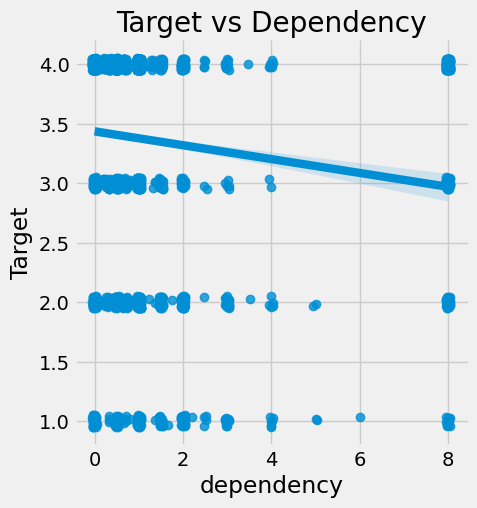

In [73]:
sns.lmplot(x= 'dependency', y='Target', fit_reg = True, data = train_heads, x_jitter=0.05, y_jitter=0.05)
plt.title('Target vs Dependency')

- 관계를 보기는 어렵지만 약간 부정적입니다. 의존성이 증가할수록 대상의 값은 감소합니다. 즉, 종속성은 종속된 개인의 수를 종속되지 않은 개인의 수로 나눈 것입니다. 우리가 이 가치를 증가시킬수록 빈곤의 심각성은 증가하는 경향이 있습니다. 의존적인 가족 구성원(일반적으로 일을 하지 않는 가족 구성원)이 더 많으면 비의존적인 가족 구성원의 지원을 받아야 하기 때문에 더 높은 수준의 빈곤으로 이어집니다.

Text(0.5, 1.0, 'Target vs Rooms Per Capita')

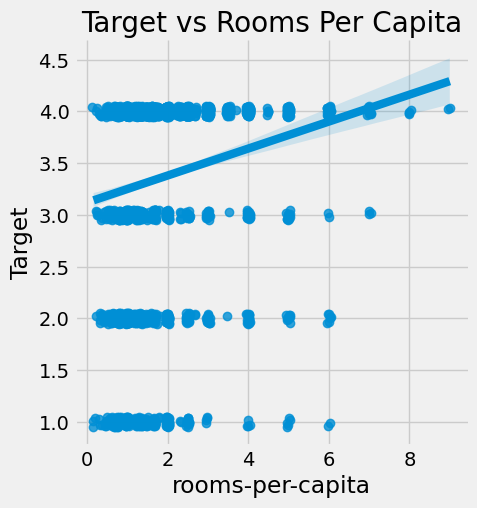

In [74]:
sns.lmplot(x='rooms-per-capita', y='Target', fit_reg = True, data=train_heads, x_jitter=0.05, y_jitter=0.05)
plt.title('Target vs Rooms Per Capita')

### Correlation Heatmap

제가 가장 좋아하는 그림 중 하나는 상관관계 열 지도입니다. 왜냐하면 하나의 이미지에 수많은 정보가 표시되기 때문입니다. 열 지도의 경우 7개의 변수를 선택하여 자신과 대상 사이의 상관 관계를 보여줍니다.

<Axes: >

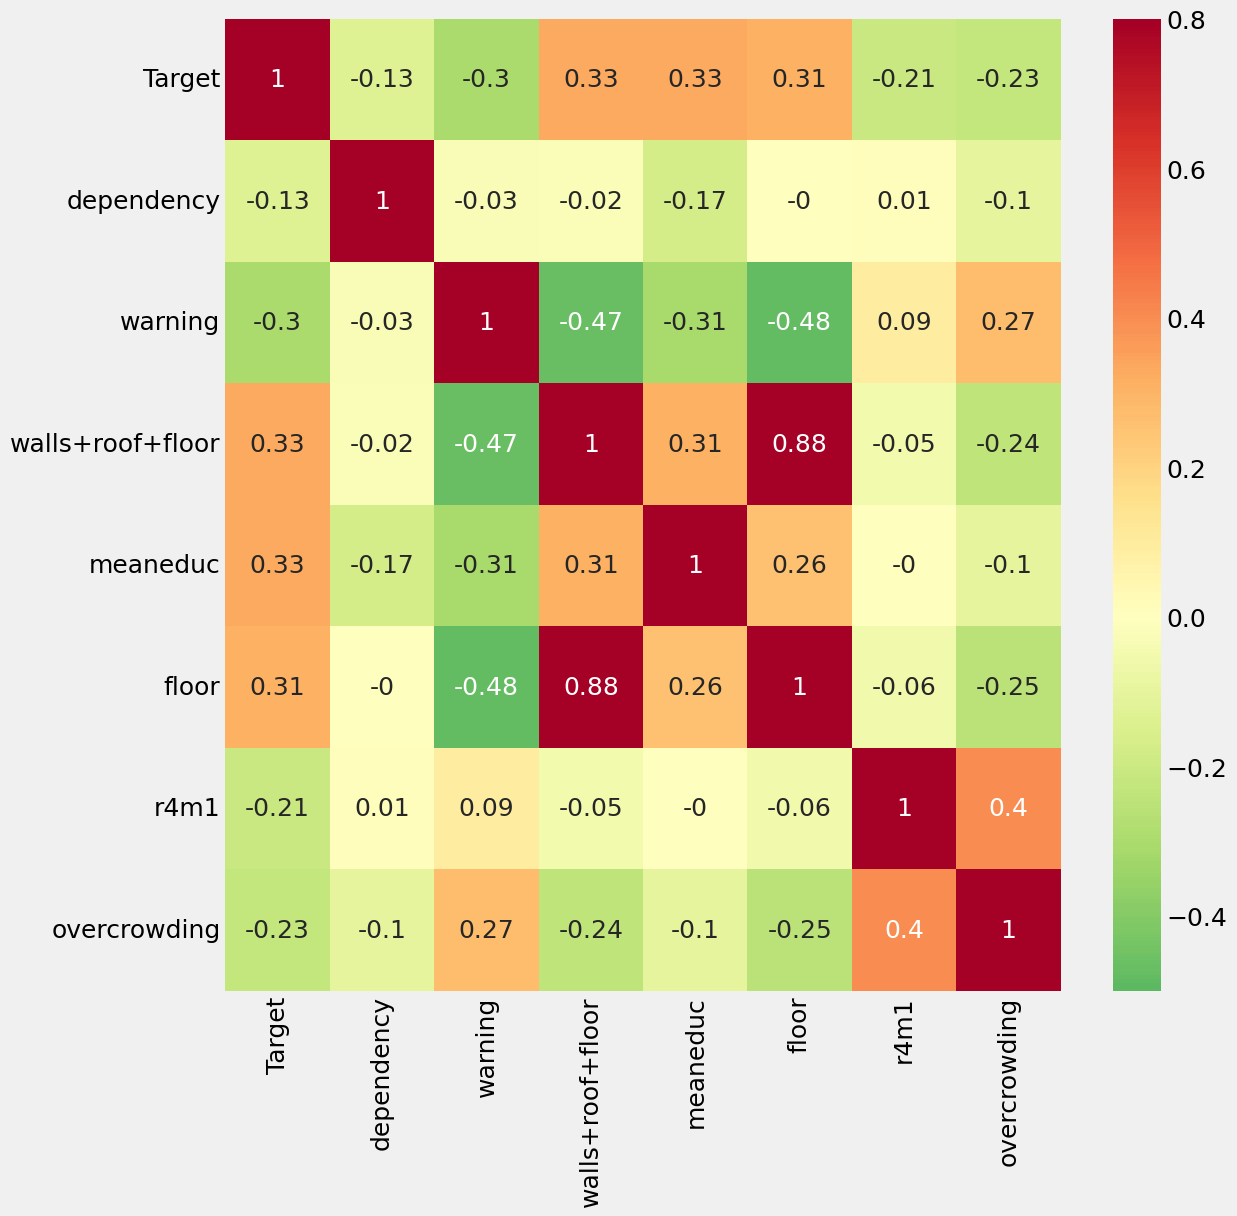

In [75]:
variables = ['Target', 'dependency', 'warning', 'walls+roof+floor', 'meaneduc', 'floor', 'r4m1', 'overcrowding']
corr_mat = train_heads[variables].corr().round(2)
plt.rcParams['font.size'] = 18
plt.figure(figsize= (12,12))
sns.heatmap(corr_mat, vmin=-0.5, vmax=0.8, center=0, cmap=plt.cm.RdYlGn_r, annot = True)

- 이 그림은 목표값과의 상관 관계가 약한 변수가 많다는 것을 보여줍니다. 또한 공선성으로 인해 문제가 발생할 수 있는 일부 변수(예: 바닥 및 벽+지붕+바닥) 간의 높은 상관 관계도 있습니다.



#### Features Plot
가구 수준 데이터의 최종 탐색을 위해 목표값과 가장 상관 관계가 높은 변수의 그림을 만들 수 있습니다. 위쪽 삼각형에는 산점도, 대각선에는 커널 밀도 추정치(kde) 그림, 아래쪽 삼각형에는 2D KDE 그림이 표시됩니다.

Text(0.5, 1.05, 'Feature Plots Colored By Target')

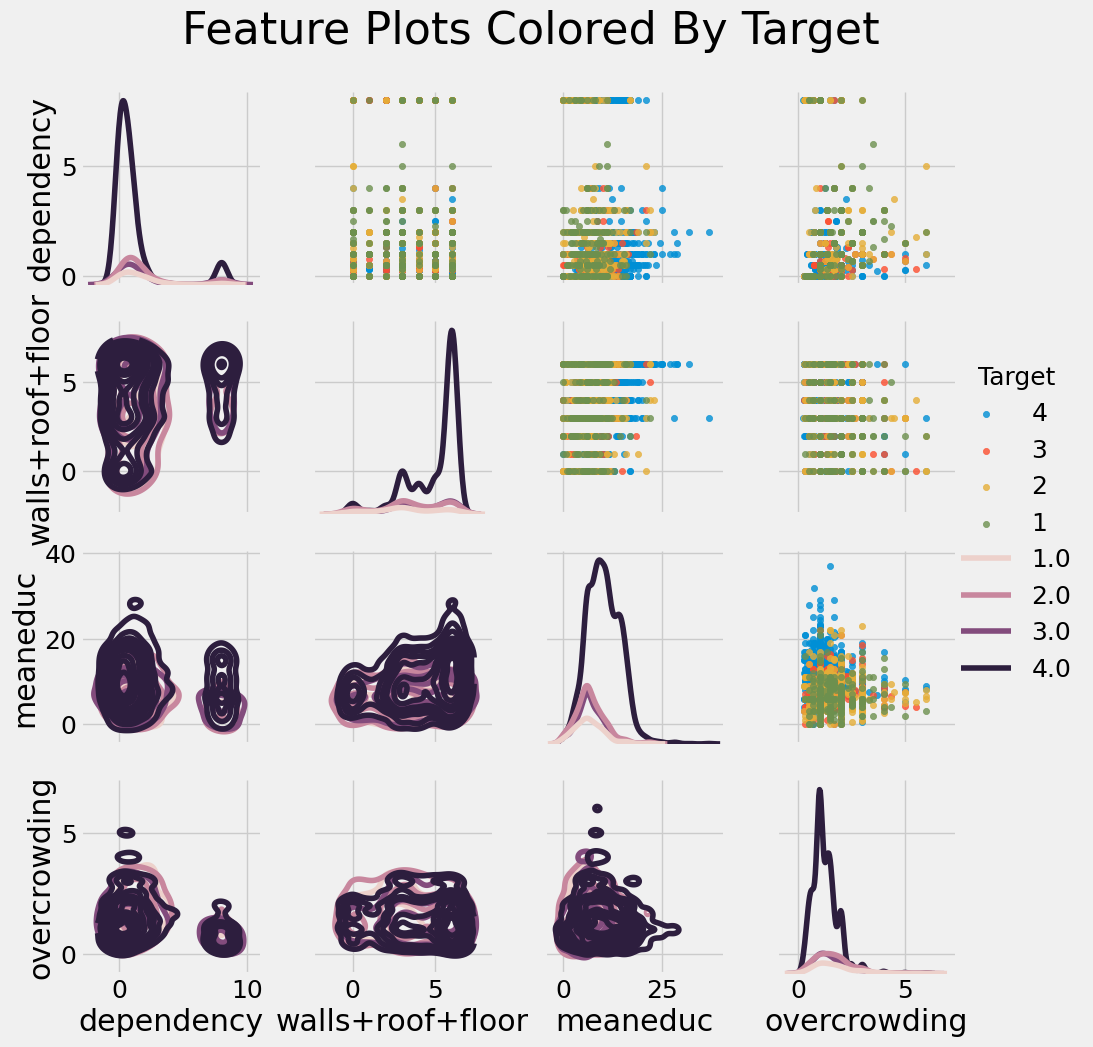

In [76]:
import warnings
warnings.filterwarnings('ignore')

plot_data =train_heads[['Target', 'dependency', 'walls+roof+floor', 'meaneduc', 'overcrowding']]

grid = sns.PairGrid(data = plot_data, diag_sharey=False,
                    hue = 'Target', hue_order = [4, 3, 2, 1], 
                    vars = [x for x in list(plot_data.columns) if x != 'Target'])

grid.map_upper(plt.scatter, alpha=0.8, s=20)
grid.map_diag(sns.kdeplot)
grid.map_lower(sns.kdeplot, cmap=plt.cm.OrRd_r)
grid = grid.add_legend()
plt.suptitle('Feature Plots Colored By Target', size = 32, y = 1.05)

- 지금은 가정 변수의 특징 엔지니어링을 마치겠습니다. 나중에 모델 성능이 마음에 들지 않으면 이 단계로 돌아갈 수 있습니다.

In [77]:
household_feats = list(heads.columns)

##Indicidual Level Variables
두 가지 유형의 개별 수준 변수가 있습니다: 부울(참 또는 거짓의 경우 1 또는 0) 및 서수(의미 있는 순서가 지정된 개별 값)


In [78]:
ind = data[id_ + ind_bool + ind_ordered]
ind.shape

(33413, 40)

###Redundant Individual Variables
- 가구 수준 변수를 사용하여 중복 개별 변수를 식별한 것과 동일한 프로세스를 수행할 수 있습니다. 상관 계수의 절대 크기가 0.95보다 큰 변수에 초점을 맞춥니다.


In [79]:
corr_matrix = ind.corr()

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(abs(upper[column]) > 0.95)]

to_drop

['female']

- 이것은 단순히 남성의 반대입니다! 남성 깃발을 제거할 수 있습니다

In [80]:
ind = ind.drop(columns = 'male')

###Creating Ordinal Variables

- 가구 수준 데이터를 사용한 것과 마찬가지로 기존 열을 순서형 변수에 매핑할 수 있습니다. 여기서는 instlevel_ 변수에 초점을 맞출 것입니다. 이 변수는 instlevel1: 교육 수준 없음에서 instlevel9: 대학원 교육까지 개인이 가지고 있는 교육의 양을 나타냅니다.

- 순서형 변수를 만들기 위해 각 개체에 대해 0이 아닌 열을 찾기만 하면 됩니다. 교육에는 고유한 순서가 있으므로(높을수록 좋습니다), 이 순서형 변수로의 변환은 문제 상황에서 의미가 있습니다.

In [81]:
ind[[c for c in ind if c.startswith('instl')]].head()

instlevel1  instlevel2  instlevel3  instlevel4  instlevel5  instlevel6  \
0           0           0           0           1           0           0   
1           0           0           0           0           0           0   
2           0           0           0           0           1           0   
3           0           0           0           1           0           0   
4           0           0           0           0           1           0   

   instlevel7  instlevel8  instlevel9  
0           0           0           0  
1           0           1           0  
2           0           0           0  
3           0           0           0  
4           0           0           0

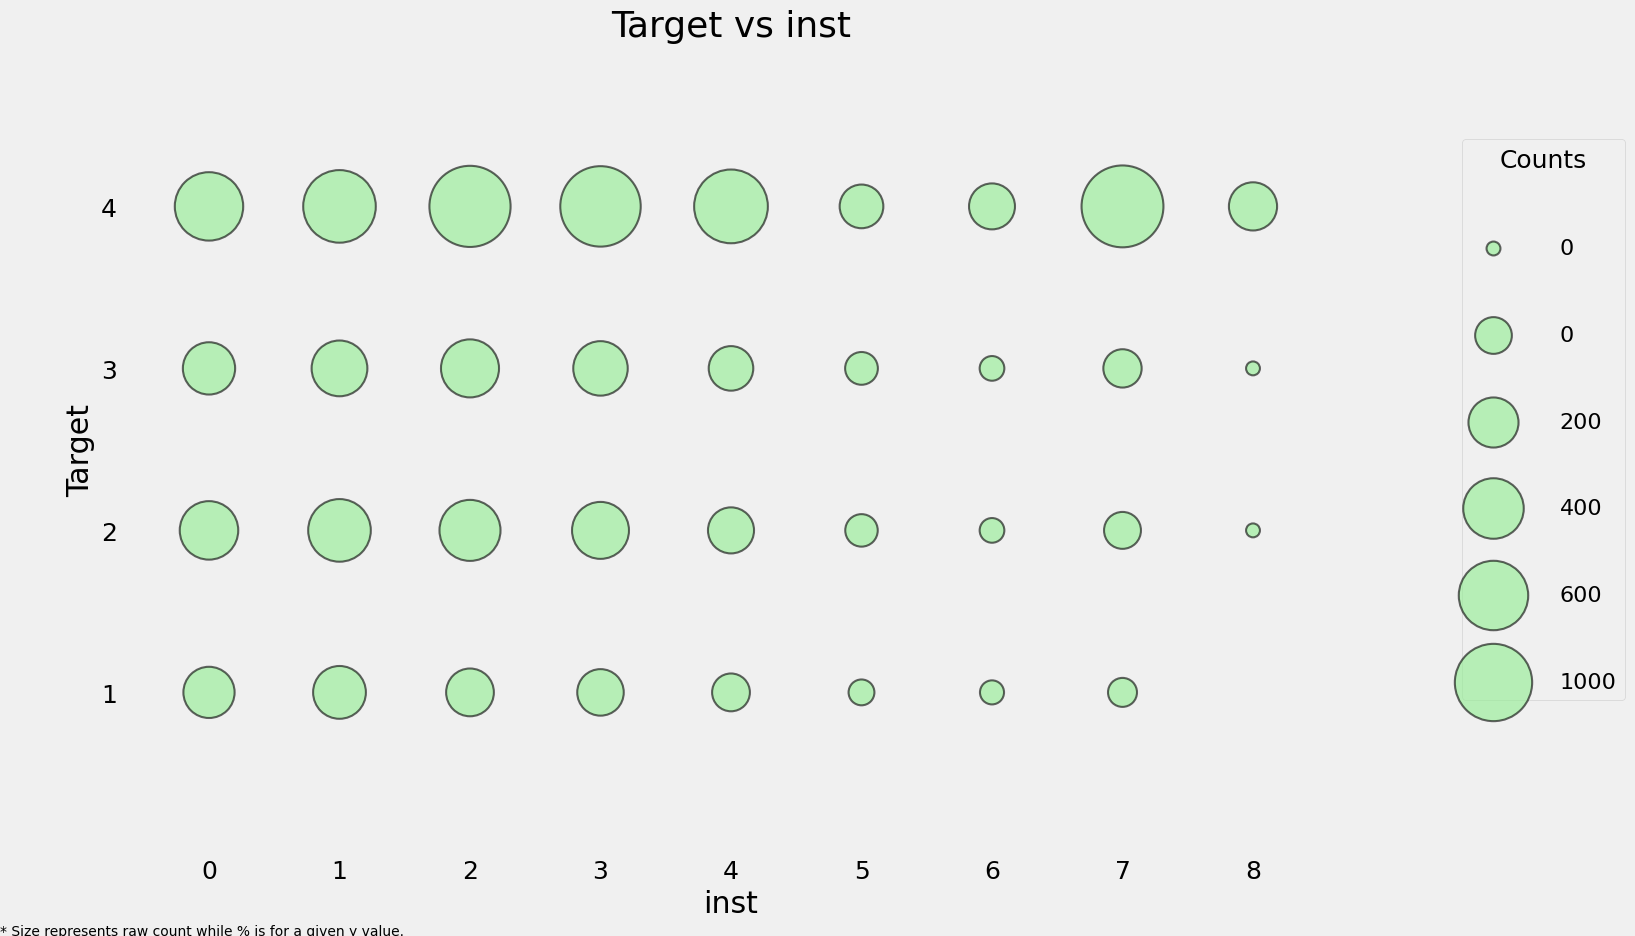

In [82]:
ind['inst'] = np.argmax(np.array(ind[[c for c in ind if c.startswith('instl')]]), axis = 1)
plot_categoricals('inst', 'Target', ind, annotate = False)

- 더 높은 수준의 교육은 덜 극단적인 수준의 빈곤에 해당하는 것으로 보입니다. 그러나 우리는 이것이 개인적인 수준이라는 것을 명심할 필요가 있으며 결국 가구 수준에서 이 데이터를 집계해야 할 것입니다.

Text(0.5, 1.0, 'Education Distribution by Target')

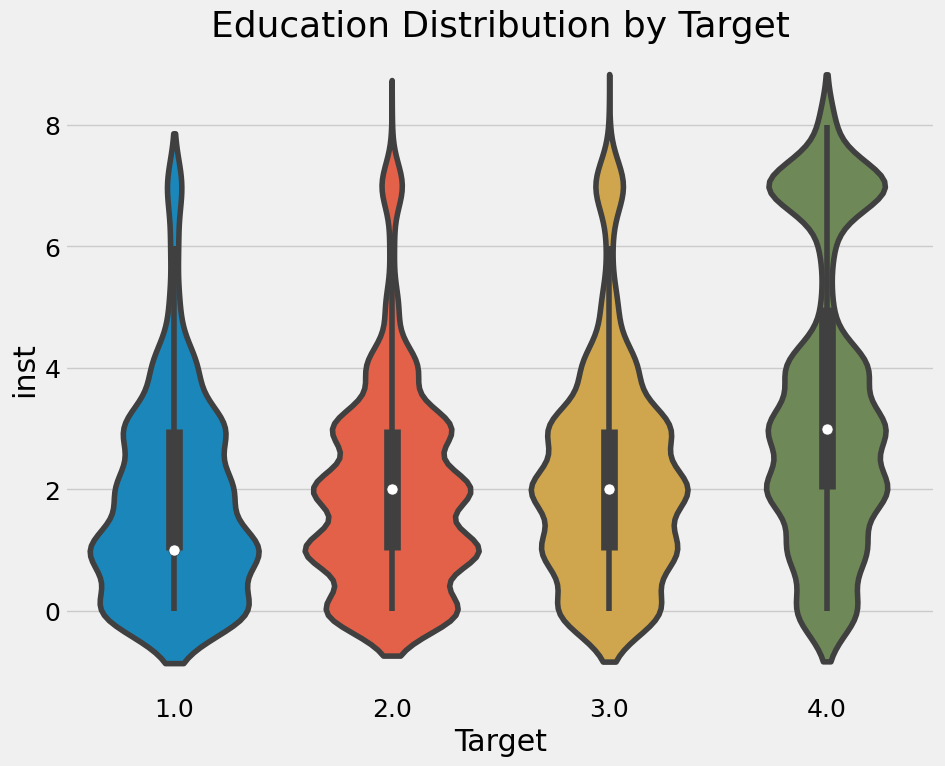

In [83]:
plt.figure(figsize = (10,8))
sns.violinplot(x = 'Target', y = 'inst', data = ind)
plt.title('Education Distribution by Target')

In [84]:
ind.shape

(33413, 40)

### Feature Construction

- 우리는 기존 데이터를 사용하여 몇 가지 기능을 만들 수 있습니다. 예를 들어, 우리는 학교를 다니는 기간을 나이로 나눌 수 있습니다.


<Axes: xlabel='Target', ylabel='escolari/age'>

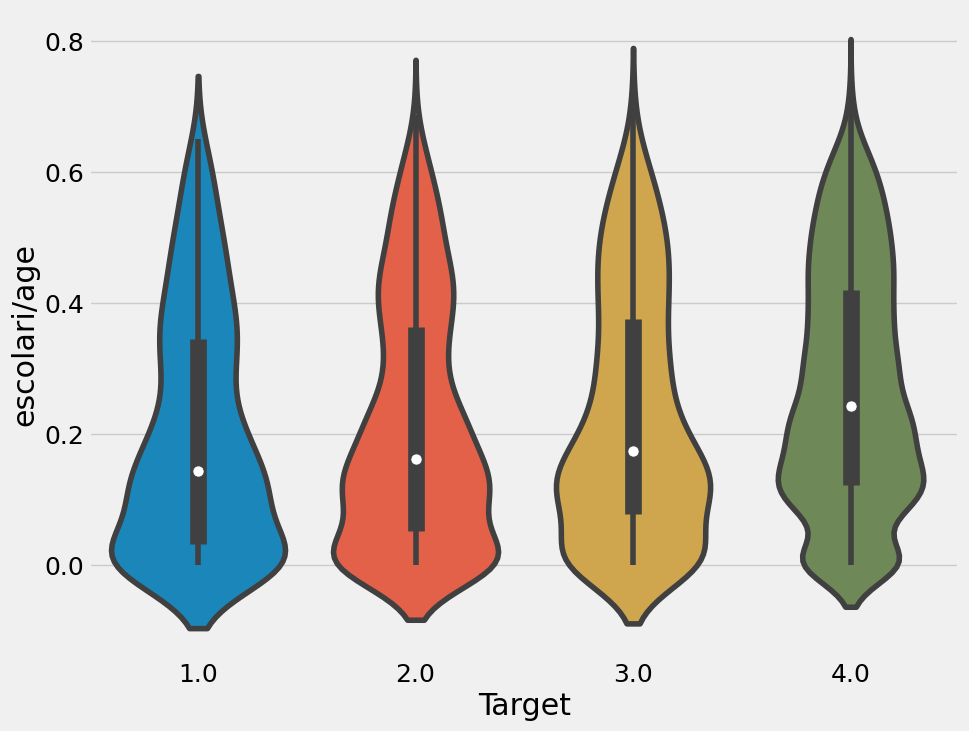

In [85]:
ind['escolari/age'] = ind['escolari']/ind['age']
plt.figure(figsize = (10,8))
sns.violinplot(x='Target', y='escolari/age', data = ind)

- 우리는 또한 우리의 새로운 변수인 inst를 가지고 이것을 나이로 나눌 수 있습니다. 기술이라는 이름을 붙일 마지막 변수: 이것은 태블릿과 휴대전화의 결합을 나타냅니다

In [86]:
ind['inst/age'] = ind['inst'] / ind['age']
ind['tech'] = ind['v18q'] + ind['mobilephone']
ind['tech'].describe()

count    33413.000000
mean         1.214886
std          0.462567
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          2.000000
Name: tech, dtype: float64

#Feature Engineering through Aggregations

- 개별 데이터를 가구 데이터에 통합하려면 가구별로 집계해야 합니다. 가장 간단한 방법은 패밀리 IDhogar를 기준으로 그룹화한 다음 데이터를 집계하는 것입니다. 순서형 변수 또는 연속형 변수에 대한 집계의 경우 6개를 사용할 수 있으며, 그 중 5개는 판다에 내장되어 있으며, 하나는 범위_를 정의합니다. 부울 집계는 동일할 수 있지만, 이렇게 하면 중복 열이 많이 생성되어 삭제해야 합니다. 이 경우 동일한 집계를 사용한 다음 다시 돌아가서 중복 열을 삭제합니다.

In [87]:
range_ = lambda x: x.max() - x.min()
range_.__name__ = 'range_'

ind = ind.set_index('idhogar')
num_cols = ind.select_dtypes(include=['int', 'float']).columns
ind_agg = ind[num_cols].groupby('idhogar').agg(['min', 'max', 'sum', 'count', 'std', range_])

In [88]:
ind_agg.head()

Target                             v18q                            \
             min  max  sum count  std range_  min max sum count  std range_   
idhogar                                                                       
000a08204    NaN  NaN  0.0     0  NaN    NaN    1   1   3     3  0.0      0   
000bce7c4    NaN  NaN  0.0     0  NaN    NaN    0   0   0     2  0.0      0   
001845fb0    NaN  NaN  0.0     0  NaN    NaN    0   0   0     4  0.0      0   
001ff74ca    4.0  4.0  8.0     2  0.0    0.0    1   1   2     2  0.0      0   
003123ec2    2.0  2.0  8.0     4  0.0    0.0    0   0   0     4  0.0      0   

          dis                                female                          \
          min max sum count       std range_    min max sum count       std   
idhogar                                                                       
000a08204   0   0   0     3  0.000000      0      0   1   1     3  0.577350   
000bce7c4   0   1   1     2  0.707107      1      0   1   1     2  0.707107   
001845fb0   0   0   0     4  0.000000      0      0   1   2     4  0.577350   
001ff74ca   0   0   0     2  0.000000      0      1   1   2     2  0.000000   
003123ec2   0   0   0     4  0.000000      0      0   1   1     4  0.500000   

                 estadocivil1                                estadocivil2      \
          range_          min max sum count       std range_          min max   
idhogar                                                                         
000a08204      1            0   1   1     3  0.577350      1            0   1   
000bce7c4      1            0   0   0     2  0.000000      0            0   0   
001845fb0      1            0   0   0     4  0.000000      0            0   1   
001ff74ca      0            0   1   1     2  0.707107      1            0   0   
003123ec2      1            0   1   2     4  0.577350      1            0   1   

                                    estadocivil3                            \
          sum count      std range_          min max sum count  std range_   
idhogar                                                                      
000a08204   2     3  0.57735      1            0   0   0     3  0.0      0   
000bce7c4   0     2  0.00000      0            1   1   2     2  0.0      0   
001845fb0   2     4  0.57735      1            0   0   0     4  0.0      0   
001ff74ca   0     2  0.00000      0            0   0   0     2  0.0      0   
003123ec2   2     4  0.57735      1            0   0   0     4  0.0      0   

          estadocivil4                           estadocivil5                \
                   min max sum count  std range_          min max sum count   
idhogar                                                                       
000a08204            0   0   0     3  0.0      0            0   0   0     3   
000bce7c4            0   0   0     2  0.0      0            0   0   0     2   
001845fb0            0   0   0     4  0.0      0            0   0   0     4   
001ff74ca            0   0   0     2  0.0      0            0   1   1     2   
003123ec2            0   0   0     4  0.0      0            0   0   0     4   

                           estadocivil6                            \
                std range_          min max sum count  std range_   
idhogar                                                             
000a08204  0.000000      0            0   0   0     3  0.0      0   
000bce7c4  0.000000      0            0   0   0     2  0.0      0   
001845fb0  0.000000      0            0   0   0     4  0.0      0   
001ff74ca  0.707107      1            0   0   0     2  0.0      0   
003123ec2  0.000000      0            0   0   0     4  0.0      0   

          estadocivil7                               parentesco1          \
                   min max sum count      std range_         min max sum   
idhogar                                                                    
000a08204            0   0   0     3  0.00000      0    

- 이 한 줄로 30개의 기능에서 180개의 기능으로 이동합니다. 그런 다음 열 이름을 변경하여 추적하기 쉽게 할 수 있습니다.

In [89]:
new_col = []
for c in ind_agg.columns.levels[0]:
  for stat in ind_agg.columns.levels[1]:
    new_col.append(f'{c}-{stat}')

ind_agg.columns = new_col
ind_agg.head()

Target-min  Target-max  Target-sum  Target-count  Target-std  \
idhogar                                                                   
000a08204         NaN         NaN         0.0             0         NaN   
000bce7c4         NaN         NaN         0.0             0         NaN   
001845fb0         NaN         NaN         0.0             0         NaN   
001ff74ca         4.0         4.0         8.0             2         0.0   
003123ec2         2.0         2.0         8.0             4         0.0   

           Target-range_  v18q-min  v18q-max  v18q-sum  v18q-count  v18q-std  \
idhogar                                                                        
000a08204            NaN         1         1         3           3       0.0   
000bce7c4            NaN         0         0         0           2       0.0   
001845fb0            NaN         0         0         0           4       0.0   
001ff74ca            0.0         1         1         2           2       0.0   
003123ec2            0.0         0         0         0           4       0.0   

           v18q-range_  dis-min  dis-max  dis-sum  dis-count   dis-std  \
idhogar                                                                  
000a08204            0        0        0        0          3  0.000000   
000bce7c4            0        0        1        1          2  0.707107   
001845fb0            0        0        0        0          4  0.000000   
001ff74ca            0        0        0        0          2  0.000000   
003123ec2            0        0        0        0          4  0.000000   

           dis-range_  female-min  female-max  female-sum  female-count  \
idhogar                                                                   
000a08204           0           0           1           1             3   
000bce7c4           1           0           1           1             2   
001845fb0           0           0           1           2             4   
001ff74ca           0           1           1           2             2   
003123ec2           0           0           1           1             4   

           female-std  female-range_  estadocivil1-min  estadocivil1-max  \
idhogar                                                                    
000a08204    0.577350              1                 0                 1   
000bce7c4    0.707107              1                 0                 0   
001845fb0    0.577350              1                 0                 0   
001ff74ca    0.000000              0                 0                 1   
003123ec2    0.500000              1                 0                 1   

           estadocivil1-sum  estadocivil1-count  estadocivil1-std  \
idhogar                                                             
000a08204                 1                   3          0.577350   
000bce7c4                 0                   2          0.000000   
001845fb0                 0                   4          0.000000   
001ff74ca                 1                   2          0.707107   
003123ec2                 2                   4          0.577350   

           estadocivil1-range_  estadocivil2-min  estadocivil2-max  \
idhogar                                                              
000a08204                    1                 0                 1   
000bce7c4                    0                 0                 0   
001845fb0                    0                 0                 1   
001ff74ca                    1                 0                 0   
003123ec2                    1                 0                 1   

           estadocivil2-sum  estadocivil2-count  estadocivil2-std  \
idhogar                                                             
000a08204                 2                   3           0.57735   
000bce7c4                 0                   2           0.00000   
001845fb0                 2                   4           0.57735   
001ff74ca                 

In [90]:
ind_agg.iloc[:, [6,7,8,9,12,13,14,15]].head()

v18q-min  v18q-max  v18q-sum  v18q-count  dis-min  dis-max  \
idhogar                                                                 
000a08204         1         1         3           3        0        0   
000bce7c4         0         0         0           2        0        1   
001845fb0         0         0         0           4        0        0   
001ff74ca         1         1         2           2        0        0   
003123ec2         0         0         0           4        0        0   

           dis-sum  dis-count  
idhogar                        
000a08204        0          3  
000bce7c4        1          2  
001845fb0        0          4  
001ff74ca        0          2  
003123ec2        0          4

#### Feature Selection
- 첫 번째 기능 선택 단계에서는 상관 관계가 0.95보다 큰 모든 변수 쌍 중 하나를 제거할 수 있습니다.

In [91]:
corr_matrix = ind_agg.corr()

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(abs(upper[column]) > 0.95)]

print(f'There are {len(to_drop)} correlated columns to remove,')

There are 113 correlated columns to remove,


- 열을 삭제한 다음 헤드 데이터와 병합하여 최종 데이터 프레임을 생성합니다.

In [92]:
ind_agg = ind_agg.drop(columns = to_drop)
ind_feats = list(ind_agg.columns)

final = heads.merge(ind_agg, on = 'idhogar', how = 'left')
print('Final features shape: ', final.shape)

Final features shape:  (10307, 232)


In [93]:
final.head()

Id    idhogar  Target  hacdor  hacapo  v14a  refrig  paredblolad  \
0  ID_279628684  21eb7fcc1     4.0       0       0     1       1            1   
1  ID_f29eb3ddd  0e5d7a658     4.0       0       0     1       1            0   
2  ID_68de51c94  2c7317ea8     4.0       0       0     1       1            0   
3  ID_ec05b1a7b  2b58d945f     4.0       0       0     1       1            1   
4  ID_1284f8aad  d6dae86b7     4.0       1       0     1       1            1   

   paredzocalo  paredpreb  pisocemento  pareddes  paredmad  paredzinc  \
0            0          0            0         0         0          0   
1            0          0            0         0         1          0   
2            0          0            0         0         1          0   
3            0          0            0         0         0          0   
4            0          0            0         0         0          0   

   paredfibras  paredother  pisomoscer  pisoother  pisonatur  pisonotiene  \
0            0           0           1          0          0            0   
1            0           0           0          0          0            0   
2            0           0           1          0          0            0   
3            0           0           1          0          0            0   
4            0           0           1          0          0            0   

   pisomadera  techozinc  techoentrepiso  techocane  techootro  cielorazo  \
0           0          0               1          0          0          1   
1           1          1               0          0          0          1   
2           0          1               0          0          0          1   
3           0          1               0          0          0          1   
4           0          1               0          0          0          1   

   abastaguadentro  abastaguafuera  abastaguano  public  planpri  noelec  \
0                1               0            0       1        0       0   
1                1               0            0       1        0       0   
2                1               0            0       1        0       0   
3                1               0            0       1        0       0   
4                1               0            0       1        0       0   

   coopele  sanitario1  sanitario2  sanitario3  sanitario5  sanitario6  \
0        0           0           1           0           0           0   
1        0           0           1           0           0           0   
2        0           0           1           0           0           0   
3        0           0           1           0           0           0   
4        0           0           1           0           0           0   

   energcocinar1  energcocinar2  energcocinar3  energcocinar4  elimbasu1  \
0              0              0              1              0          1   
1              0              1              0              0          1   
2              0              1              0              0          1   
3              0              1              0              0          1   
4              0              0              1              0          1   

   elimbasu2  elimbasu3  elimbasu4  elimbasu5  elimbasu6  epared1  epared2  \
0          0          0          0          0          0        0        1   
1          0          0          0          0          0        0        1   
2          0          0          0          0          0        0        1   
3          0          0          0          0          0        0        0   
4          0          0          0          0          0        1        0   

   epared3  eviv1  eviv2  eviv3  tipovivi1  tipovivi2  tipovivi3  tipovivi4  \
0        0      1      0      0          0          0          1          0   
1        0      0      1      0          0          0          1          0   
2        0      0      0      1          1          0          0          0   
3        1      0

#### Final Data Exploration


In [94]:
corrs = final.corr()['Target']

In [95]:
corrs.sort_values().head()

warning          -0.301791
instlevel2-sum   -0.297868
instlevel1-sum   -0.271204
hogar_nin        -0.266309
r4t1             -0.260917
Name: Target, dtype: float64

In [96]:
corrs.sort_values().dropna().tail()

inst-max        0.368229
escolari-max    0.373091
Target-sum      0.452667
Target-min      0.990881
Target          1.000000
Name: Target, dtype: float64

- 우리는 우리가 만든 변수 중 일부가 목표와 높은 상관관계를 가지고 있다는 것을 알 수 있습니다. 이러한 변수가 실제로 유용한지 여부는 모델링 단계에서 결정됩니다.

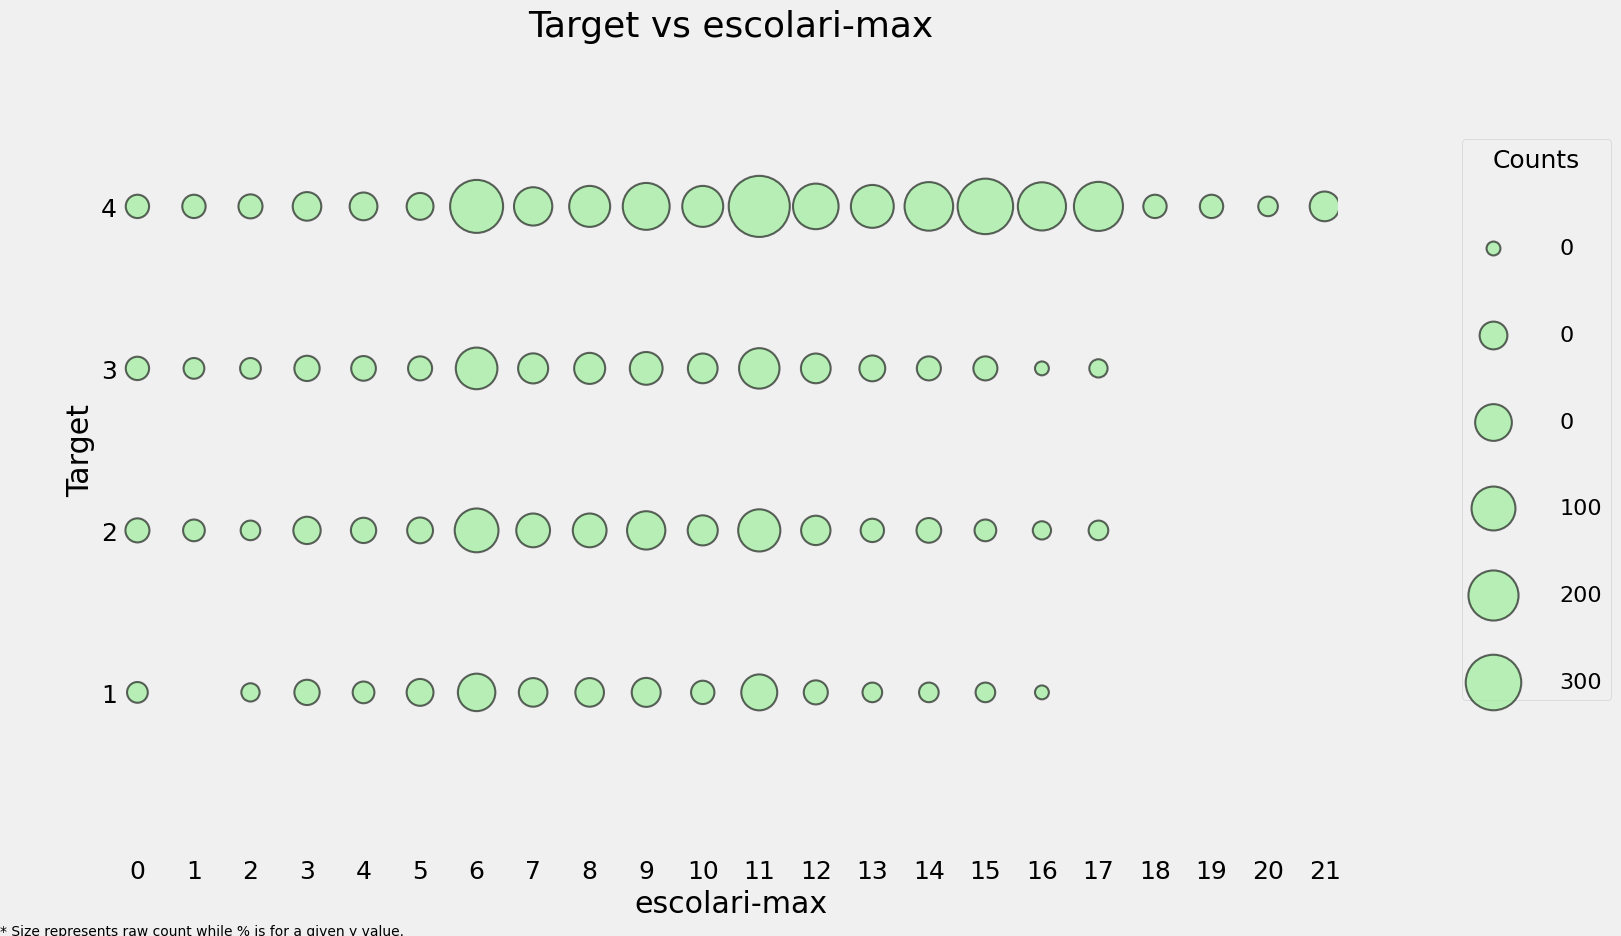

In [97]:
plot_categoricals('escolari-max', 'Target', final, annotate=False)

Text(0.5, 1.0, 'Max Schooling by Target')

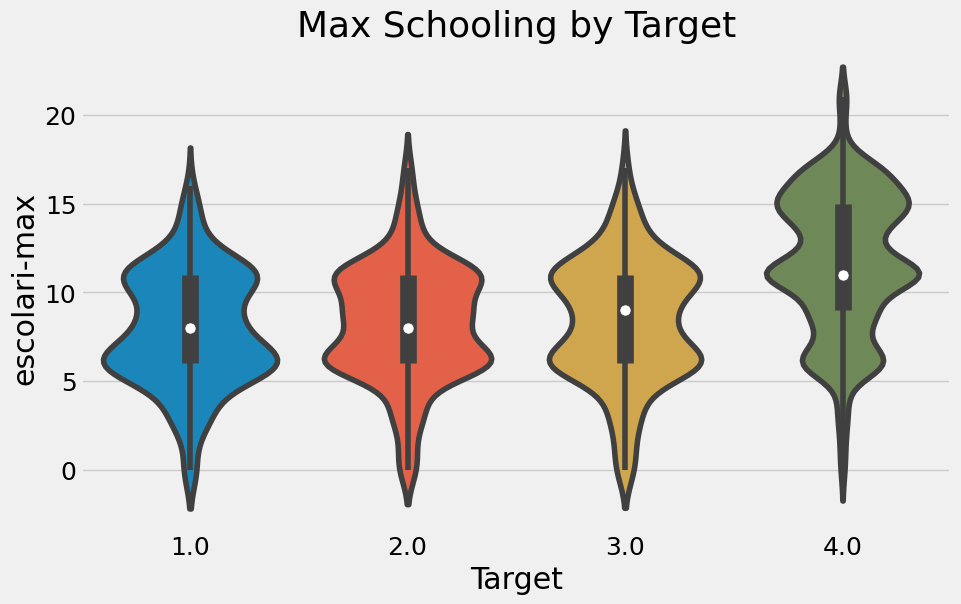

In [98]:
plt.figure(figsize = (10,6))
sns.violinplot(x = 'Target', y = 'escolari-max', data = final)
plt.title('Max Schooling by Target')

Text(0.5, 1.0, 'Max Scholling by Target')

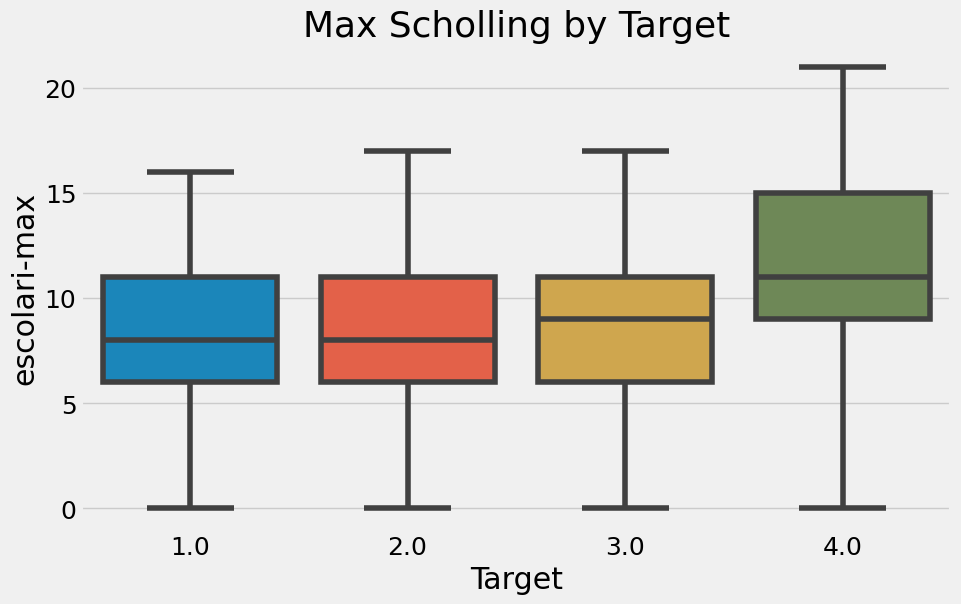

In [99]:
plt.figure(figsize = (10,6))
sns.boxplot(x='Target', y= 'escolari-max', data = final)
plt.title('Max Scholling by Target')

Text(0.5, 1.0, 'Average Schooling by Target')

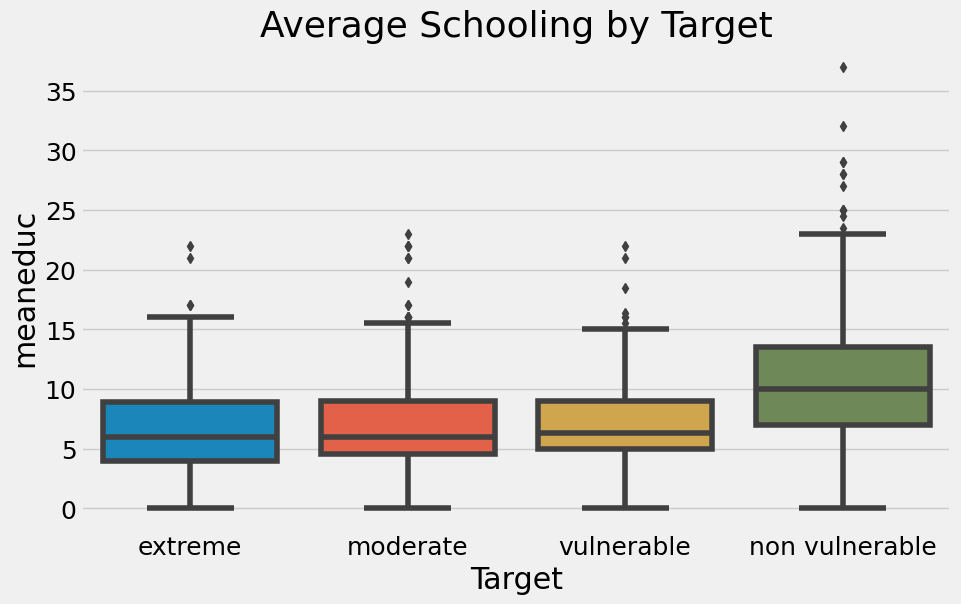

In [100]:
plt.figure(figsize = (10,6))
sns.boxplot(x='Target', y = 'meaneduc', data=final)
plt.xticks([0,1,2,3], poverty_mapping.values())
plt.title('Average Schooling by Target')

Text(0.5, 1.0, 'overcrowding by Target')

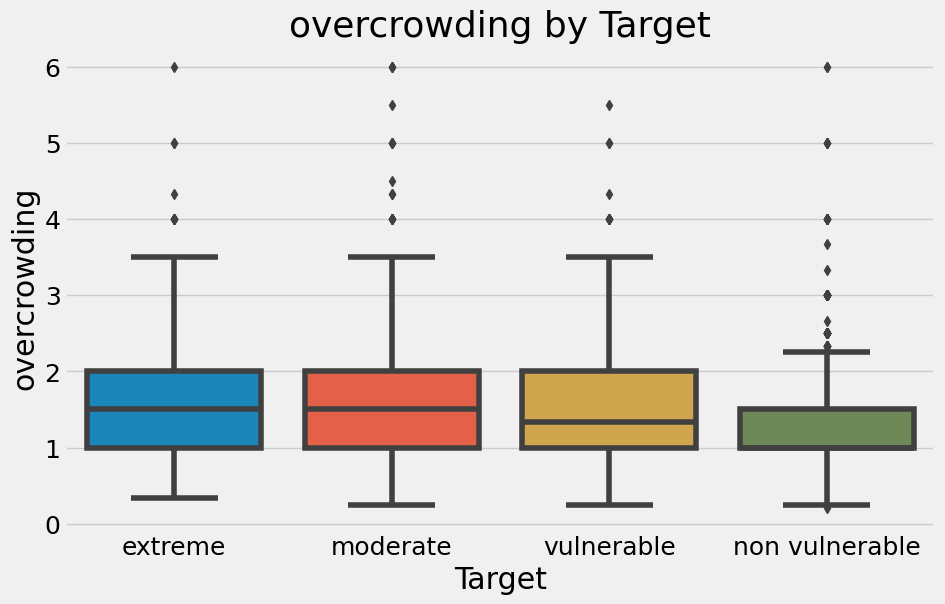

In [101]:
plt.figure(figsize = (10,6))
sns.boxplot(x = 'Target', y = 'overcrowding', data = final)
plt.xticks([0,1,2,3], poverty_mapping.values())
plt.title('overcrowding by Target')

- 유용할 수 있는 또 다른 특징은 가장의 성별입니다. 자료를 종합해봤기 때문에 개별 수준의 자료로 돌아가서 가장을 위한 성별을 찾아야 할 것입니다.

In [102]:
ind.head()

Id  Target  v18q  dis  female  estadocivil1  \
idhogar                                                            
21eb7fcc1  ID_279628684     4.0     0    0       0             0   
0e5d7a658  ID_f29eb3ddd     4.0     1    0       0             0   
2c7317ea8  ID_68de51c94     4.0     0    1       1             0   
2b58d945f  ID_d671db89c     4.0     1    0       0             0   
2b58d945f  ID_d56d6f5f5     4.0     1    0       1             0   

           estadocivil2  estadocivil3  estadocivil4  estadocivil5  \
idhogar                                                             
21eb7fcc1             0             0             1             0   
0e5d7a658             0             0             1             0   
2c7317ea8             0             0             0             0   
2b58d945f             0             0             0             0   
2b58d945f             1             0             0             0   

           estadocivil6  estadocivil7  parentesco1  parentesco2  parentesco3  \
idhogar                                                                        
21eb7fcc1             0             0            1            0            0   
0e5d7a658             0             0            1            0            0   
2c7317ea8             1             0            1            0            0   
2b58d945f             0             1            0            0            1   
2b58d945f             0             0            0            1            0   

           parentesco4  parentesco5  parentesco6  parentesco7  parentesco8  \
idhogar                                                                      
21eb7fcc1            0            0            0            0            0   
0e5d7a658            0            0            0            0            0   
2c7317ea8            0            0            0            0            0   
2b58d945f            0            0            0            0            0   
2b58d945f            0            0            0            0            0   

           parentesco9  parentesco10  parentesco11  parentesco12  instlevel1  \
idhogar                                                                        
21eb7fcc1            0             0             0             0           0   
0e5d7a658            0             0             0             0           0   
2c7317ea8            0             0             0             0           0   
2b58d945f            0             0             0             0           0   
2b58d945f            0             0             0             0           0   

           instlevel2  instlevel3  instlevel4  instlevel5  instlevel6  \
idhogar                                                                 
21eb7fcc1           0           0           1           0           0   
0e5d7a658           0           0           0           0           0   
2c7317ea8           0           0           0           1           0   
2b58d945f           0           0           1           0           0   
2b58d945f           0           0           0           1           0   

           instlevel7  instlevel8  instlevel9  mobilephone  rez_esc-missing  \
idhogar                                                                       
21eb7fcc1           0           0           0            1            False   
0e5d7a658           0           1           0            1            False   
2c7317ea8           0           0           0            0            False   
2b58d945f           0           0           0            1            False   
2b58d945f           0           0           0            1            False   

           rez_esc  escolari  age  inst  escolari/age  inst/age  tech  
idhogar                                                                
21eb7fcc1      0.0        10   43     3      0.232558  0.069767     1  
0e5d7a658      0.0        12   67     7      0.179104  0.104478     2  
2c7317ea8      0.0        11   92    

In [103]:
ind.reset_index(inplace=True)
head_gender = ind.loc[ind['parentesco1'] == 1, ['idhogar', 'female']]
final = final.merge(head_gender, on='idhogar', how='left').rename(columns={'female': 'female-head'})

In [104]:
final.groupby('female-head')['Target'].value_counts(normalize=True)

female-head  Target
0            4.0       0.682873
             2.0       0.136464
             3.0       0.123204
             1.0       0.057459
1            4.0       0.617369
             2.0       0.167670
             3.0       0.113500
             1.0       0.101462
Name: Target, dtype: float64

- 가장이 여성인 가구들은 빈곤의 심각한 수준을 가질 가능성이 약간 더 높은 것처럼 보입니다.

Text(0.5, 1.0, 'Target by Female Head of Household')

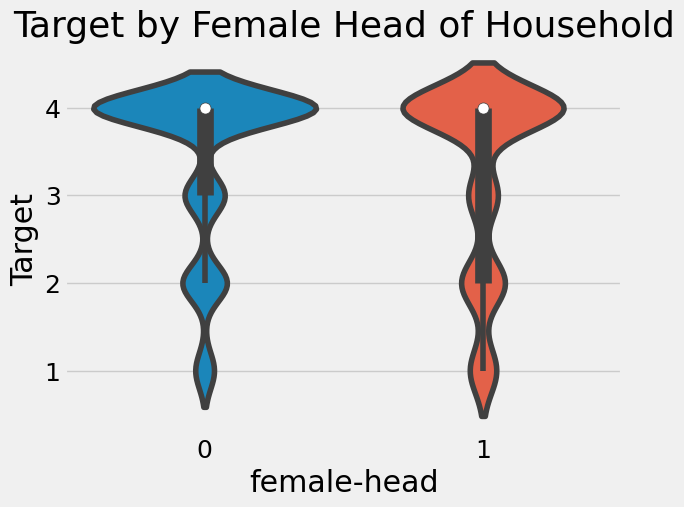

In [105]:
sns.violinplot(x = 'female-head', y = 'Target', data = final)
plt.title('Target by Female Head of Household')

- 우리는 또한 가정에 여성 가장이 있는지 여부에 따라 평균 교육의 차이를 살펴볼 수 있습니다.

Text(0.5, 1.0, 'Average Education by Target and Female Head of Household')

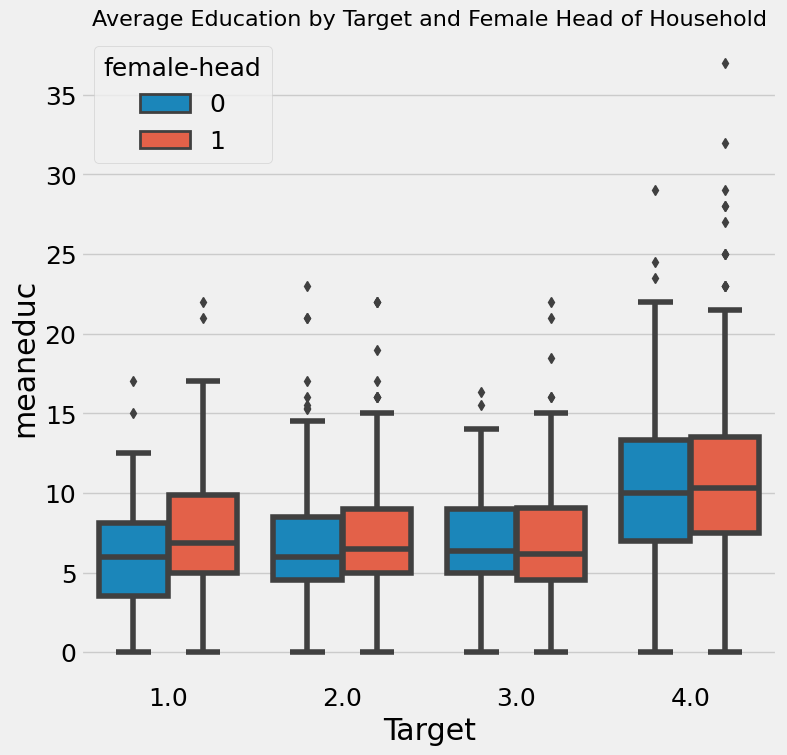

In [106]:
plt.figure(figsize = (8,8))
sns.boxplot(x = 'Target', y = 'meaneduc', hue = 'female-head', data = final)
plt.title('Average Education by Target and Female Head of Household', size = 16)

- 목표치의 모든 값에서 여성이 가장인 가구는 교육 수준이 더 높은 것으로 보입니다. 하지만, 우리는 전반적으로 여성이 가장인 가구는 심각한 빈곤을 겪을 가능성이 더 높다는 것을 보았습니다.

In [107]:
final.groupby('female-head')['meaneduc'].agg(['mean', 'count'])

mean  count
female-head                 
0            8.968025   6384
1            9.237013   3903

- 전체적으로 여성 가장이 있는 가구의 평균 교육은 남성 가장이 있는 가구보다 약간 높습니다. 이것을 어떻게 이해해야 할지 잘 모르겠습니다만, 제가 보기에는 맞는 것 같습니다.

# Machine Learning Modeling
- 기능 엔지니어링/구축이 완료되면 기계 학습을 시작할 수 있습니다! 모든 데이터(교육 및 테스트 모두)는 각 가구에 대해 집계되므로 모델에 직접 사용할 수 있습니다. 먼저 모델링 프로세스를 보여주기 위해 Scikit-Learn에서 사용 가능한 랜덤 포레스트 분류기를 사용합니다. 이를 통해 리더보드의 정상에 오르지는 못하겠지만, 기준을 설정할 수 있습니다. 나중에 강력한 그라데이션 부스팅 머신을 포함한 여러 모델을 사용해 보겠습니다.

- 모델을 평가하기 위해 교육 데이터에 10배 교차 검증을 사용합니다. 이는 기본적으로 훈련 데이터의 서로 다른 분할을 사용하여 모델을 10번 훈련하고 테스트합니다. 10배 교차 검증은 테스트 세트에서 모델의 성능을 추정하는 효과적인 방법입니다. 교차 검증의 평균 성능과 표준 편차를 조사하여 접힌 부분 간에 점수가 얼마나 변하는지 확인하려고 합니다. F1 매크로 측정을 사용하여 성능을 평가합니다.


In [108]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

scorer = make_scorer(f1_score, greater_is_better=True, average = 'macro')

In [109]:
train_labels = np.array(list(final[final['Target'].notnull()]['Target'].astype(np.uint8)))

train_set = final[final['Target'].notnull()].drop(columns = ['Id', 'idhogar', 'Target'])
test_set = final[final['Target'].isnull()].drop(columns = ['Id', 'idhogar', 'Target'])

submission_base = test[['Id', 'idhogar']].copy()

- 여러 모형을 비교할 예정이기 때문에 형상 모수를 조정하려고 합니다(각 열의 범위를 0과 1 사이로 제한). 많은 앙상블 모델의 경우 이것이 필요하지 않지만 KNearest Neighbors 또는 Support Vector Machine과 같이 거리 메트릭에 의존하는 모델을 사용할 경우 기능 확장이 절대적으로 필요합니다. 여러 모델을 비교할 때는 형상의 크기를 조정하는 것이 가장 안전합니다. 또한 결측값을 형상의 중위수로 귀속시킵니다.

- 결측값을 귀속시키고 한 단계로 형상을 확장하기 위해 파이프라인을 만들 수 있습니다. 이는 교육 데이터에 적합하며 교육 및 테스트 데이터를 변환하는 데 사용됩니다.

In [110]:
features = list(train_set.columns)
pipeline = Pipeline([('imputer', SimpleImputer(strategy = 'median')), ('scaler', MinMaxScaler())])

train_set = pipeline.fit_transform(train_set)
test_set = pipeline.transform(test_set)

- 데이터에는 결측값이 없으며 0과 1 사이에서 척도가 조정됩니다. 즉, Scikit-Learn 모델에서 직접 사용할 수 있습니다.

In [111]:
model = RandomForestClassifier(n_estimators = 100, random_state=100, n_jobs = -1)
cv_score = cross_val_score(model, train_set, train_labels, cv=10, scoring=scorer)
print(f'10 Fold Cross Validation F1 Score - {round(cv_score.mean(), 4)} with std = {round(cv_score.std(), 4)}')

10 Fold Cross Validation F1 Score - 0.8577 with std = 0.0399


- 그 점수는 좋지 않지만, 기준이 될 것이고 우리에게 많은 개선의 여지를 남겨줄 것입니다!

##Feature Importances
- 트리 기반 모델을 사용하면 모델의 기능 유용성에 대한 상대적 순위를 보여주는 기능 중요도를 살펴볼 수 있습니다. 이것들은 분할을 위해 변수를 사용한 노드의 불순물 감소의 합을 나타내지만, 우리는 절대값에 대해 크게 신경 쓸 필요가 없습니다. 대신 상대 점수에 초점을 맞출 것입니다.

- 기능의 중요성을 보려면 전체 교육 세트에 대한 모델을 교육해야 합니다. 교차 검증은 피쳐 중요도를 반환하지 않습니다.

In [112]:
model.fit(train_set, train_labels)
feature_importances = pd.DataFrame({'feature': features, 'importance': model.feature_importances_})
feature_importances.head()

feature  importance
0       hacdor    0.000290
1       hacapo    0.000225
2         v14a    0.000134
3       refrig    0.001098
4  paredblolad    0.002749

- 다음은 기능 중요도를 표시하는 데 사용할 짧은 함수입니다. 저는 이 기능을 많이 사용하며 스크립트 간에 복사하여 붙여넣기를 자주 합니다. 그 서류가 말이 되기를 바랍니다!

In [113]:
def plot_feature_importances(df, n=10, threshold=None):
  plt.style.use('fivethirtyeight')
  df = df.sort_values('importance', ascending = False).reset_index(drop=True)
  df['importance_normalized'] = df['importance'] / df['importance'].sum()
  df['cumulative_importance'] = np.cumsum(df['importance_normalized'])
    
  plt.rcParams['font.size'] = 12
    
  # Bar plot of n most important features
  df.loc[:n, :].plot.barh(y = 'importance_normalized', 
                            x = 'feature', color = 'darkgreen', 
                            edgecolor = 'k', figsize = (12, 8),
                            legend = False, linewidth = 2)

  plt.xlabel('Normalized Importance', size = 18); plt.ylabel(''); 
  plt.title(f'{n} Most Important Features', size = 18)
  plt.gca().invert_yaxis()

  if threshold:
    plt.figure(figsize = (8, 6))
    plt.plot(list(range(len(df))), df['cumulative_importance'], 'b-')
    plt.xlabel('Number of Features', size = 16); plt.ylabel('Cumulative Importance', size = 16); 
    plt.title('Cumulative Feature Importance', size = 18)

    importance_index = np.min(np.where(df['cumulative_importance'] > threshold))
    plt.vlines(importance_index + 1, ymin=0, ymax=1.05, linestyles = '--', colors = 'red')
    plt.vlines(importance_index + 1, ymin = 0, ymax = 1.05, linestyles = '--', colors = 'red')
    plt.show();
    print('{} features required for {:.0f}% of cumulative importance.'.format(
        importance_index + 1, 100 * threshold))
    return df

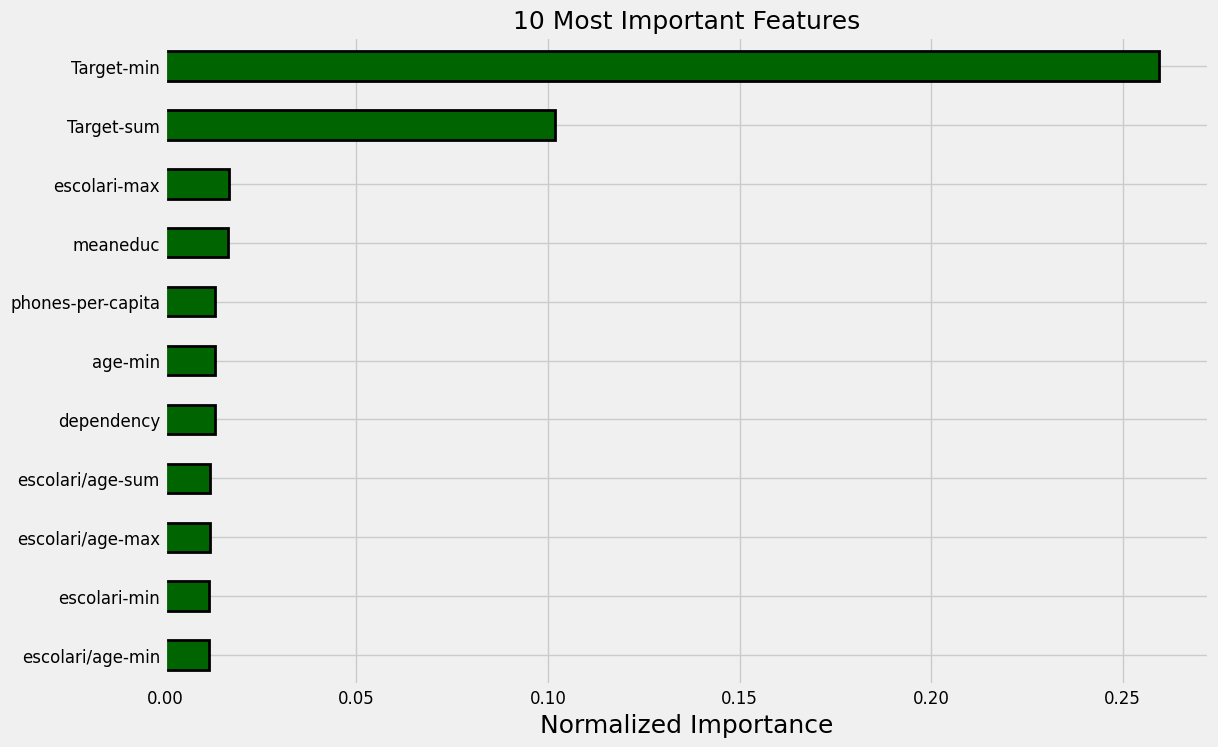

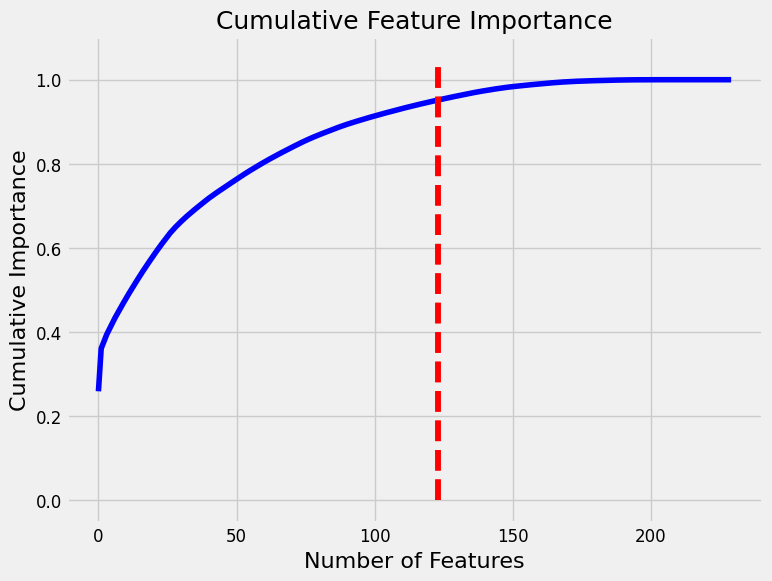

123 features required for 95% of cumulative importance.


In [114]:
norm_fi = plot_feature_importances(feature_importances, threshold=0.95)

- 교육이 최고입니다! 가장 중요한 변수는 가구 내 평균 교육량이고, 그 다음이 가구 내 누구의 최대 교육량입니다. 이 변수들은 상관성이 높은(공선적) 변수이며, 이는 데이터에서 변수 중 하나를 제거해야 한다는 것을 의미합니다. 다른 가장 중요한 기능은 우리가 만든 변수와 데이터에 이미 존재했던 변수의 조합입니다.

- 중요성의 90%를 차지하기 위해 ~180개의 기능 중 106개만 필요하다는 것이 흥미롭습니다. 이는 일부 기능을 제거할 수 있음을 나타냅니다. 그러나 기능의 중요성은 기능의 어느 방향이 중요한지를 알려주지 않습니다(예를 들어, 교육이 더 많거나 덜 심각한 빈곤으로 이어지는지를 알려주기 위해 이러한 기능을 사용할 수 없습니다). 기능은 관련성이 있는 것으로 간주되는 모델만 알려줍니다.

In [115]:
def kde_target(df, variable):
  colors = {1: 'red', 2: 'orange', 3:'blue', 4:'green'}
  plt.figure(figsize = (12, 8))
  df = df[df['Target'].notnull()]

  for level in df['Target'].unique():
    subset = df[df['Target'] == level].copy()
    sns.kdeplot(subset[variable].dropna(), 
                label = f'Poverty Level: {level}', color = colors[int(subset['Target'].unique())])
    plt.xlabel(variable)
    plt.ylabel('Density')
    plt.title('{} Distriburion'.format(variable.capitalize()))

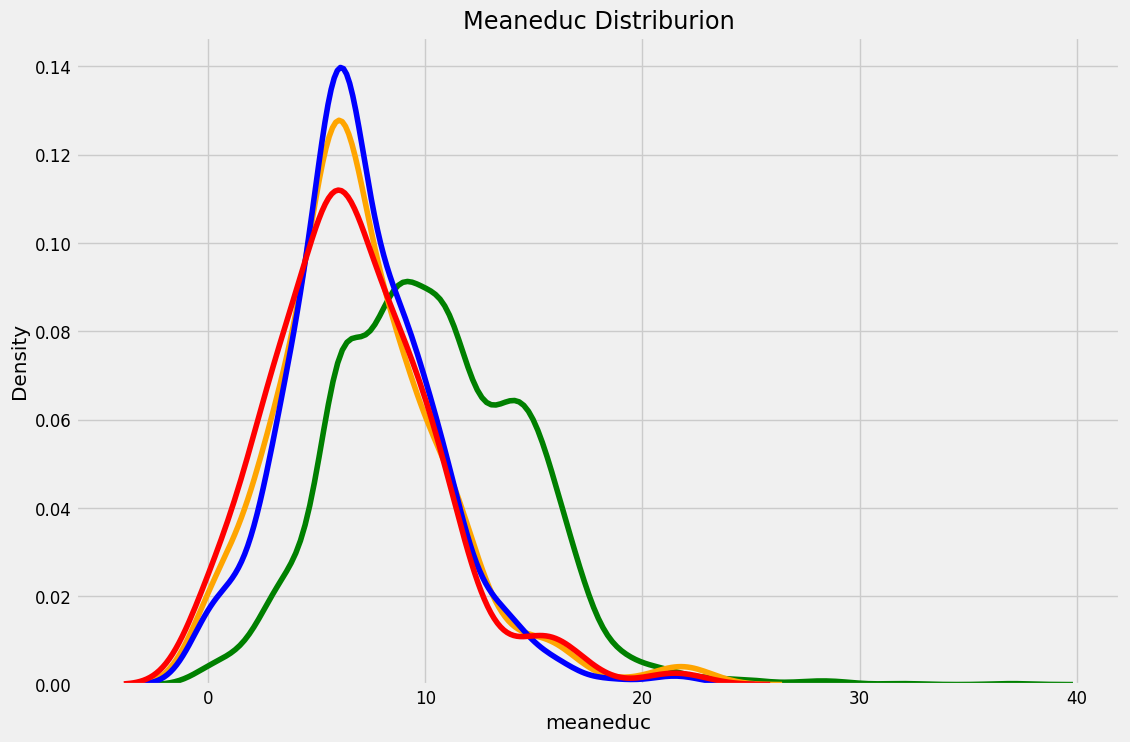

In [116]:
kde_target(final, 'meaneduc')

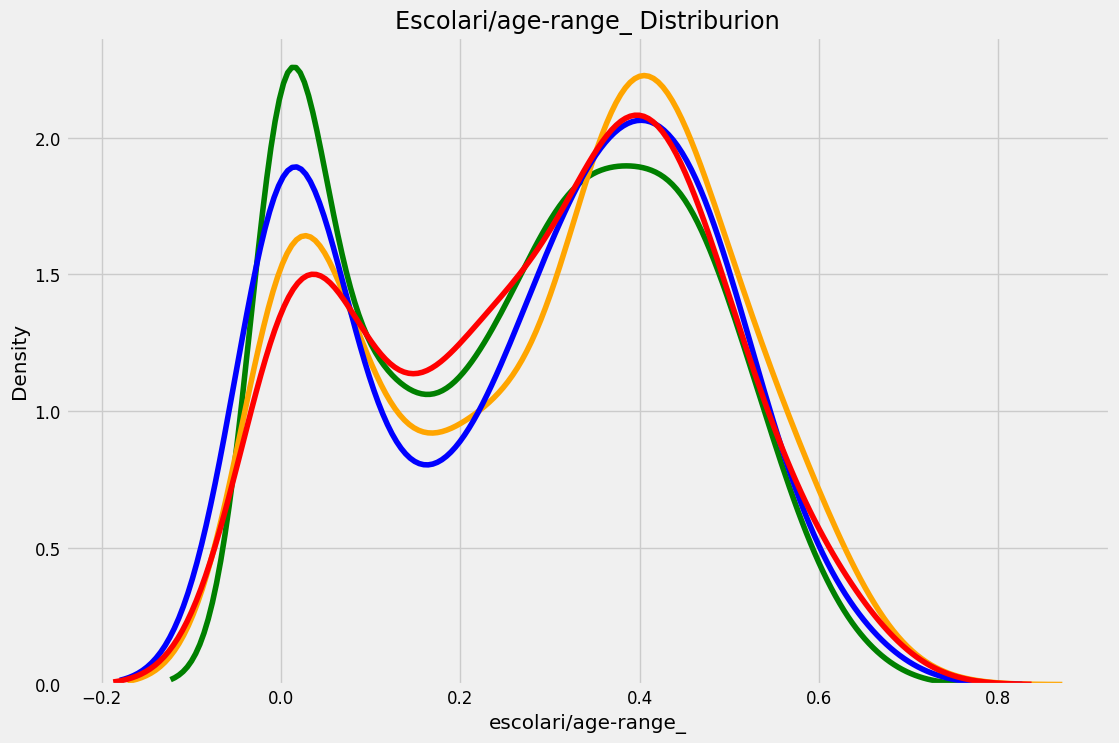

In [117]:
kde_target(final, 'escolari/age-range_')

#Model Selection

- 이제 좋은 기능을 갖추고 있으므로 이제 모델링을 시작해 보겠습니다. 우리는 이미 0.35의 최고 매크로 F1을 제공하는 랜덤 포레스트 분류기라는 기본 모델을 시도했습니다. 그러나 기계 학습에서는 어떤 모델이 주어진 데이터 세트에 가장 잘 작동하는지 미리 알 수 있는 방법이 없습니다. 다음 그림은 가우스 나이브 베이즈조차도 경사 부스팅 기계를 능가하는 몇 가지 문제가 있음을 보여줍니다. 이것은 Randal Olson이 기계 학습의 많은 포인트를 논의한 훌륭한 논문에서 나온 것입니다

- 이 그림이 말해주는 것은 어떤 것이 최적인지 확인하기 위해 여러 가지 모델을 시도해야 한다는 것입니다. 대부분의 사람들은 결국 그레이디언트 부스팅 기계에 정착하고 우리는 그것을 시도할 것입니다. 하지만 지금은 다른 옵션들을 살펴보도록 하겠습니다. Scikit-Learn 문서를 보면 말 그대로 수십 개(아마도 수백 개)의 다중 클래스 머신 러닝 모델이 있습니다. 우리는 그것들을 모두 시도할 필요는 없지만, 우리는 옵션에서 샘플을 추출해야 합니다.

- 우리가 하고 싶은 것은 모델을 평가할 수 있는 함수를 작성하는 것입니다. 우리가 이미 대부분의 코드를 작성했기 때문에 이것은 꽤 간단할 것입니다. 랜덤 포레스트 분류기 외에도 8개의 다른 Scikit-Learn 모델을 사용해 보겠습니다. 다행히도, 이 데이터 세트는 상대적으로 작고 모델을 통해 빠르게 반복할 수 있습니다. 우리는 결과를 저장할 데이터 프레임을 만들 것이고 함수는 각 모델의 데이터 프레임에 행을 추가할 것입니다.

In [118]:
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegressionCV, RidgeClassifierCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier

In [119]:
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings('ignore', category = ConvergenceWarning)
warnings.filterwarnings('ignore', category = DeprecationWarning)
warnings.filterwarnings('ignore', category = UserWarning)

model_results = pd.DataFrame(columns =['model', 'cv_mean', 'cv_std'])

def cv_model(train, train_labels, model, name, model_results = None):
  cv_scores = cross_val_score(model, train, train_labels, cv= 10, scoring=scorer, n_jobs = -1)
  print(f'10 Fold CV Score: {round(cv_scores.mean(), 5)} with std: {round(cv_scores.std(), 5)}')

  if model_results is not None:
    model_results = model_results.append(pd.DataFrame({'model': name, 
                                                       'cv_mean': cv_scores.mean(),
                                                       'cv_std': cv_scores.std()},
                                                      index =[0]), ignore_index = True)
    return model_results

In [120]:
model_results = cv_model(train_set, train_labels, LinearSVC(), 'LSVC', model_results)

10 Fold CV Score: 0.73727 with std: 0.0726


- 이는 목록에서 삭제할 수 있는 모델 중 하나입니다(실제 성능을 개선할 수 있도록 하이퍼파라미터 조정을 수행하지는 않았지만).

In [121]:
model_results = cv_model(train_set, train_labels, GaussianNB(), 'GNB', model_results)

10 Fold CV Score: 0.3476 with std: 0.1027


- 그 공연은 매우 형편없습니다. 저는 우리가 가우스 나이브 베이즈 방법을 다시 검토할 필요는 없다고 생각합니다(비록 그레이디언트 부스팅 기계를 능가할 수 있는 문제가 있지만).

In [122]:
model_resutls = cv_model(train_set, train_labels, MLPClassifier(hidden_layer_sizes = (32, 64, 128, 64, 32)),
                         'MLP', model_results)

10 Fold CV Score: 0.96244 with std: 0.01799


- 다층 퍼셉트론(심층 신경망)은 괜찮은 성능을 가지고 있습니다. 하이퍼파라미터를 사용하여 네트워크를 조정할 수 있는 경우 이 옵션을 사용할 수 있습니다. 그러나 제한된 양의 데이터는 일반적으로 효과적으로 학습하기 위해 수십만 개의 예를 필요로 하기 때문에 신경망에 문제가 될 수 있습니다.

In [123]:
model_results = cv_model(train_set, train_labels, LinearDiscriminantAnalysis(),
                         'LDA', model_results)

10 Fold CV Score: 0.97142 with std: 0.01416


- 사용자 경고를 필터링하지 않고 선형 판별 분석을 실행하면 "변수가 선형입니다."라는 메시지가 많이 표시됩니다 이를 통해 일부 선형 피쳐를 제거하려는 힌트를 얻을 수 있습니다! 점수가 랜덤 포레스트와 비슷하기 때문에 선형 변수를 제거한 후 이 모델을 다시 시도할 수 있습니다.

In [124]:
model_results = cv_model(train_set, train_labels, RidgeClassifierCV(), 'RIDGE', model_results)

10 Fold CV Score: 0.45279 with std: 0.01881


- 선형 모형(능선 정규화 포함)은 놀라울 정도로 잘 작동합니다. 이는 단순한 모델이 이 문제에서 큰 도움이 될 수 있음을 의미할 수도 있습니다(단, 더 강력한 방법을 사용하게 될 수도 있음).

In [125]:
for n in [5, 10, 20]:
    print(f'\nKNN with {n} neighbors\n')
    model_results = cv_model(train_set, train_labels, 
                             KNeighborsClassifier(n_neighbors = n),
                             f'knn-{n}', model_results)


KNN with 5 neighbors

10 Fold CV Score: 0.39488 with std: 0.04054

KNN with 10 neighbors

10 Fold CV Score: 0.3668 with std: 0.03251

KNN with 20 neighbors

10 Fold CV Score: 0.34656 with std: 0.05297


- 또 다른 시도로 의사 결정 트리 앙상블을 사용하는 랜덤 포레스트의 변형인 ExtraTree Classifier를 고려합니다.

In [126]:
from sklearn.ensemble import ExtraTreesClassifier

model_results = cv_model(train_set, train_labels, ExtraTreesClassifier(n_estimators=100, random_state = 10),
                         'EXT', model_results)

10 Fold CV Score: 0.84162 with std: 0.03983


##Comparing Model Perfomance
- 데이터 프레임의 모델링 결과를 사용하여 어떤 모델이 가장 효과적인지 보기 위해 그래프를 그릴 수 있습니다.

In [127]:
model_results = cv_model(train_set, train_labels,
                          RandomForestClassifier(100, random_state=10),
                              'RF', model_results)

10 Fold CV Score: 0.8796 with std: 0.04167


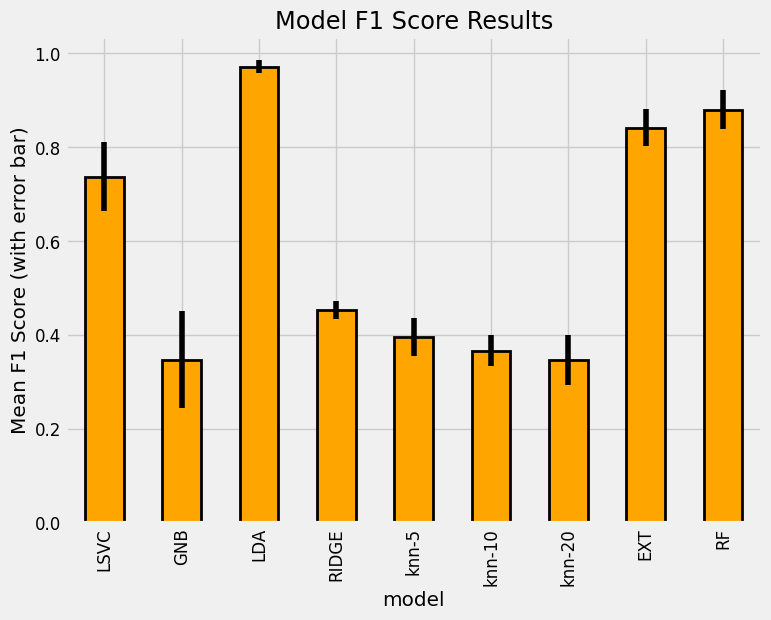

In [128]:
model_results.set_index('model', inplace = True)
model_results['cv_mean'].plot.bar(color = 'orange', figsize = (8, 6),
                                  yerr = list(model_results['cv_std']),
                                  edgecolor = 'k', linewidth = 2)
plt.title('Model F1 Score Results');
plt.ylabel('Mean F1 Score (with error bar)');
model_results.reset_index(inplace = True)

- 랜덤 포레스트가 바로 사용할 수 있기 때문에 가장 유력한 후보는 랜덤 포레스트인 것 같습니다. 하이퍼 파라미터를 조정하지 않아 모델 간 비교가 완벽하지 않지만, 이러한 결과는 트리 기반 앙상블 방법(그라디언트 부스팅 머신 포함)이 구조화된 데이터 세트에서 매우 잘 수행된다는 다른 많은 Kaggle 경쟁업체의 결과를 반영합니다. 하이퍼파라미터 성능은 기계 학습 모델의 성능을 향상시키지만, 모든 모델에 대해 가능한 모든 설정 조합을 시도할 시간이 없습니다. 아래 그래프(랜달 올슨의 논문에서)는 Scikit-Learn의 기본값에 대한 하이퍼파라미터 조정의 효과를 보여줍니다

- 대부분의 경우 정확도 향상은 10% 미만이므로 최악의 모델은 튜닝을 통해 갑자기 최고의 모델이 되지는 않을 것입니다.

- 지금은 랜덤 포레스트가 가장 좋다고 할 것입니다. 나중에 Scikit-Learn에서 구현되지는 않았지만 Gradient Boosting Machine을 사용하는 방법에 대해 알아보겠습니다. 대신 더 강력한 LightGBM 버전을 사용할 것입니다. 이제 랜덤 포레스트를 사용하여 제출하는 것으로 넘어갑시다.

#Making a Submission

- 제출하기 위해서는 테스트 데이터가 필요합니다. 다행히도, 우리는 기차 데이터와 정확히 같은 방식으로 포맷된 시험 데이터를 가지고 있습니다.

- 테스트 제출 형식은 아래와 같습니다. 각 가구에 대해 예측을 하고 있지만 실제로는 개인당 한 행(Id로 식별됨)이 필요하지만 가장에 대한 예측만 점수가 매겨집니다.

  - ID,Target
  - ID_2f6873615,1
  - ID_1c78846d2,2
  - ID_e5442cf6a,3
  - ID_a8db26a79,4
  - ID_a62966799,4

- submission_base에는 각 개인에 대한 "예측"이 있어야 하는 반면 test_ids에는 가장의 idhogar만 포함되므로 테스트 세트의 모든 개인이 포함됩니다. 예측할 때는 각 가구에 대해서만 예측한 다음 예측 데이터 프레임을 가구 ID(idhogar)의 모든 개인과 병합합니다. 이렇게 하면 한 가구의 모든 사람에 대해 목표값이 동일한 값으로 설정됩니다. 가장이 없는 시험 가구의 경우 점수가 매겨지지 않으므로 이러한 예측치를 4로 설정할 수 있습니다.

In [129]:
test_ids = list(final.loc[final['Target'].isnull(), 'idhogar'])

- 아래 함수는 모델, 교육 세트, 교육 레이블 및 테스트 세트를 가져와 다음 작업을 수행합니다:

  - 적합치를 사용하여 교육 데이터에 대한 모델을 교육합니다
  - 예측을 사용하여 검정 데이터를 예측합니다
  - 대회에 저장 및 업로드할 수 있는 제출 데이터 프레임을 만듭니다.

In [130]:
def submit(model, train, train_labels, test, test_ids):
  model.fit(train, train_labels)
  predictions = model.predict(test)
  predictions = pd.DataFrame({'idhogar' : test_ids,
                              'Target': predictions})
  submission = submission_base.merge(predictions, on = 'idhogar', how = 'left').drop(columns = ['idhogar'])
  submission['Target'] = submission['Target'].fillna(4).astype(np.int8)
  return submission

In [131]:
rf_submission = submit(RandomForestClassifier(n_estimators = 100, 
                                              random_state=10, n_jobs = -1), 
                         train_set, train_labels, test_set, test_ids)

rf_submission.to_csv('rf_submission.csv', index = False)

- 이러한 예측은 대회에 제출되었을 때 0.370점을 받았습니다.

#Feature Selection

- 모델 성능을 향상시키는 한 가지 잠재적인 방법은 형상 선택입니다. 이 프로세스는 모델에 가장 유용한 기능만 유지하려고 하는 프로세스입니다. "가장 유용한"은 다양한 의미를 가질 수 있으며, 가장 중요한 기능을 선택하기 위한 수많은 경험적 접근법이 있습니다. 이 노트북에서 기능을 선택하는 경우 먼저 상관 관계가 0.95보다 큰 열을 제거한 다음 Scikit-Learn 라이브러리를 사용하여 재귀 기능 제거를 적용합니다.

- 먼저 상관 관계입니다. 0.95는 임의 임계값입니다. 값을 자유롭게 변경하고 성능이 어떻게 변화하는지 확인하십시오!

In [132]:
train_set = pd.DataFrame(train_set, columns = features)
corr_matrix = train_set.corr()

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(abs(upper[column]) > 0.95)]

to_drop

['coopele', 'elec', 'Target-count', 'v18q-count', 'female-sum']

In [133]:
train_set = train_set.drop(columns = to_drop)
train_set.shape

(2973, 225)

In [134]:
test_set =pd.DataFrame(test_set, columns = features)
train_set, test_set = train_set.align(test_set, axis = 1, join = 'inner')
features = list(train_set.columns)

##Recursive Feature Elimination with Random Fores

- SKlearn의 RFECV는 교차 검증을 사용한 재귀 기능 제거를 나타냅니다. 선택기는 반복적인 방식으로 피쳐 중요도가 있는 모델을 사용하여 작동합니다. 각 반복마다 피쳐의 일부 또는 설정된 개수의 피쳐를 제거합니다. 교차 검증 점수가 더 이상 향상되지 않을 때까지 반복 작업이 계속됩니다.

- 선택기 개체를 만들기 위해 모델, 각 반복에서 제거할 기능 수, 교차 검증 접힘, 사용자 지정 점수 및 선택을 안내하는 기타 매개 변수를 전달합니다.

In [135]:
from sklearn.feature_selection import RFECV

estimator = RandomForestClassifier(random_state = 10, n_estimators = 100, n_jobs = -1)
selector = RFECV(estimator, step = 1, cv =3, scoring=scorer, n_jobs = -1)

- 그런 다음 다른 sklearn 모델과 마찬가지로 교육 데이터에 선택기를 맞춥니다. 교차 검증 점수가 더 이상 향상되지 않을 때까지 기능 선택이 계속됩니다.

In [136]:
selector.fit(train_set, train_labels)

RFECV(cv=3, estimator=RandomForestClassifier(n_jobs=-1, random_state=10),
      n_jobs=-1, scoring=make_scorer(f1_score, average=macro))

- 개체를 조사하여 각 반복에 대한 교육 점수를 확인할 수 있습니다. 다음 코드는 유효성 검사 점수 대 교육의 특징 수를 표시합니다.

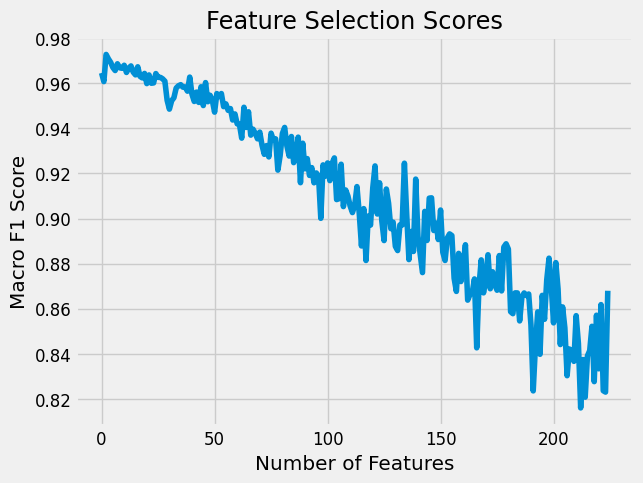

In [137]:
plt.plot(selector.cv_results_['mean_test_score']);
plt.xlabel('Number of Features'); 
plt.ylabel('Macro F1 Score'); 
plt.title('Feature Selection Scores');

- 최대 96개의 기능을 추가하면 점수가 향상된다는 것을 알 수 있습니다. 선택기에 따르면 이것이 최적의 형상 개수입니다.

- 각 기능의 순위는 훈련된 개체를 검사하여 확인할 수 있습니다. 이것들은 본질적으로 반복에 걸쳐 평균화된 기능의 중요성을 나타냅니다. 기능은 동일한 순위를 공유할 수 있으며 순위가 1인 기능만 유지됩니다.

In [138]:
rankings = pd.DataFrame({'feature': list(train_set.columns), 'rank':list(selector.ranking_)}).sort_values('rank')
rankings.head(10)

feature  rank
100        Target-min     1
82             hhsize     1
101        Target-sum     1
219   inst/age-range_     2
98   rooms-per-capita     3
69           meaneduc     4
204           age-min     5
136   parentesco1-std     6
200      escolari-max     7
214  escolari/age-sum     8

- 마지막으로 특징을 선택한 다음 교차 검증으로 평가합니다.

In [139]:
train_selected = selector.transform(train_set)
test_selected = selector.transform(test_set)

In [140]:
selected_features = train_set.columns[np.where(selector.ranking_ ==1)]
train_selected =pd.DataFrame(train_selected, columns = selected_features)
test_selected = pd.DataFrame(test_selected, columns = selected_features)

In [141]:
model_results = cv_model(train_selected, train_labels, model, 'RF-SEL', model_results)

10 Fold CV Score: 0.97355 with std: 0.01175


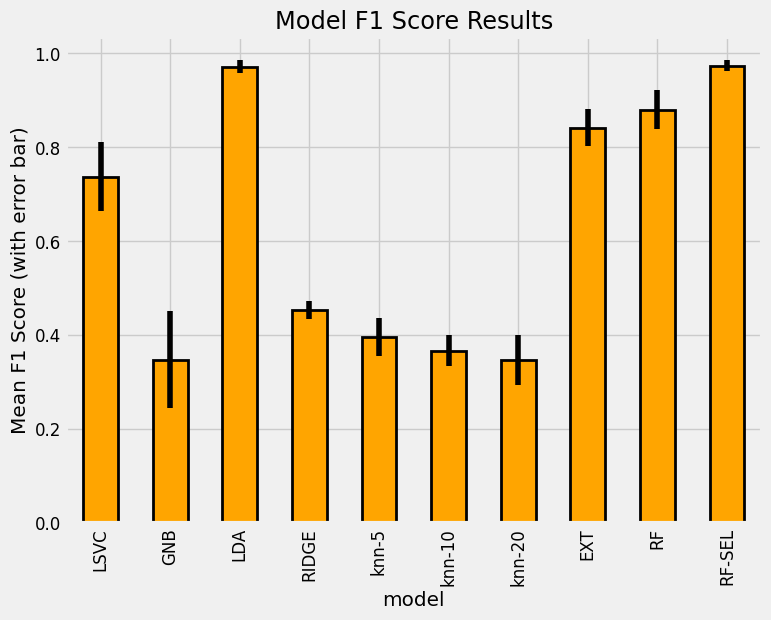

In [142]:
model_results.set_index('model', inplace=True)
model_results['cv_mean'].plot.bar(color = 'orange', figsize = (8,6), 
                                  yerr = list(model_results['cv_std']),
                                  edgecolor = 'k', linewidth = 2)
plt.title('Model F1 Score Results')
plt.ylabel('Mean F1 Score (with error bar)')
model_results.reset_index(inplace=True)

- 선택한 피쳐가 있는 모형은 교차 검증에서 약간 더 우수합니다. 다음 모델인 그라데이션 부스팅 머신에서 사용할 수 있도록 두 가지 기능을 모두 유지할 수 있습니다.

#Upgrading Our Model: Gradient Boosting Machine
- 랜덤 포레스트를 사용하고 괜찮은 점수를 받은 후에는, 이제는 단계를 밟아 그라데이션 부스팅 머신을 사용해야 할 때입니다. Kaggle에 시간을 할애하면 GBM(Gradient Boosting Machine)이 데이터가 구조화되어 있고(표로 표시) 데이터셋이 그렇게 크지 않은(관찰치 백만 개 미만) 경쟁에서 높은 비율로 승리한다는 것을 알 수 있습니다.

- 여기서는 세부 사항에 대해 자세히 설명하지 않고 구현에 초점을 맞출 것입니다. Skikit-Learn, XGBOOST 및 CatBoost에도 옵션이 있지만 LightGBM에서는 GBM을 사용합니다. 첫 번째로 사용할 하이퍼 파라미터는 다른 문제에 잘 적용된 하이퍼 파라미터를 기반으로 했습니다.

##Choosing Number of Estimators with Early Stopping
- 추정기 수(앙상블의 의사 결정 트리 수, n_estimators 또는 num_boost_rounds)를 선택하기 위해 5배 교차 검증을 사용하여 조기 중지를 사용합니다. 이렇게 하면 매크로 F1 점수로 측정한 성능이 100회의 교육 라운드 동안 증가하지 않을 때까지 추정치를 계속 추가할 수 있습니다. 이 메트릭을 사용하려면 사용자 지정 메트릭을 정의해야 합니다.

In [143]:
def macro_f1_score(labels, predictions):
  predictions = predictions.reshape(len(np.unique(labels)), -1).argmax(axis=0)
  metric_value = f1_score(labels, predictions, average='macro')
  return 'macro_f1', metric_value, True

#Light Gradient Boosting Machine Implementation
- 아래 기능은 계층화된 K폴드 교차 검증 및 조기 정지를 통해 그레이디언트 부스팅 머신을 교육하여 교육 데이터에 과적합되는 것을 방지합니다(아직 발생할 수 있음). 함수는 교차 검증을 통해 훈련을 수행하고 각 접힘에 대한 확률로 예측을 기록합니다. 이 방법을 확인하려면 각 폴더의 예측값을 반환한 다음 제출물을 반환하여 경쟁업체에 업로드할 수 있습니다.

- 그레이디언트 부스팅 머신에 대한 하이퍼 파라미터 선택은 어려울 수 있으며 일반적으로 모델 최적화를 통해 수행됩니다. 이 노트북에서는 이전 문제에서 잘 작동하는 하이퍼 파라미터 세트를 사용합니다(이들 매개변수가 반드시 이 경쟁업체와 연결되는 것은 아님).

- 우리는 n_estimators를 10000으로 설정했지만, 교차 검증 메트릭이 조기_stopping_라운드에 대해 개선되지 않을 때 훈련 추정기를 종료하는 조기 중지를 사용하고 있기 때문에 실제로 이 수에 도달하지 못할 것입니다. 이 기능에는 많은 것이 있으며, 모든 기능을 갖추고 있는지 확인하기 위해 자세히 읽어 보십시오! 설명과 코드를 알기 쉽게 만들려고 노력했습니다. (디스플레이는 교육 중 사용자 지정 정보를 %% 캡처와 함께 표시하는 데 사용되므로 교육 중에 모든 LightGBM 정보를 볼 필요가 없습니다.).

In [144]:
from sklearn.model_selection import StratifiedKFold
import lightgbm as lgb
from IPython.display import display

def model_gbm(features, labels, test_features, test_ids, 
              nfolds = 5, return_preds = False, hyp = None):
    
    feature_names = list(features.columns)

    if hyp is not None:
        if 'n_estimators' in hyp:
            del hyp['n_estimators']
        params = hyp
    
    else:
        # Model hyperparameters
        params = {'boosting_type': 'dart', 
                  'colsample_bytree': 0.88, 
                  'learning_rate': 0.028, 
                   'min_child_samples': 10, 
                   'num_leaves': 36, 'reg_alpha': 0.76, 
                   'reg_lambda': 0.43, 
                   'subsample_for_bin': 40000, 
                   'subsample': 0.54, 
                   'class_weight': 'balanced'}
    
    model = lgb.LGBMClassifier(**params, objective = 'multiclass', 
                               n_jobs = -1, n_estimators = 10000,
                               random_state = 10)
    
    strkfold = StratifiedKFold(n_splits = nfolds, shuffle = True)

    predictions = pd.DataFrame()
    importances = np.zeros(len(feature_names))

    features = np.array(features)
    test_features = np.array(test_features)
    labels = np.array(labels).reshape((-1 ))
    
    valid_scores = []
    
    for i, (train_indices, valid_indices) in enumerate(strkfold.split(features, labels)):
        
        fold_predictions = pd.DataFrame()
        
        X_train = features[train_indices]
        X_valid = features[valid_indices]
        y_train = labels[train_indices]
        y_valid = labels[valid_indices]
        
        model.fit(X_train, y_train, early_stopping_rounds = 100, 
                  eval_metric = macro_f1_score,
                  eval_set = [(X_train, y_train), (X_valid, y_valid)],
                  eval_names = ['train', 'valid'],
                  verbose = 200)

        valid_scores.append(model.best_score_['valid']['macro_f1'])
        
        fold_probabilitites = model.predict_proba(test_features)
        
        for j in range(4):
            fold_predictions[(j + 1)] = fold_probabilitites[:, j]
            
        fold_predictions['idhogar'] = test_ids
        fold_predictions['fold'] = (i+1)
        
        predictions = predictions.append(fold_predictions)
        
        importances += model.feature_importances_ / nfolds   

        display(f'Fold {i + 1}, Validation Score: {round(valid_scores[i], 5)}, Estimators Trained: {model.best_iteration_}')

    feature_importances = pd.DataFrame({'feature': feature_names,
                                        'importance': importances})
    
    valid_scores = np.array(valid_scores)
    display(f'{nfolds} cross validation score: {round(valid_scores.mean(), 5)} with std: {round(valid_scores.std(), 5)}.')
    
    if return_preds:
        predictions['Target'] = predictions[[1, 2, 3, 4]].idxmax(axis = 1)
        predictions['confidence'] = predictions[[1, 2, 3, 4]].max(axis = 1)
        return predictions, feature_importances

    predictions = predictions.groupby('idhogar', as_index = False).mean()
    
    predictions['Target'] = predictions[[1, 2, 3, 4]].idxmax(axis = 1)
    predictions['confidence'] = predictions[[1, 2, 3, 4]].max(axis = 1)
    predictions = predictions.drop(columns = ['fold'])
    
    submission = submission_base.merge(predictions[['idhogar', 'Target']], on = 'idhogar', how = 'left').drop(columns = ['idhogar'])
        
    submission['Target'] = submission['Target'].fillna(4).astype(np.int8)
    
    return submission, feature_importances, valid_scores

###Cross Vaildation with Early Stopping Notes

- 조기 중지를 사용한 교차 검증은 검증 점수가 개선되지 않는 것이 분명해지면 모델 복잡성을 계속 추가할 수 없기 때문에 훈련 세트에서 과적합을 방지하는 가장 효과적인 방법 중 하나입니다. 이 과정을 여러 접기에서 반복하면 단일 접기를 사용할 때 발생하는 편향을 줄이는 데 도움이 됩니다. 또한 조기 중지를 통해 모델을 훨씬 더 빨리 교육할 수 있습니다. 전반적으로 교차 검증을 통한 조기 중지는 그레이디언트 부스팅 머신에서 추정기의 수를 선택하는 가장 좋은 방법이며 구현을 설계할 때 기본 기술이 되어야 합니다.


In [ ]:
%%capture --no-display
predictions, gbm_fi = model_gbm(train_set, train_labels, test_set, test_ids, return_preds=True)

- 그라데이션 부스팅 머신의 힘은 여기에서 확인할 수 있습니다! 교차 검증 점수는 우리가 이전에 했던 모든 것을 날려버립니다.

- 이제 각 폴더의 예측에 어떤 일이 일어나고 있는지 이해하기 위해 예측을 살펴보도록 하겠습니다.

In [ ]:
predictions.head()

- 각 fold에 대해 1, 2, 3, 4열은 각 대상에 대한 확률을 나타냅니다. 목표값은 확률이 신뢰할 수 있는 최대 값입니다. 5개의 접힘 모두에 대한 예측값이 있으므로 다른 접힘에 대한 각 대상의 신뢰도를 표시할 수 있습니다.

In [ ]:
plt.rcParams['font,size'] = 18

g = sns.FacetGrid(prediction, row = 'fold', hue='Target', size = 3, aspect = 4)
g.map(sns.kdeplot, 'confidence')
g.add_legend()

plt.suptitle('Distriburion of Confidence by Fold and Target', y=1.05)

- 여기서 볼 수 있는 것은 각 클래스에 대한 신뢰도가 상대적으로 낮을 경우라는 것입니다. 이 모델은 클래스 불균형과 이 레이블의 높은 유병률로 인해 Target=4 예측을 더 신뢰하는 것으로 보입니다.

- 정보를 보는 또 다른 방법은 바이올린 플롯입니다. 그림의 너비와 관련된 관측치의 수와 동일한 정보가 표시됩니다.

In [ ]:
plt.figure(figsize = (24,12))
sns.violinplot(x ='Target', y = 'confidence', hue ='fold', data = predictions)

- 전반적으로, 이러한 결과는 불균형 클래스 문제의 문제를 보여줍니다. 우리의 모델은 잘 표현되지 않은 클래스를 잘 구별할 수 없습니다. 나중에 예측 자체를 살펴보고 모델이 "혼란스러운" 위치를 확인합니다. 현재로서는 제출 파일을 생성하여 대회에 제출하면 됩니다.

- 우리가 실제로 각 가구에 대한 예측을 할 때, 우리는 각 접힌 곳의 예측을 평균합니다. 따라서 각 모델은 약간 다른 데이터 접기에 대해 학습되기 때문에 기본적으로 여러 모델을 사용하고 있습니다. 그레이디언트 부스팅 머신은 이미 앙상블 머신 러닝 모델이며, 이제 우리는 몇 gbms의 예측을 평균화하여 거의 메타 앙상블로 사용하고 있습니다.

- 이 프로세스는 아래 코드에 나와 있습니다.

In [ ]:
predictions = predictions.groupby('idhogar', as_index = False).mean()

predictions['Target'] = predictions[[1, 2, 3, 4]].idxmax(axis = 1)
predictions['confidence'] = predictions[[1, 2, 3, 4]].max(axis = 1)
predictions = predictions.drop(columns = ['fold'])

plt.figure(figsize = (10, 6))
sns.boxplot(x = 'Target', y = 'confidence', data = predictions);
plt.title('Confidence by Target');

plt.figure(figsize = (10, 6))
sns.violinplot(x = 'Target', y = 'confidence', data = predictions);
plt.title('Confidence by Target');

우리는 기능이 대신 실제 제출 파일을 반환하도록 할 수 있습니다. 이는 5개의 접힌 부분에 대한 평균 예측을 취하며, 사실상 5개의 서로 다른 모델을 결합하여 각 모델은 약간 다른 데이터 부분 집합에 대해 학습됩니다.

In [ ]:
%%capture
submission, gbm_fi, valid_scores = model_gbm(train_set, train_labels, 
                                             test_set, test_ids, return_preds=False)

submission.to_csv('gbm_baseline.csv')

In [ ]:
_ = plot_feature_importances(gbm_fi, threshold=0.95)

- gbm은 가장 중요한 특징이 나이에서 파생된 것이라고 생각하는 것 같습니다. 교육 변수는 가장 중요한 특징에서도 나타납니다.

### Try Selected Features

- LightGBM의 다음 단계는 재귀 기능 제거를 통해 선택한 기능을 사용해보는 것입니다.

In [ ]:
%%capture --no-display
submission, gbm_fi_selected, valid_scores_selected = model_gbm(train_selected, train_labels, 
                                                               test_selected, test_ids)

In [ ]:
model_results = model_results.append(pd.DataFrame({'model': ["GBM", "GBM_SEL"], 
                                                   'cv_mean': [valid_scores.mean(), valid_scores_selected.mean()],
                                                   'cv_std':  [valid_scores.std(), valid_scores_selected.std()]}),
                                                sort = True)

In [ ]:
model_results.set_index('model', inplace = True)
model_results['cv_mean'].plot.bar(color = 'orange', figsize = (8, 6),
                                  yerr = list(model_results['cv_std']),
                                 edgecolor = 'k', linewidth = 2)
plt.title('Model F1 Score Results');
plt.ylabel('Mean F1 Score (with error bar)');
model_results.reset_index(inplace = True)

- 그레이디언트 부스팅 머신의 엄청난 장점이 여기에 전시되어 있습니다. 마지막 단계에서는 두 집합 모두에서 10배를 사용하여 그래프에 추가해 보겠습니다.

In [ ]:
%%capture
submission, gbm_fi, valid_scores = model_gbm(train_set, train_labels, test_set, test_ids, 
                                             nfolds=10, return_preds=False)

In [ ]:
submission.to_csv('gbm_10fold.csv', index = False)

In [ ]:
%%capture
submission, gbm_fi_selected, valid_scores_selected = model_gbm(train_selected, train_labels, test_selected, test_ids,
                                                               nfolds=10)

In [ ]:
submission.to_csv('gmb_10fold_selected.csv', index = False)

In [ ]:
model_results = model_results.append(pd.DataFrame({'model': ["GBM_10Fold", "GBM_10Fold_SEL"], 
                                                   'cv_mean': [valid_scores.mean(), valid_scores_selected.mean()],
                                                   'cv_std':  [valid_scores.std(), valid_scores_selected.std()]}),
                                    sort = True)

In [ ]:
model_results.set_index('model', inplace = True)
model_results['cv_mean'].plot.bar(color = 'orange', figsize = (8, 6), 
                                  edgecolor = 'k', linewidth = 2,
                                  yerr = list(model_results['cv_std']))
plt.title('Model F1 Score Results');
plt.ylabel('Mean F1 Score (with error bar)');
model_results.reset_index(inplace = True)

가장 좋은 모델은 선택한 기능에서 10번 접기로 훈련된 그레이디언트 부스팅 머신인 것 같습니다. 이 모델은 아직 최적화되지 않았지만 최적화를 통해 조금 더 많은 성능을 얻을 수 있을 것입니다.

In [ ]:
print(f"There are {gbm_fi_selected[gbm_fi_selected['importance'] == 0].shape[0]} features with no importance.")

- 그럼 우리 기분이 좀 나아지겠군요! 우리가 사용하는 모든 기능은 그라데이션 부스팅 머신에 어느 정도 중요합니다. 다시 돌아가서 기능 선택을 다시 시도하는 것이 좋을 수도 있지만 GBM이 우리가 사용하는 모델이기 때문입니다.

- 다음 단계는 기계 학습 모델을 최대한 활용하는 프로세스인 모델 최적화입니다.

#Model Optimizaion
- 모델 최적화는 교차 검증을 통해 하이퍼 파라미터를 조정하여 머신 러닝 모델에서 최고의 성능을 추출하는 프로세스입니다. 최상의 모델 하이퍼 파라미터는 데이터 세트마다 다르기 때문에 이 작업이 필요합니다.

- 이 노트북에서는 모델 조정에 대해 자세히 설명하지는 않겠지만 여러 가지 옵션이 있습니다:

  1. 설명서
  2. 그리드 검색
  3. 무작위 검색
  4. 자동화된 최적화

- 일반적으로 가장 효율적인 방법이며 트리 파젠 추정기로 베이지안 최적화의 수정 버전을 사용하는 하이퍼옵트를 포함한 여러 라이브러리에서 쉽게 구현할 수 있기 때문에 4.를 고수하겠습니다.


##Hyperopt를 사용한 모델 튜닝

- 베이지안 최적화에는 4가지 부분이 필요합니다:

  1. 목표 기능: 우리가 최대화(또는 최소화)하고자 하는 것
  2. 도메인 공간: 검색할 영역
  3. 다음 하이퍼 파라미터 선택 알고리즘: 과거 결과를 사용하여 다음 값을 제안합니다
  4. 결과 기록: 과거 결과 저장

- 이전에 Hyperopt 사용에 대해 언급했으므로 여기서는 구현을 계속합니다.

In [ ]:
from hyperopt import hp, tpe, Trials, fmin, STATUS_OK
from hyperopt.pyll.stochastic import sample
import csv
import ast
from timeit import default_timer as timer

### 1. Obective Function
-이것은 모델 하이퍼 파라미터가 사용되고 관련 유효성 검사 점수가 반환됩니다. Hyperopt는 최소화할 점수가 필요하므로 1 - Macro F1 점수를 반환합니다.


In [ ]:
def objective(hyperparameters, nfolds=5):
    """Return validation score from hyperparameters for LightGBM"""
    
    # Keep track of evals
    global ITERATION
    ITERATION += 1
    
    # Retrieve the subsample
    subsample = hyperparameters['boosting_type'].get('subsample', 1.0)
    subsample_freq = hyperparameters['boosting_type'].get('subsample_freq', 0)
    
    boosting_type = hyperparameters['boosting_type']['boosting_type']
    
    if boosting_type == 'dart':
        hyperparameters['drop_rate'] = hyperparameters['boosting_type']['drop_rate']
    
    # Subsample and subsample frequency to top level keys
    hyperparameters['subsample'] = subsample
    hyperparameters['subsample_freq'] = subsample_freq
    hyperparameters['boosting_type'] = boosting_type
        # Whether or not to use limit maximum depth
    if not hyperparameters['limit_max_depth']:
        hyperparameters['max_depth'] = -1
    
    # Make sure parameters that need to be integers are integers
    for parameter_name in ['max_depth', 'num_leaves', 'subsample_for_bin', 
                           'min_child_samples', 'subsample_freq']:
        hyperparameters[parameter_name] = int(hyperparameters[parameter_name])

    if 'n_estimators' in hyperparameters:
        del hyperparameters['n_estimators']
    
    # Using stratified kfold cross validation
    strkfold = StratifiedKFold(n_splits = nfolds, shuffle = True)
    
    # Convert to arrays for indexing
    features = np.array(train_selected)
    labels = np.array(train_labels).reshape((-1 ))
    
    valid_scores = []
    best_estimators = []
    run_times = []

    model = lgb.LGBMClassifier(**hyperparameters, class_weight = 'balanced',
                               n_jobs=-1, metric = 'None',
                               n_estimators=10000)
    
    # Iterate through the folds
    for i, (train_indices, valid_indices) in enumerate(strkfold.split(features, labels)):
        
        # Training and validation data
        X_train = features[train_indices]
        X_valid = features[valid_indices]
        y_train = labels[train_indices]
        y_valid = labels[valid_indices]
        
        start = timer()
        # Train with early stopping
        model.fit(X_train, y_train, early_stopping_rounds = 100, 
                  eval_metric = macro_f1_score, 
                  eval_set = [(X_train, y_train), (X_valid, y_valid)],
                  eval_names = ['train', 'valid'],
                  verbose = 400)
        end = timer()
        # Record the validation fold score
        valid_scores.append(model.best_score_['valid']['macro_f1'])
        best_estimators.append(model.best_iteration_)
        
        run_times.append(end - start)
    
    score = np.mean(valid_scores)
    score_std = np.std(valid_scores)
    loss = 1 - score
    
    run_time = np.mean(run_times)
    run_time_std = np.std(run_times)
    
    estimators = int(np.mean(best_estimators))
    hyperparameters['n_estimators'] = estimators
    
    # Write to the csv file ('a' means append)
    of_connection = open(OUT_FILE, 'a')
    writer = csv.writer(of_connection)
    writer.writerow([loss, hyperparameters, ITERATION, run_time, score, score_std])
    of_connection.close()
    
    # Display progress
    if ITERATION % PROGRESS == 0:
        display(f'Iteration: {ITERATION}, Current Score: {round(score, 4)}.')
    
    return {'loss': loss, 'hyperparameters': hyperparameters, 'iteration': ITERATION,
            'time': run_time, 'time_std': run_time_std, 'status': STATUS_OK, 
            'score': score, 'score_std': score_std}
    
    

### 2. Search Space
- 도메인은 검색할 전체 값 범위입니다. 유일하게 어려운 부분은 부스팅_type="subsample ratio"입니다. 여기서 가치관을 자유롭게 사용하세요.


In [ ]:
space = {
    'boosting_type': hp.choice('boosting_type', 
                              [{'boosting_type': 'gbdt', 
                                'subsample': hp.uniform('gdbt_subsample', 0.5, 1),
                                'subsample_freq': hp.quniform('gbdt_subsample_freq', 1, 10, 1)}, 
                               {'boosting_type': 'dart', 
                                 'subsample': hp.uniform('dart_subsample', 0.5, 1),
                                 'subsample_freq': hp.quniform('dart_subsample_freq', 1, 10, 1),
                                 'drop_rate': hp.uniform('dart_drop_rate', 0.1, 0.5)},
                                {'boosting_type': 'goss',
                                 'subsample': 1.0,
                                 'subsample_freq': 0}]),
    'limit_max_depth': hp.choice('limit_max_depth', [True, False]),
    'max_depth': hp.quniform('max_depth', 1, 40, 1),
    'num_leaves': hp.quniform('num_leaves', 3, 50, 1),
    'learning_rate': hp.loguniform('learning_rate', 
                                   np.log(0.025), 
                                   np.log(0.25)),
    'subsample_for_bin': hp.quniform('subsample_for_bin', 2000, 100000, 2000),
    'min_child_samples': hp.quniform('min_child_samples', 5, 80, 5),
    'reg_alpha': hp.uniform('reg_alpha', 0.0, 1.0),
    'reg_lambda': hp.uniform('reg_lambda', 0.0, 1.0),
    'colsample_bytree': hp.uniform('colsample_by_tree', 0.5, 1.0)
}

In [ ]:
sample(space)

###3. Algorithm

- 다음 값을 선택하는 알고리즘은 목적 함수의 대리 모델을 구성하기 위해 베이지 규칙을 사용하는 트리 파젠 추정기입니다. 알고리즘은 목표 함수를 최대화하는 대신 대리 모형의 예상 개선(EI)을 최대화합니다.

In [ ]:
algo = tpe.suggest

### 4. Results History
- 결과를 기록하는 데 두 가지 방법을 사용합니다:

  1. 평가판 개체: 목표 함수에서 반환된 모든 항목을 저장합니다
  2. 반복할 때마다 CSV 파일에 쓰기

- 진행 상황을 추적하기 위해 여러 방법을 사용하는 것이 중복을 의미하기 때문에 좋습니다. 한 가지 방법이 실패할 수도 있지만, 두 방법 모두 실패하지 않기를 바랍니다! csv 파일을 사용하여 실행 중인 메서드를 모니터링하고 Trials 개체를 저장한 다음 다시 로드하여 최적화를 다시 시작할 수 있습니다.

In [ ]:
trials = Trials()

# Create a file and open a connection
OUT_FILE = 'optimization.csv'
of_connection = open(OUT_FILE, 'w')
writer = csv.writer(of_connection)

MAX_EVALS = 100
PROGRESS = 10
N_FOLDS = 5
ITERATION = 0

# Write column names
headers = ['loss', 'hyperparameters', 'iteration', 'runtime', 'score', 'std']
writer.writerow(headers)
of_connection.close()

In [ ]:
%%capture --no-display
display("Running Optimization for {} Trials.".format(MAX_EVALS))

# Run optimization
best = fmin(fn = objective, space = space, algo = tpe.suggest, trials = trials,
            max_evals = MAX_EVALS)

In [ ]:
import json

# Save the trial results
with open('trials.json', 'w') as f:
    f.write(json.dumps(str(trials)))

##Using Optimized Model

In [ ]:
results = pd.read_csv(OUT_FILE).sort_values('loss', ascending = True).reset_index()
results.head()

In [ ]:
plt.figure(figsize = (8, 6))
sns.regplot('iteration', 'score', data = results);
plt.title("Optimization Scores");
plt.xticks(list(range(1, results['iteration'].max() + 1, 3)));

In [ ]:
best_hyp = ast.literal_eval(results.loc[0, 'hyperparameters'])
best_hyp

In [ ]:
%%capture
submission, gbm_fi, valid_scores = model_gbm(train_selected, train_labels, 
                                             test_selected, test_ids, 
                                             nfolds = 10, return_preds=False)

model_results = model_results.append(pd.DataFrame({'model': ["GBM_OPT_10Fold_SEL"], 
                                                   'cv_mean': [valid_scores.mean()],
                                                   'cv_std':  [valid_scores.std()]}),
                                    sort = True).sort_values('cv_mean', ascending = False)

In [ ]:
%%capture
submission, gbm_fi, valid_scores = model_gbm(train_set, train_labels, 
                                             test_set, test_ids, 
                                             nfolds = 10, return_preds=False)

model_results = model_results.append(pd.DataFrame({'model': ["GBM_OPT_10Fold"], 
                                                   'cv_mean': [valid_scores.mean()],
                                                   'cv_std':  [valid_scores.std()]}),
                                    sort = True).sort_values('cv_mean', ascending = False)

In [ ]:
model_results.head()

In [ ]:
submission.to_csv('gbm_opt_10fold_selected.csv', index = False)

- 이 시점에서 성능을 개선하기 위해 최적화를 계속하거나, 더 많은 기능 엔지니어링, 추가 모델 스택 또는 앙상블을 시도하거나, 차원 축소 또는 오버샘플링과 같은 더 실험적인 방법을 검토할 수 있습니다. 하지만, 우리가 받고 있는 점수는 꽤 좋으며, 저는 기계 학습의 중요한 부분인 예측을 조사하여 우리의 모델이 어디가 틀렸는지 알아보도록 하겠습니다.

- Kaggle은 현실적인 데이터 세트를 제시하는 데 유용하지만 리더보드의 맨 위에 도달하는 데 필요한 방법은 일반적으로 실제 환경에서 사용되지 않습니다. 어느 정도의 성능 수준을 넘어서면 정확성은 해석 가능성을 뒤로 미루게 됩니다. 사람들은 사람이 그녀의 결정을 설명할 수 있기를 바라는 것과 마찬가지로 모델이 예측을 하는 이유를 알고 싶어합니다. 우리는 우리의 모델에서 더 많은 성능을 짜내는 작업을 할 수 있지만, 지금은 우리의 에너지가 우리의 모델을 조사하는 데 더 잘 사용됩니다.

In [ ]:
_ = plot_feature_importances(gbm_fi)

##Investigate Predictions

- 우리의 모델을 조사하는 첫 번째 시도로, 우리는 테스트 데이터에서 예측된 레이블의 분포를 시각화할 수 있습니다. 우리는 이것들이 교육 데이터와 동일한 분포를 보일 것으로 예상합니다. 우리는 가계 예측에 관심이 있기 때문에 각 주택에 대한 예측만 살펴보고 교육 데이터의 예측과 비교해 보겠습니다.

- 다음 히스토그램은 절대 카운트 대신 상대 주파수를 표시하는 정규화된 값입니다. 이것은 원시 카운트가 교육 및 검정 데이터에서 다르기 때문에 필요합니다.


In [ ]:
preds = submission_base.merge(submission, on = 'Id', how = 'left')
preds = pd.DataFrame(preds.groupby('idhogar')['Target'].mean())

# Plot the training labels distribution
fig, axes = plt.subplots(1, 2, sharey = True, figsize = (12, 6))
heads['Target'].sort_index().plot.hist(normed = True,
                                       edgecolor = r'k',
                                       linewidth = 2,
                                       ax = axes[0])

axes[0].set_xticks([1, 2, 3, 4]);
axes[0].set_xticklabels(poverty_mapping.values(), rotation = 60)
axes[0].set_title('Train Label Distribution')

# Plot the predicted labels
preds['Target'].sort_index().plot.hist(normed = True, 
                                       edgecolor = 'k',
                                       linewidth = 2,
                                       ax = axes[1])
axes[1].set_xticks([1, 2, 3, 4]);
axes[1].set_xticklabels(poverty_mapping.values(), rotation = 60)
plt.subplots_adjust()
plt.title('Predicted Label Distribution');

In [ ]:
heads['Target'].value_counts()

In [ ]:
preds['Target'].value_counts()

 - 예측 분포는 약간의 차이가 있지만 훈련 분포에 가깝습니다. 노트북의 실행에 따라 표시되는 결과가 달라질 수 있지만, 이번 에디션의 경우 예측에 4s가 제대로 표현되지 않고 3s가 과도하게 표현됩니다.

- 불균형 분류 문제를 처리하는 잠재적인 방법 중 하나는 불균형 학습 라이브러리를 사용하여 Python에서 수행하기 쉬운 소수 클래스를 오버샘플링하는 것입니다. 여기서는 해당 옵션에 대해 설명하지 않습니다.

##Validation

검정 예측의 경우 분포를 교육 데이터에 있는 분포와 비교할 수 있습니다. 예측을 실제 답변과 비교하려면 교육 데이터를 별도의 검증 세트로 분할해야 합니다. 테스트를 위해 1000개의 예제를 사용한 다음, 정답이 있기 때문에 혼동 행렬을 만드는 것과 같은 작업을 수행할 수 있습니다.

In [ ]:
from sklearn.model_selection import train_test_split

# Split into validation set
X_train, X_valid, y_train, y_valid = train_test_split(train_selected,
                                                      train_labels,
                                                      test_size = 1000,
                                                      random_state = 10)

# Create model and train
model = lgb.LGBMClassifier(**best_hyp, 
                           class_weight = 'balanced',
                           random_state = 10)
model.fit(X_train, y_train);

In [ ]:
# Make validation predictions
valid_preds = model.predict_proba(X_valid)
preds_df = pd.DataFrame(valid_preds, columns = [1, 2, 3, 4])

# Convert into predictions
preds_df['prediction'] = preds_df[[1, 2, 3, 4]].idxmax(axis = 1)
preds_df['confidence'] = preds_df[[1, 2, 3, 4]].max(axis = 1)

preds_df.head()

In [ ]:
print('F1 score:', round(f1_score(y_valid, preds_df['prediction'], average = 'macro'), 5))

예측을 사용하여 혼동 행렬을 그려 보겠습니다. 예측과 참 값의 차이를 보여줌으로써 모형이 "혼란스러운" 위치를 알 수 있습니다.

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    # Labeling the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size = 18)
    plt.xlabel('Predicted label', size = 18)


In [ ]:
cm = confusion_matrix(y_valid, preds_df['prediction'])

plot_confusion_matrix(cm, classes = ['Extreme', 'Moderate', 'Vulnerable', 'Non-Vulnerable'],
                      title = 'Poverty Confusion Matrix')

- 혼동 행렬을 읽는 방법은 다음과 같습니다. 대각선에 있는 모든 값은 예측 값이 실제 값과 일치하기 때문에 모형이 정확해졌습니다. 대각선상에 없는 모든 것은 예측 값 대 실제 값을 보고 평가할 수 있는 모델이 잘못되었습니다.

- 예를 들어, 우리의 모델은 빈곤이 극심한 25개의 관측치를 정확하게 예측했습니다. 반면에, 빈곤이 극심했던 26건의 경우, 우리의 모델은 그것이 중간 정도라고 예측했습니다. 빈곤이 취약하지 않은 95건의 경우, 우리의 모델은 빈곤이 취약하다고 예측했습니다. 전반적으로, 우리는 우리의 모델이 취약하지 않은 가구를 식별하는 데만 매우 정확하다는 것을 알 수 있습니다.

- 각 클래스에서 예측된 각 실제 레이블의 백분율을 보려면 실제 레이블에 대한 혼동 행렬을 정규화할 수 있습니다.

In [ ]:
plot_confusion_matrix(cm, normalize = True,
                      classes = ['Extreme', 'Moderate', 'Vulnerable', 'Non-Vulnerable'],
                      title = 'Poverty Confusion Matrix')

- 이제 우리는 우리의 모델이 취약하지 않은 클래스를 제외하고는 그렇게 잘 하지 못한다는 것을 알 수 있습니다. 취약계층 가구의 15%만 정확하게 식별하여 그 중 더 많은 가구를 중간 또는 비취약계층으로 분류합니다. 전반적으로 이러한 결과는 상대적으로 관측치가 적은 불균형 분류 문제가 매우 어렵다는 것을 보여줍니다. 데이터의 다른 섹션에서 여러 모델을 오버샘플링하거나 교육하는 등 이에 대응하기 위해 취할 수 있는 몇 가지 방법이 있지만, 결국 가장 효과적인 방법은 더 많은 데이터를 수집하는 것일 수 있습니다.

#DimensionReduction
- 문제에 대한 최종 탐구로서, 우리는 선택된 데이터 세트에 몇 가지 다른 차원 축소 방법을 적용할 수 있습니다. 이러한 방법은 시각화 또는 기계 학습을 위한 전처리 방법으로 사용할 수 있습니다. 다음 네 가지 방법을 살펴보겠습니다:

  - PCA: 주성분 분석. 데이터에서 가장 큰 변동의 차원을 찾습니다
  - ICA: 독립 성분 분석. 다변량 신호를 독립적인 신호로 분리하려고 시도합니다.
  - TSNE: T-분산 확률적 이웃 임베딩. 고차원 데이터를 저차원 매니폴드에 매핑하여 데이터 내의 로컬 구조를 유지합니다. 비선형 기술이며 일반적으로 시각화에만 사용됩니다.
  - UMAP: 균일 다지관 근사 및 투영: 또한 데이터를 저차원 매니폴드에 매핑하지만 TSNE보다 더 많은 전역 구조를 보존하려고 하는 비교적 새로운 기술입니다.

- 이 네 가지 방법 모두 파이썬에서 구현하기가 비교적 간단합니다. 시각화를 위해 선택한 형상을 3차원으로 매핑한 다음 모델링 형상으로 PCA, ICA 및 UMAP를 사용합니다(TSNE에는 변환 방법이 없으므로 전처리에 사용할 수 없음).

In [ ]:
from umap import UMAP
from sklearn.decomposition import PCA, FastICA
from sklearn.manifold import TSNE

n_components = 3

umap = UMAP(n_components=n_components)
pca = PCA(n_components=n_components)
ica = FastICA(n_components=n_components)
tsne = TSNE(n_components=n_components)

In [ ]:
train_df = train_selected.copy()
test_df = test_selected.copy()

for method, name in zip([umap, pca, ica, tsne], 
                        ['umap', 'pca', 'ica', 'tsne']):
    
    # TSNE has no transform method
    if name == 'tsne':
        start = timer()
        reduction = method.fit_transform(train_selected)
        end = timer()
    
    else:
        start = timer()
        reduction = method.fit_transform(train_selected)
        end = timer()
        
        test_reduction = method.transform(test_selected)
    
        # Add components to test data
        test_df['%s_c1' % name] = test_reduction[:, 0]
        test_df['%s_c2' % name] = test_reduction[:, 1]
        test_df['%s_c3' % name] = test_reduction[:, 2]

    # Add components to training data for visualization and modeling
    train_df['%s_c1' % name] = reduction[:, 0]
    train_df['%s_c2' % name] = reduction[:, 1]
    train_df['%s_c3' % name] = reduction[:, 2]
    
    print(f'Method: {name} {round(end - start, 2)} seconds elapsed.')

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

def discrete_cmap(N, base_cmap=None):
    """Create an N-bin discrete colormap from the specified input map
    Source: https://gist.github.com/jakevdp/91077b0cae40f8f8244a"""

    base = plt.cm.get_cmap(base_cmap)
    color_list = base(np.linspace(0, 1, N))
    cmap_name = base.name + str(N)
    return base.from_list(cmap_name, color_list, N)

cmap = discrete_cmap(4, base_cmap = plt.cm.RdYlBu)

train_df['label'] = train_labels

In [ ]:
for method, name in zip([umap, pca, ica, tsne], 
                        ['umap', 'pca', 'ica', 'tsne']):
    
    fig = plt.figure(figsize = (8, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    p = ax.scatter(train_df['%s_c1' % name], train_df['%s_c2'  % name], train_df['%s_c3'  % name], 
                   c = train_df['label'].astype(int), cmap = cmap)
    
    plt.title(f'{name.capitalize()}', size = 22)
    fig.colorbar(p, aspect = 4, ticks = [1, 2, 3, 4])
  

- 이러한 그래프에서 많은 군집화를 보기는 어렵습니다. 이는 사용 가능한 데이터를 고려할 때 빈곤 수준을 분리하는 것이 어렵다는 것을 나타냅니다. 기계 학습 모델은 우리가 그들에게 주는 데이터만큼만 효과적이며, 때때로 그 데이터는 충분한 정보를 가지고 있지 않습니다.

- 마지막 단계로 PCA, ICA 및 UMAP의 추가 감소를 사용하여 모델을 교육할 수 있습니다. 최적화된 동일한 Light GBM 하이퍼 파라미터를 사용합니다.

In [ ]:
train_df, test_df = train_df.align(test_df, axis = 1, join = 'inner')

In [ ]:
%%capture

submission, gbm_fi, valid_scores = model_gbm(train_df, train_labels, 
                                             test_df, test_ids, nfolds = 10,
                                             hyp = best_hyp)

In [ ]:
submission.to_csv('gbm_opt_10fold_dr.csv', index = False)

In [ ]:
model_results = model_results.append(pd.DataFrame({'model': ["GBM_OPT_10Fold_DR"], 
                                                   'cv_mean': [valid_scores.mean()],
                                                   'cv_std':  [valid_scores.std()]}),
                                    sort = True)

In [ ]:
model_results = model_results.sort_values('cv_mean')
model_results.set_index('model', inplace = True)
model_results['cv_mean'].plot.bar(color = 'orange', figsize = (10, 8),
                                  edgecolor = 'k', linewidth = 2,
                                  yerr = list(model_results['cv_std']))
plt.title('Model F1 Score Results');
plt.ylabel('Mean F1 Score (with error bar)');
model_results.reset_index(inplace = True)

- 치수 감소 성분은 모형의 전체 점수에 약간 영향을 줍니다. 훈련 데이터의 과적합만 초래할 수 있습니다.

In [ ]:
_ = plot_feature_importances(gbm_fi)

- 치수 감소 구성요소의 중요성이 매우 높기 때문에 과적합이 발생할 수 있습니다. 치수 축소 방법은 레이블 정보를 사용하지 않으므로 모형에 유용한 정보가 없을 수도 있습니다.

#Visulize Single Decision Tree

- 마지막 단계로 랜덤 포레스트에서 하나의 의사 결정 트리를 살펴볼 수 있습니다. 먼저 가시성을 위해 최대 깊이를 제한한 다음 트리를 전체적으로 확장합니다.

- 첫 번째 단계는 단순히 임의의 숲을 훈련시키고 하나의 트리를 추출하는 것입니다(단일 의사 결정 트리도 훈련시킬 수 있습니다).


In [ ]:
model = RandomForestClassifier(max_depth = 3, n_estimators=10)
model.fit(train_selected, train_labels)
estimator_limited = model.estimators_[5]
estimator_limited

In [ ]:
from sklearn.tree import export_graphviz

export_graphviz(estimator_limited, out_file='tree_limited.dot', feature_names = train_selected.columns,
                class_names = ['extreme', 'moderate' , 'vulnerable', 'non-vulnerable'],
                rounded = True, proportion = False, precision = 2, filled = True)

In [ ]:
!dot -Tpng tree_limited.dot -o tree_limited.png

In [ ]:
from IPython.display import Image
Image(filename = 'tree_limited.png')

In [ ]:
# No maximum depth
model = RandomForestClassifier(max_depth = None, n_estimators=10)
model.fit(train_selected, train_labels)
estimator_nonlimited = model.estimators_[5]

export_graphviz(estimator_nonlimited, out_file='tree_nonlimited.dot', feature_names = train_selected.columns,
                class_names = ['extreme', 'moderate' , 'vulnerable', 'non-vulnerable'],
                rounded = True, proportion = False, precision = 2)

!dot -Tpng tree_nonlimited.dot -o tree_nonlimited.png -Gdpi=600

In [ ]:
Image(filename = 'tree_nonlimited.png')

#Conclusions

- 이 노트북에서는 실제 문제에 대한 전체 데이터 과학 솔루션의 단계별 구현을 수행했습니다. 기계 학습은 실제로 각각의 단계가 단순하고 전체적인 결과가 매우 강력한 일련의 단계입니다.

- 우리의 경로는 다음과 같습니다:
  1. 문제 이해
  2. 탐색적 데이터 분석
    - 데이터 문제 처리
    - 결측값 입력
  3. 피쳐 엔지니어링
    - 집계 데이터
    - 단계별 피쳐 선택
  4. 모델 선택
    - 다양한 모델을 시도하여 어떤 모델이 가장 유망한지 확인합니다
    - 기능 선택 기능도 작동 가능
  5. 모델 최적화
    - 최고의 성능 모델을 선택하고 튜닝합니다
  6. 최상의 모델 구현
  7. 예측 조사
    - 모델의 단점을 식별합니다
  8. 새로운 기술 시도
    - 실험하고 배우세요!


- 서론에서 언급한 바와 같이, 이러한 단계는 일반적인 순서를 가지고 있지만, 후속 작업을 기반으로 반복하는 것을 방해하는 것은 없습니다. 예를 들어 성능에 만족하지 못하는 경우 모델링 후 피쳐 엔지니어링/선택 항목으로 되돌아가는 경우가 많습니다. 예측을 조사한 후 모델링 단계로 돌아가서 접근 방식을 다시 생각할 수 있습니다.

- 기계 학습은 대부분 경험적이라는 것을 명심해야 합니다. 확립된 모범 사례가 거의 없으므로 가장 효과적인 방법을 결정하기 위해 지속적으로 경험해야 합니다. 그것이 우리가 마지막 단계를 포함한 이유입니다. 우리는 몇 가지 새로운 방법을 시도해야 하고, 그들이 이 프로젝트에서 성과를 거두지 못하더라도, 그것들은 미래에 유용할 수도 있습니다. 데이터 과학자로서 우리는 가능한 한 최고의 도구를 사용하여 작업을 보다 효과적으로 수행하는 방법을 끊임없이 배워야 합니다.

- 우리의 최종 모델은 경쟁사 모델에 비해 우수하지만 전체적으로 매우 정확하지는 않습니다. 성능을 개선할 수 있는 방법이 있을 수 있지만, 전반적으로 데이터가 부족하여 예외적인 메트릭을 달성할 수 없습니다. 이 점은 기억해야 할 중요한 점입니다. 결국 데이터 과학 프로젝트의 성패는 사용 가능한 데이터의 품질과 양에 달려 있습니다. 우리는 이용 가능한 도구로 포르투 리카의 가정 빈곤을 분류하는 문제를 해결했습니다. 그리고 만약 우리가 담당한다면 더 나은 해결책을 도출하기 위해 어떤 데이터를 더 수집할 수 있는지 알아내는 것이 다음 과정이 될 것입니다.